### FORECASTING TIME SERIES DATA USING ARIMA MODEL - TUTORIAL / PROJECT

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
sns.set_theme(style='darkgrid')
import scipy.stats as stats
from random import seed
from random import random
from matplotlib import pyplot
from math import sqrt
import plotly.graph_objects as go
import warnings
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import pylab
import scipy

warnings.filterwarnings("ignore")

In [49]:
csv = pd.read_excel("C:/Users/J.C/Desktop/PROJECTS-CHINONSO/Data-Science-Projects/Projects/ARIMA/New folder/gold/CleanedData.xlsx")

In [50]:
data = csv.copy()

data.head()

Date     Open     High      Low    Close  Change(Pips)  Change(%)
0 2021-07-04  1787.22  1787.73  1785.00  1786.39           -83      -0.05
1 2021-07-05  1786.68  1794.00  1783.80  1791.15           447       0.25
2 2021-07-06  1790.85  1814.89  1789.89  1795.68           483       0.27
3 2021-07-07  1795.28  1809.50  1793.41  1803.22           794       0.44
4 2021-07-08  1803.29  1818.00  1793.90  1803.75            46       0.03

In [51]:
size = int(len(data)*0.95)
df, df_test = data[:size], data[size:]

print(len(df), len(df_test))

590 32


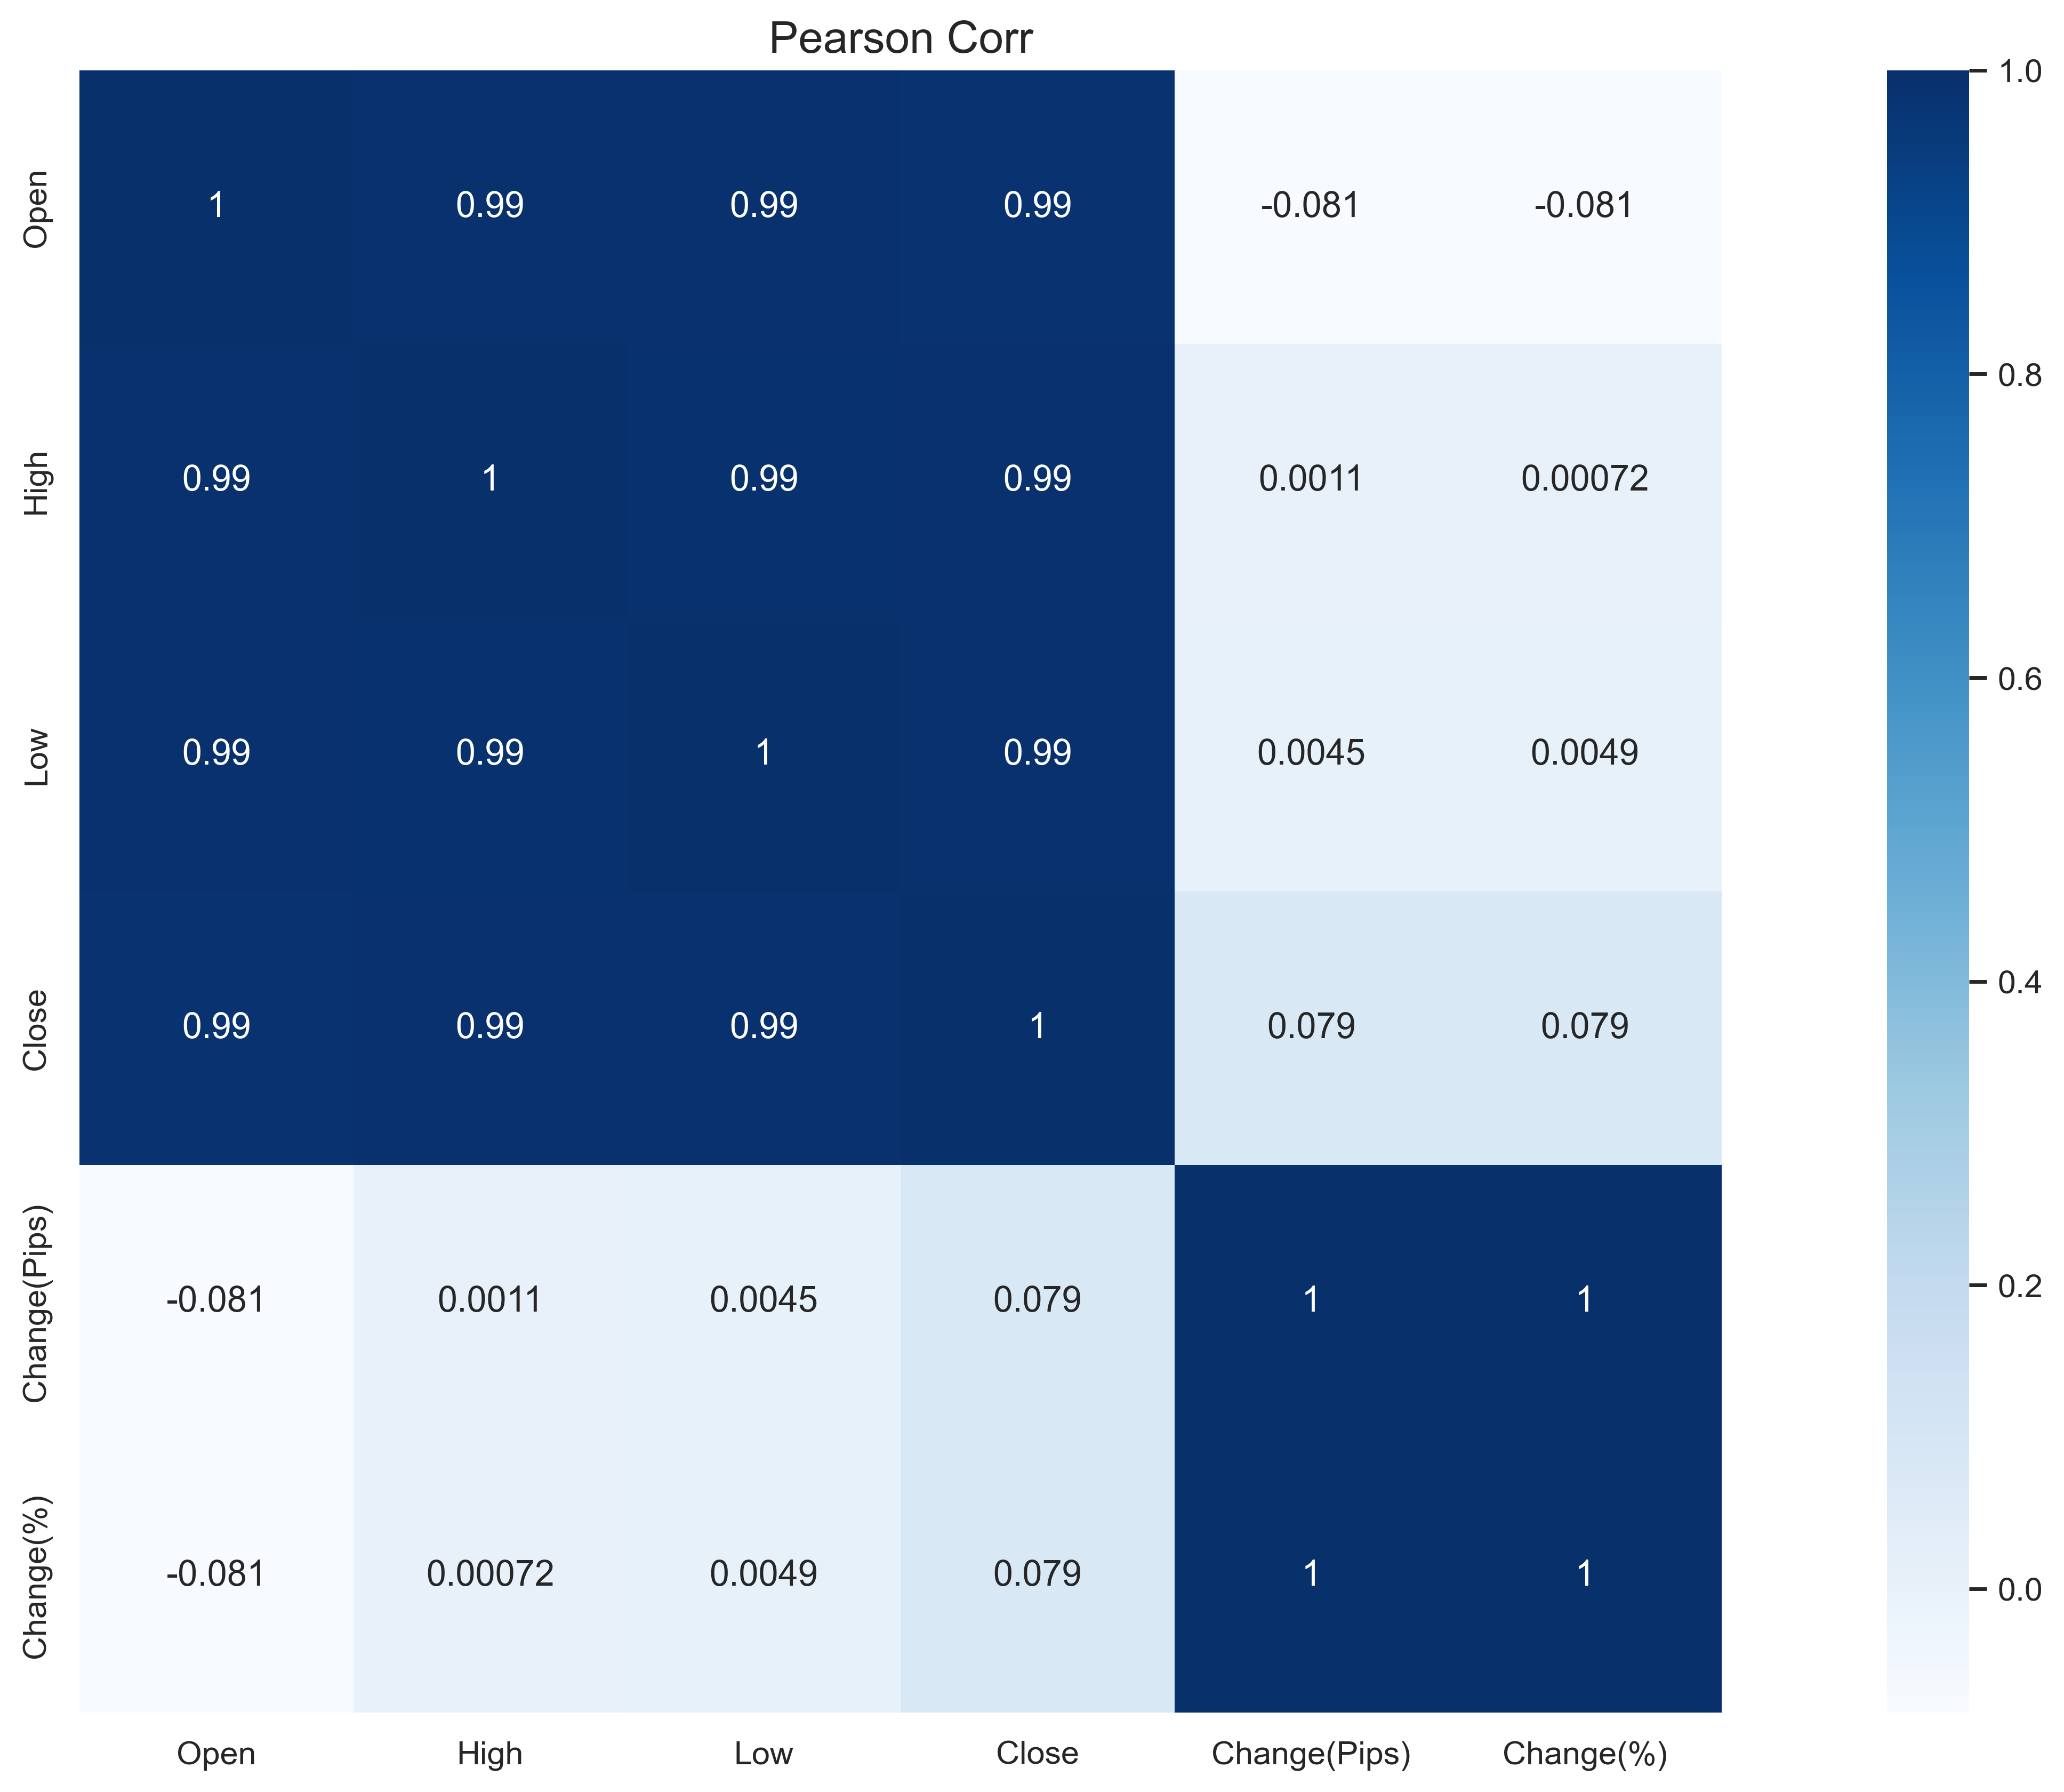

In [52]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 400

fig, ax = plt.subplots(figsize=(20,10), facecolor='w')
corr = df.drop(columns='Date').corr()
sns.heatmap(corr, cbar=True, cmap='Blues', annot=True, square=True)
ax.set_title("Pearson Corr", size=15)
ax.set_facecolor(color='white')

### we will be using close 

In [53]:
df.describe()
# print(len(df))

Date         Open         High          Low  \
count                            590   590.000000   590.000000   590.000000   
mean   2022-06-15 22:00:24.406779648  1827.538780  1838.397797  1816.569898   
min              2021-07-04 00:00:00  1627.270000  1640.760000  1615.040000   
25%              2021-12-26 06:00:00  1772.137500  1782.457500  1762.082500   
50%              2022-06-16 12:00:00  1812.040000  1820.185000  1804.975000   
75%              2022-12-05 18:00:00  1884.900000  1900.545000  1872.032500   
max              2023-05-28 00:00:00  2052.780000  2071.320000  2030.770000   
std                              NaN    93.242907    94.174051    91.926404   

             Close  Change(Pips)   Change(%)  
count   590.000000    590.000000  590.000000  
mean   1827.712678     17.389831    0.006220  
min    1626.890000  -5559.000000   -3.050000  
25%    1771.320000   -714.500000   -0.400000  
50%    1811.915000     27.000000    0.010000  
75%    1888.170000    749.500000    0.425000  
max    2051.930000   6612.000000    3.330000  
std      93.227387   1499.339026    0.815886

In [54]:
df.isna().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

### We will use the Date column as index(x values) for the visualization

In [55]:
data_1 = (df.assign(Dates=lambda d: pd.to_datetime(d['Date'])).set_index('Dates').drop(columns='Date')
 )

In [56]:
data_1

Open     High      Low    Close  Change(Pips)  Change(%)
Dates                                                                  
2021-07-04  1787.22  1787.73  1785.00  1786.39           -83      -0.05
2021-07-05  1786.68  1794.00  1783.80  1791.15           447       0.25
2021-07-06  1790.85  1814.89  1789.89  1795.68           483       0.27
2021-07-07  1795.28  1809.50  1793.41  1803.22           794       0.44
2021-07-08  1803.29  1818.00  1793.90  1803.75            46       0.03
...             ...      ...      ...      ...           ...        ...
2023-05-23  1969.94  1977.35  1954.40  1975.00           506       0.26
2023-05-24  1975.19  1984.92  1956.40  1959.90         -1529      -0.78
2023-05-25  1960.03  1964.62  1938.60  1940.37         -1966      -1.01
2023-05-26  1948.96  1951.22  1938.85  1946.07          -289      -0.15
2023-05-28  1946.60  1946.60  1941.10  1943.85          -275      -0.14

[590 rows x 6 columns]

In [33]:
# data

### setting the frequency as monthly

In [57]:
data_1 = data_1.asfreq('D')
len(data_1.index)

694

In [58]:
data_1.isna().sum()

Open            104
High            104
Low             104
Close           104
Change(Pips)    104
Change(%)       104
dtype: int64

In [62]:
data_1.dropna(inplace=True)
len(data_1)
data_1.head(10)

Open     High      Low    Close  Change(Pips)  Change(%)
Dates                                                                  
2021-07-04  1787.22  1787.73  1785.00  1786.39         -83.0      -0.05
2021-07-05  1786.68  1794.00  1783.80  1791.15         447.0       0.25
2021-07-06  1790.85  1814.89  1789.89  1795.68         483.0       0.27
2021-07-07  1795.28  1809.50  1793.41  1803.22         794.0       0.44
2021-07-08  1803.29  1818.00  1793.90  1803.75          46.0       0.03
2021-07-09  1803.87  1812.38  1796.53  1807.89         402.0       0.22
2021-07-11  1808.06  1808.38  1805.50  1806.24        -182.0      -0.10
2021-07-12  1806.32  1809.43  1791.84  1806.95          63.0       0.03
2021-07-13  1807.59  1816.67  1799.19  1805.82        -177.0      -0.10
2021-07-14  1805.91  1829.71  1804.22  1826.23        2032.0       1.11

### Time Series Visuals

In [64]:
df = data_1.copy()

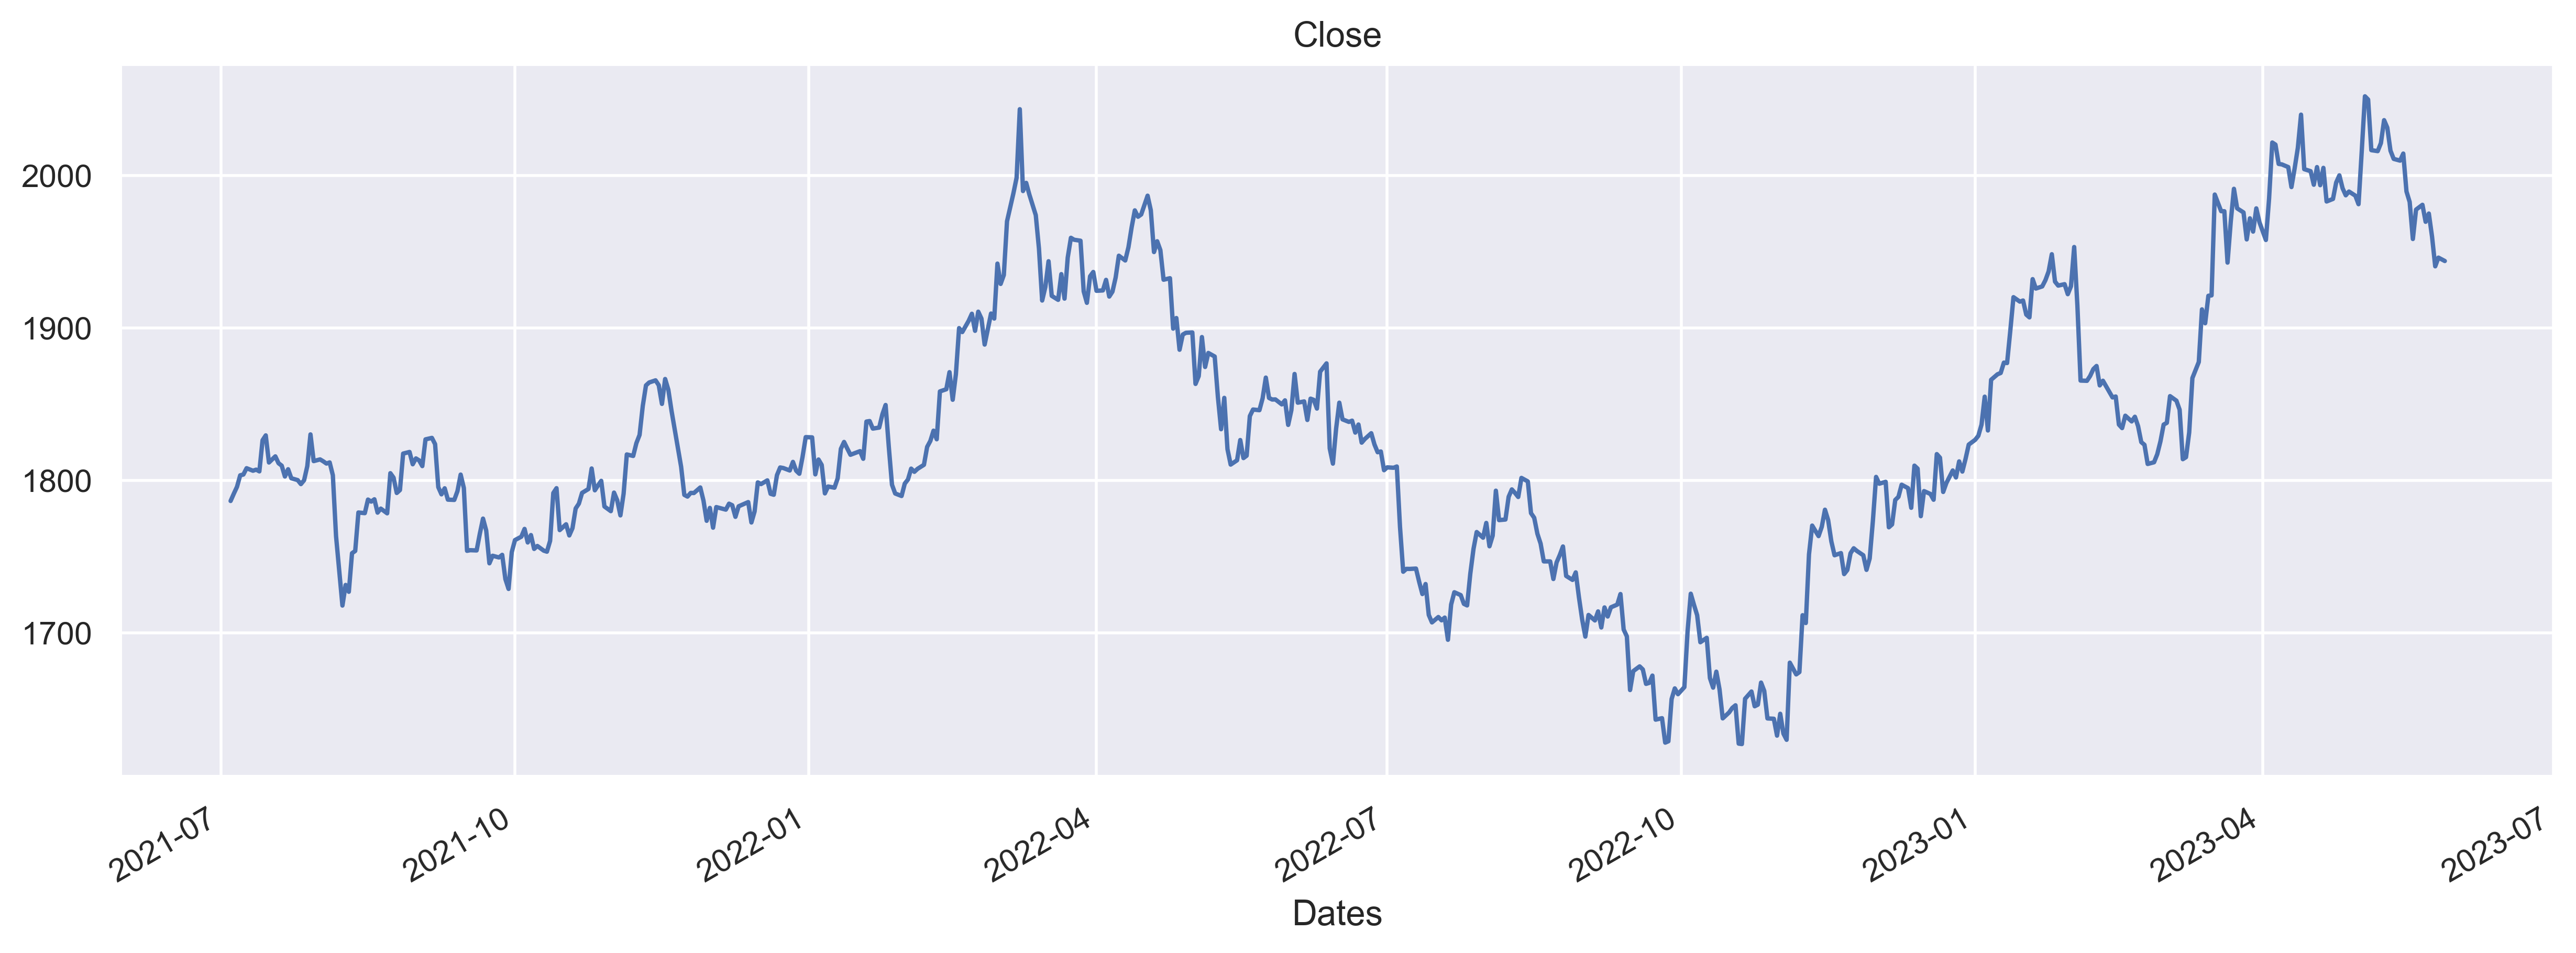

In [65]:
#visualizing the Adjusted close column column
df['Close'].plot(figsize=(15,5), title="Close")
plt.show()

In [22]:
# #Volume plot
# df['humidity'].plot(figsize=(15,15), title="Volume")
# plt.show()

In [23]:
# df['Close'].plot(figsize=(15,5), title="Close")
# plt.show()

### White noise data for Close

In [66]:
w_n = np.random.normal(loc=df['Close'].mean(), scale=df['Close'].std(), size=len(df))


In [67]:
df["w_n"] = w_n

In [68]:
df.w_n.describe()

count     590.000000
mean     1830.603151
std        93.033584
min      1526.106287
25%      1766.474864
50%      1829.234677
75%      1892.230009
max      2142.118025
Name: w_n, dtype: float64

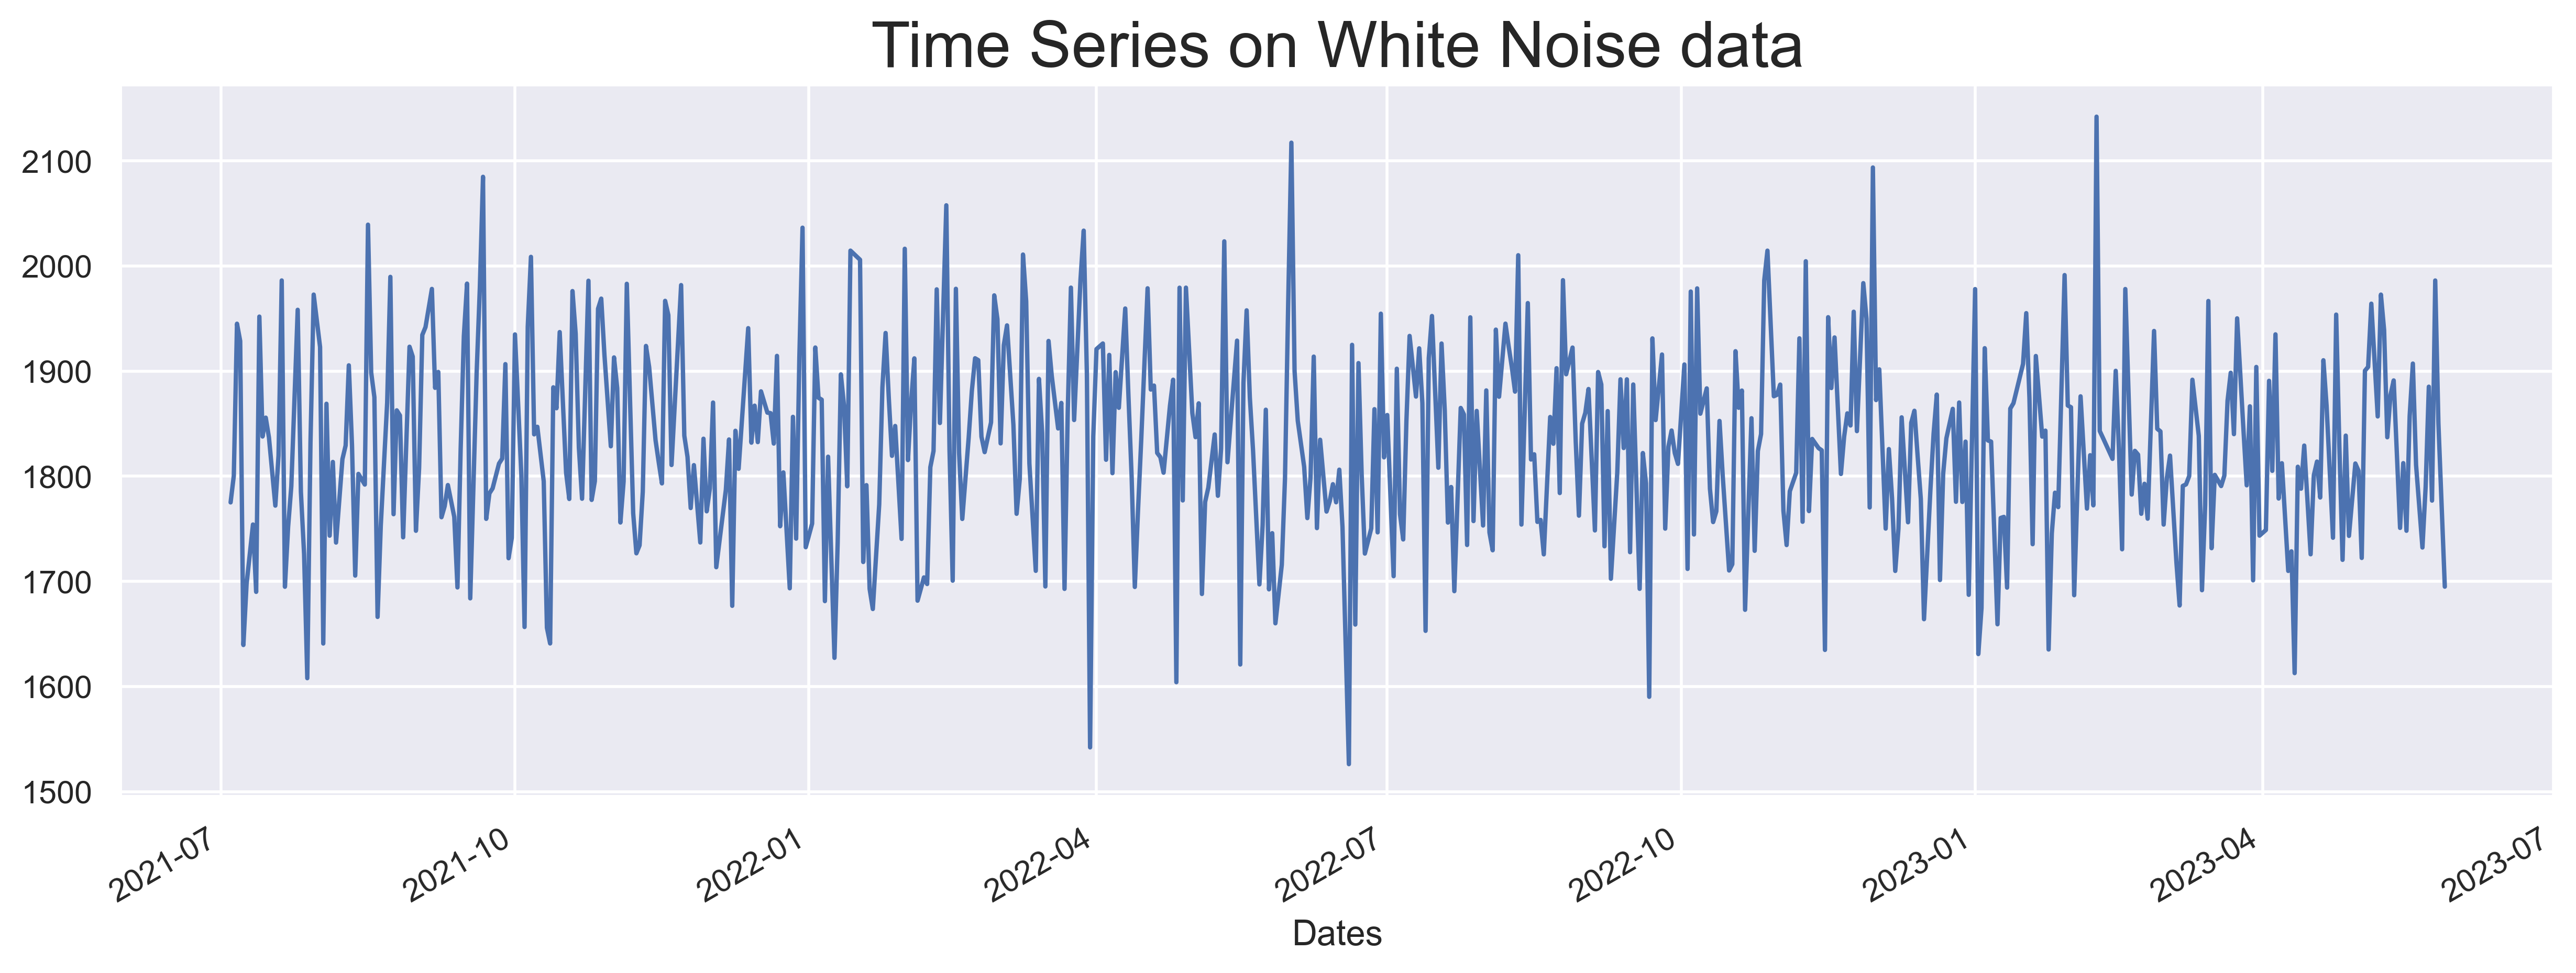

In [69]:
#plotting the white noise data

df.w_n.plot(figsize=(15,5))
plt.title("Time Series on White Noise data", size=22)
plt.show()

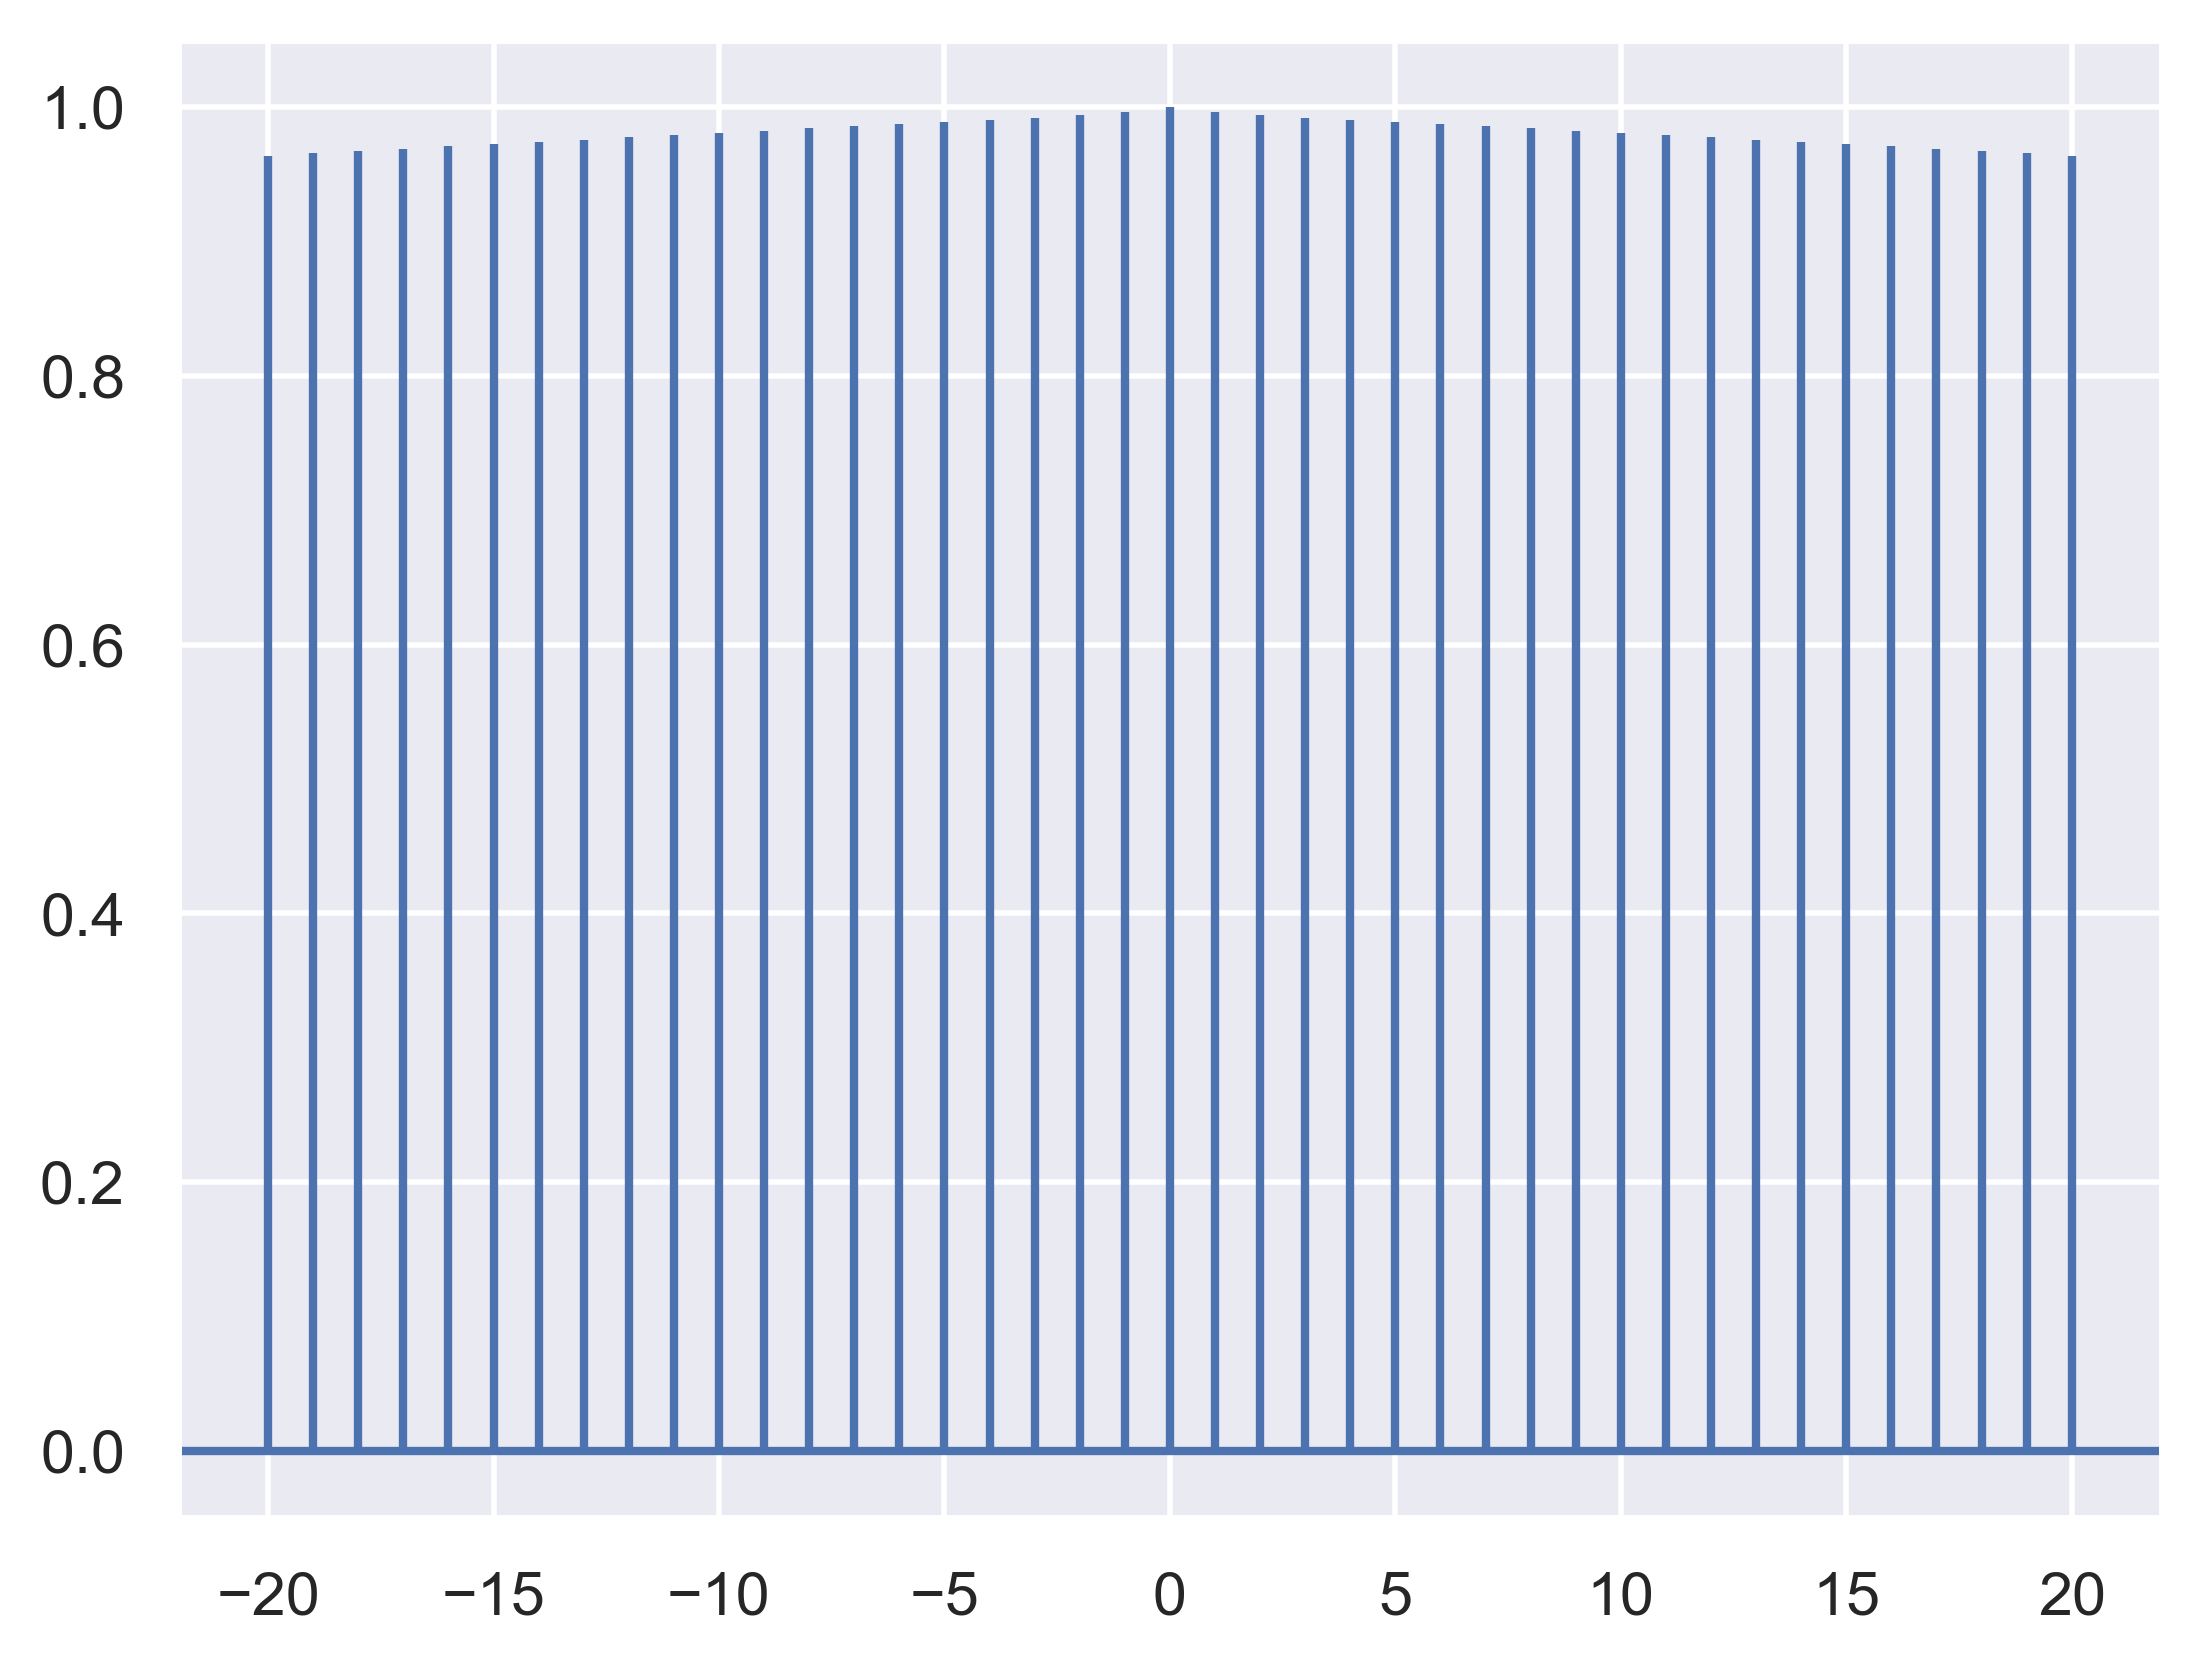

In [70]:
plt.acorr(df.w_n, maxlags=20)
plt.show()

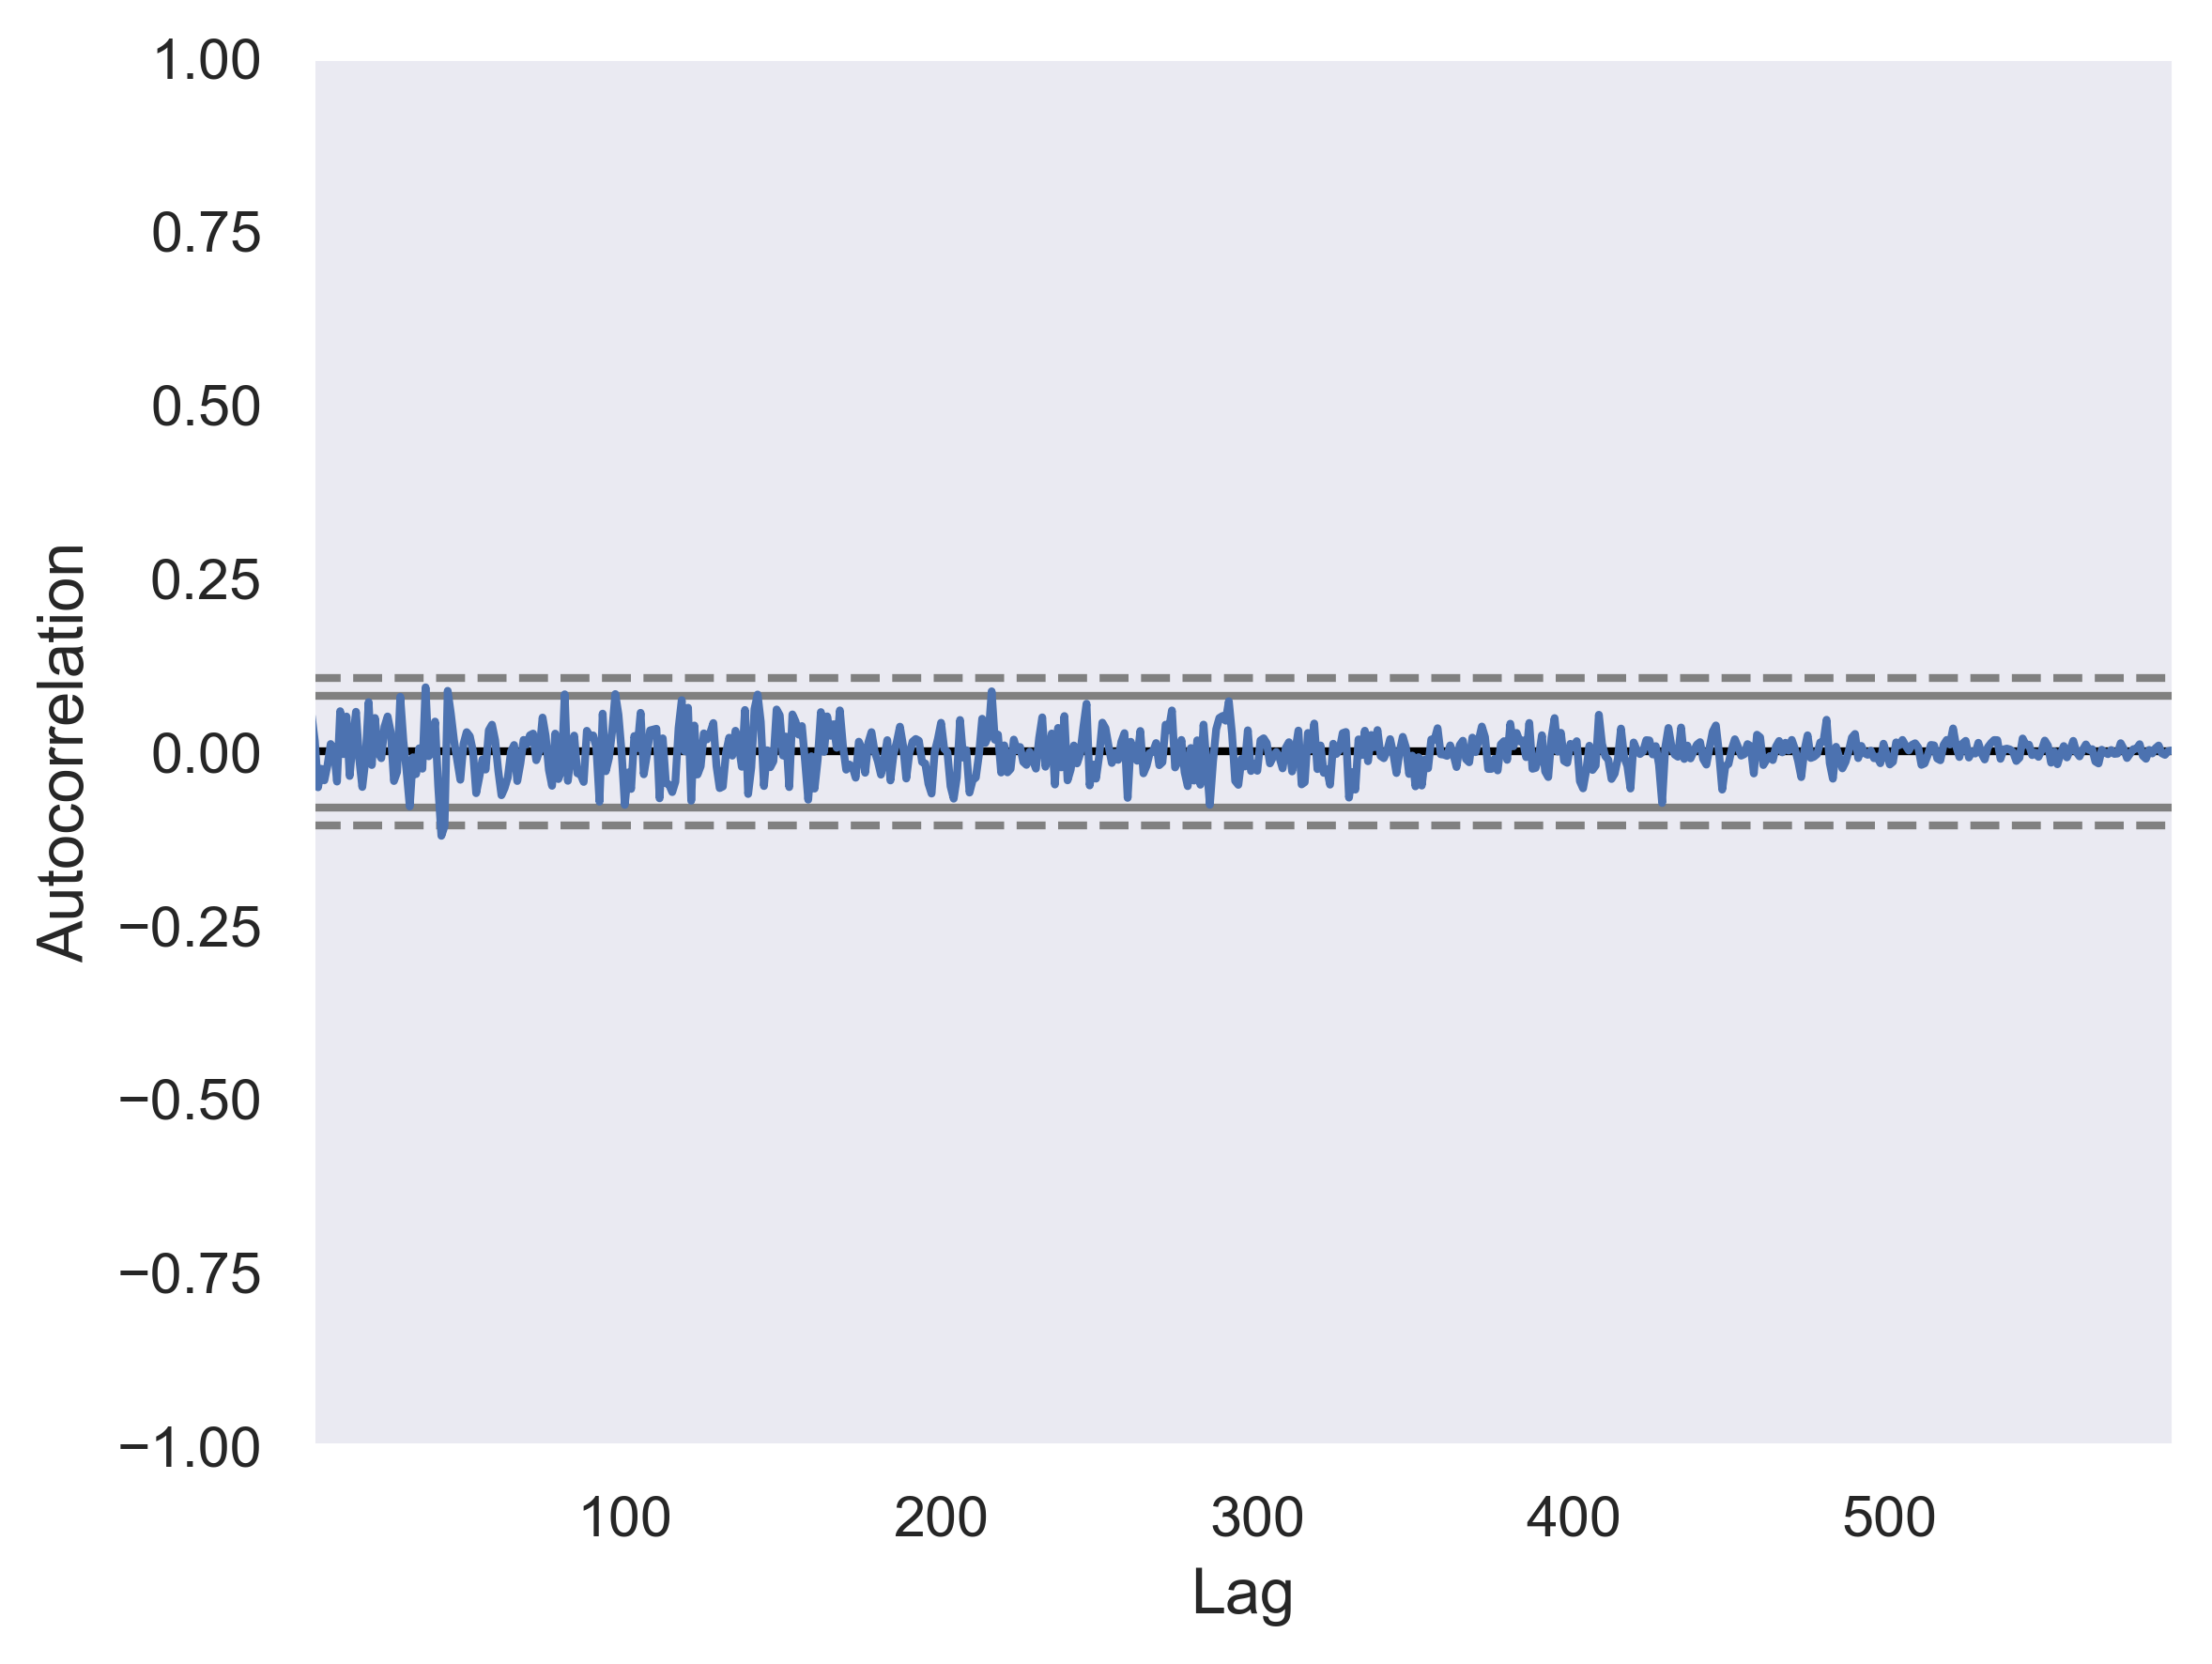

In [71]:
autocorrelation_plot(df.w_n)
plt.show()

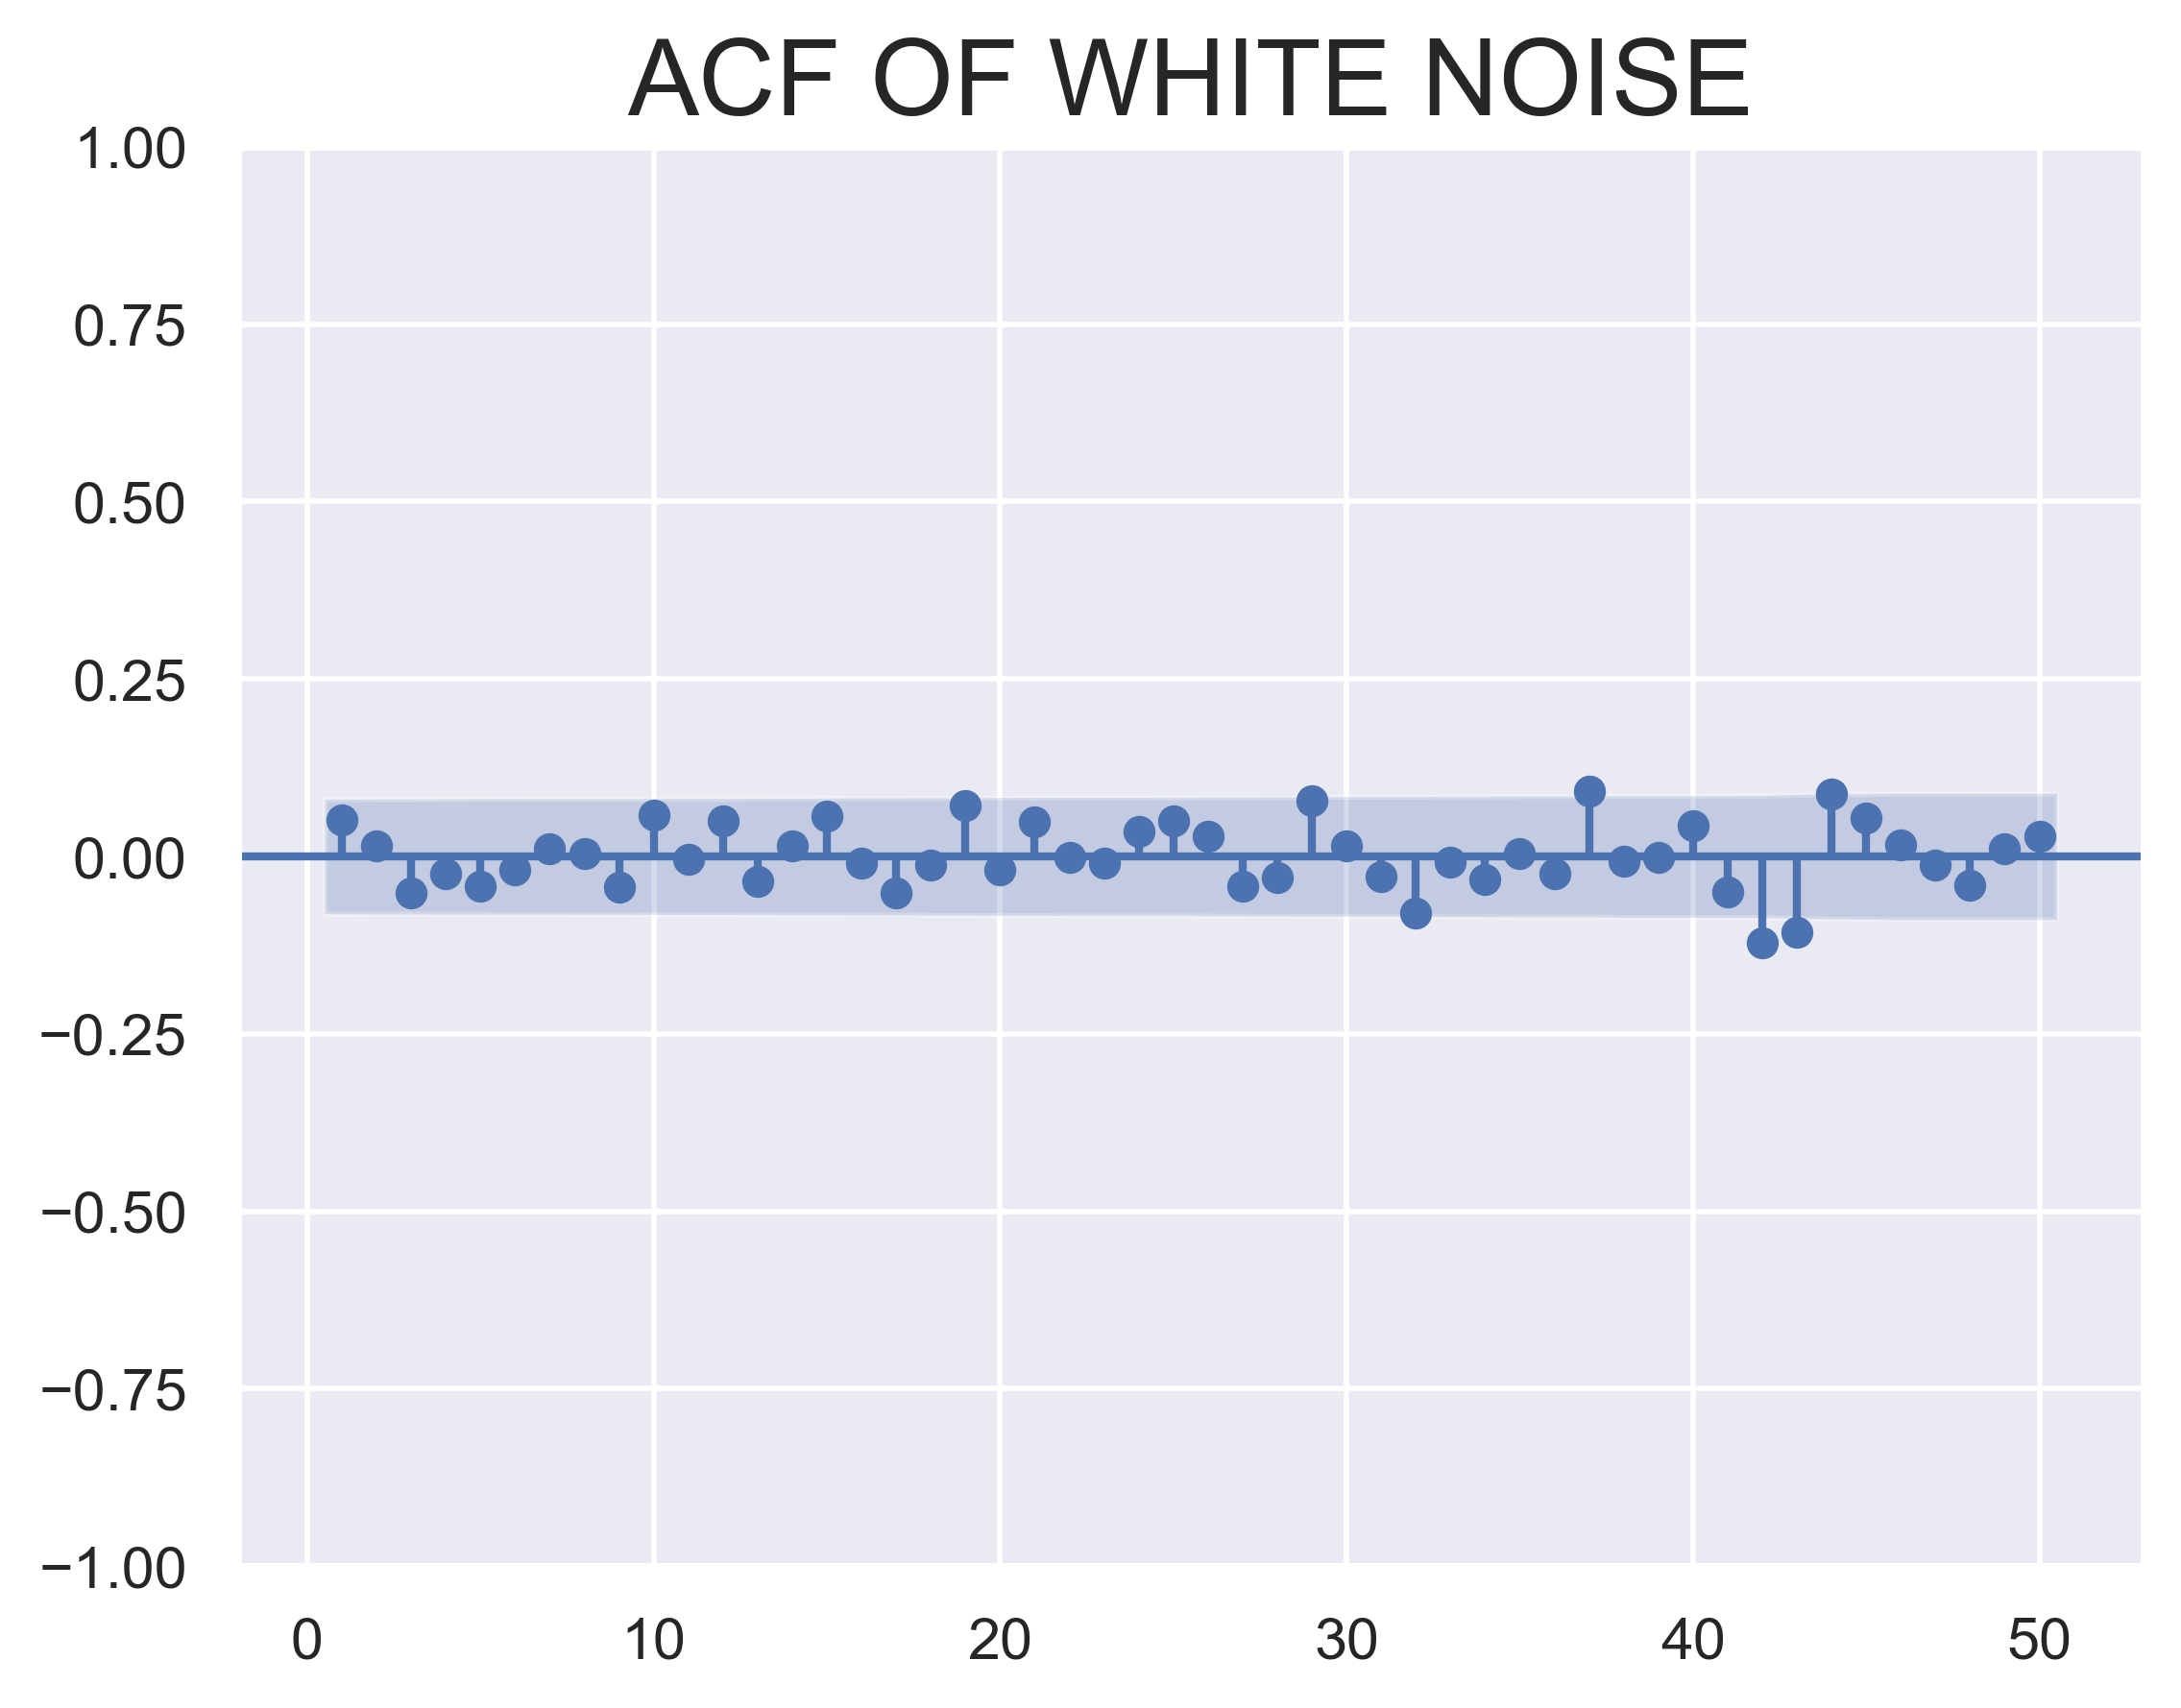

In [72]:
#SGT PLOT

sgt.plot_acf(df.w_n, zero = False, lags=50)
plt.title("ACF OF WHITE NOISE", size=20)
plt.show()

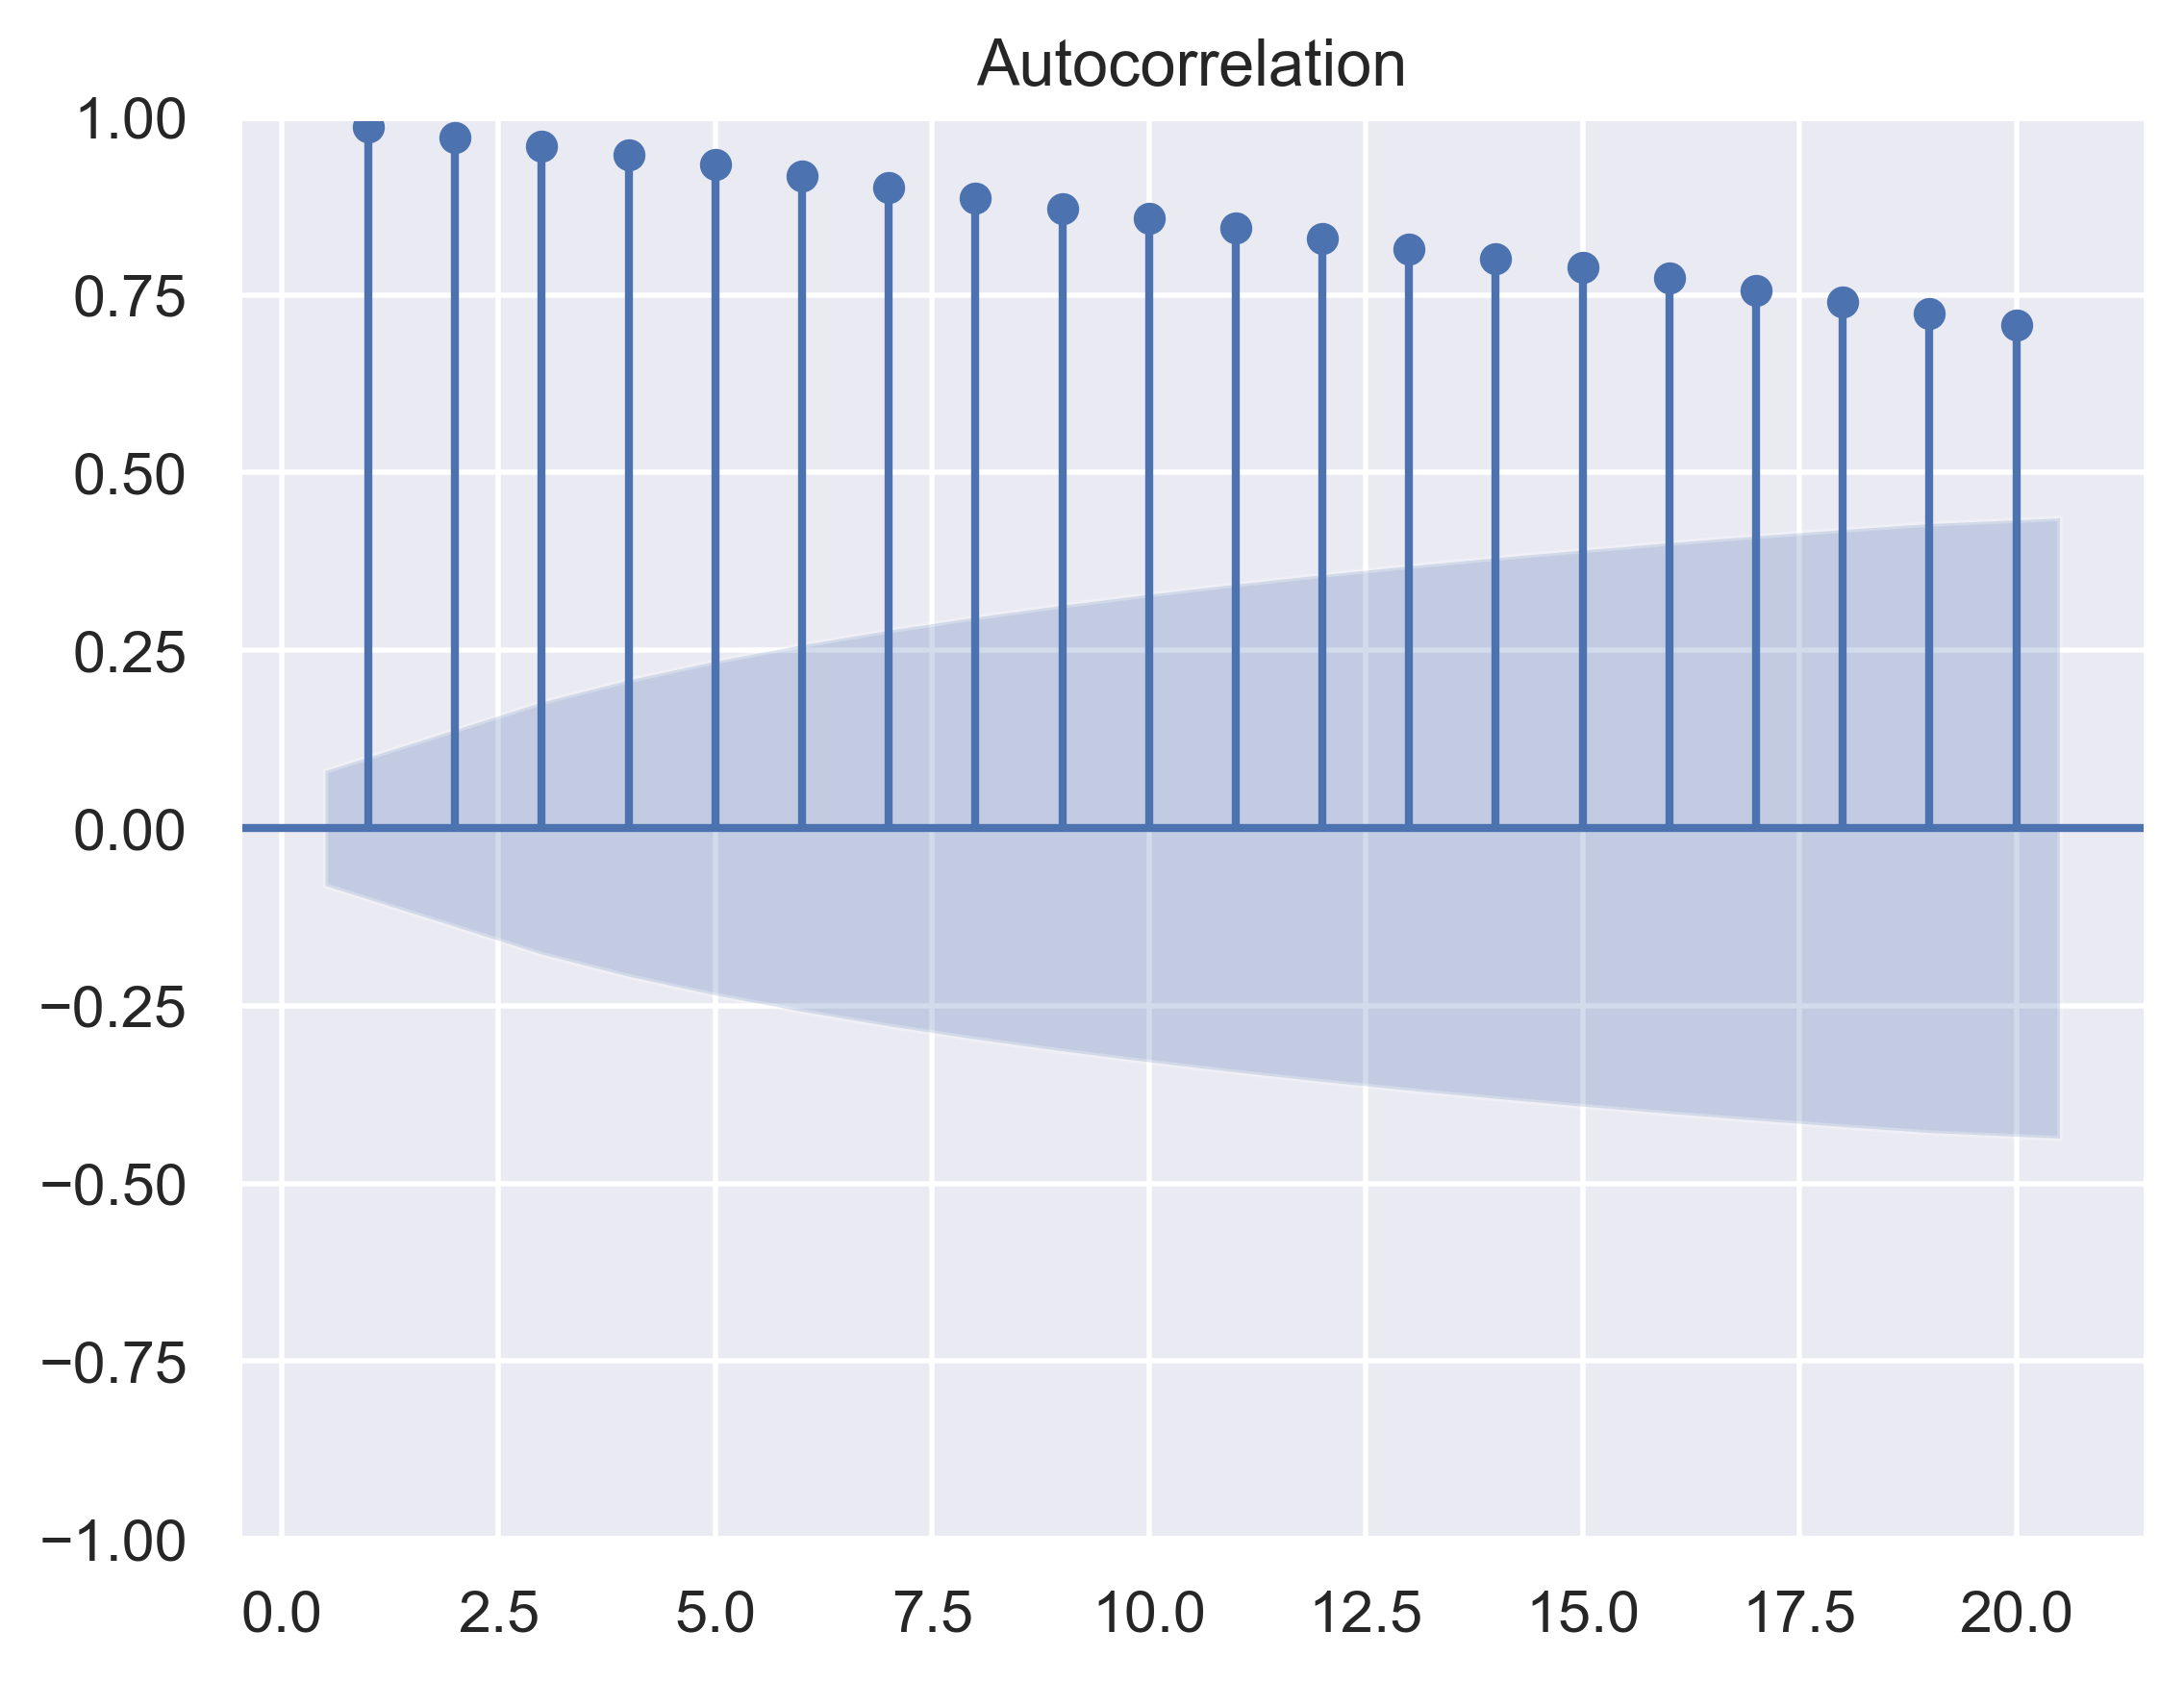

In [73]:
sgt.plot_acf(df['Close'], zero= False, lags=20)
plt.show()

### Random Walk

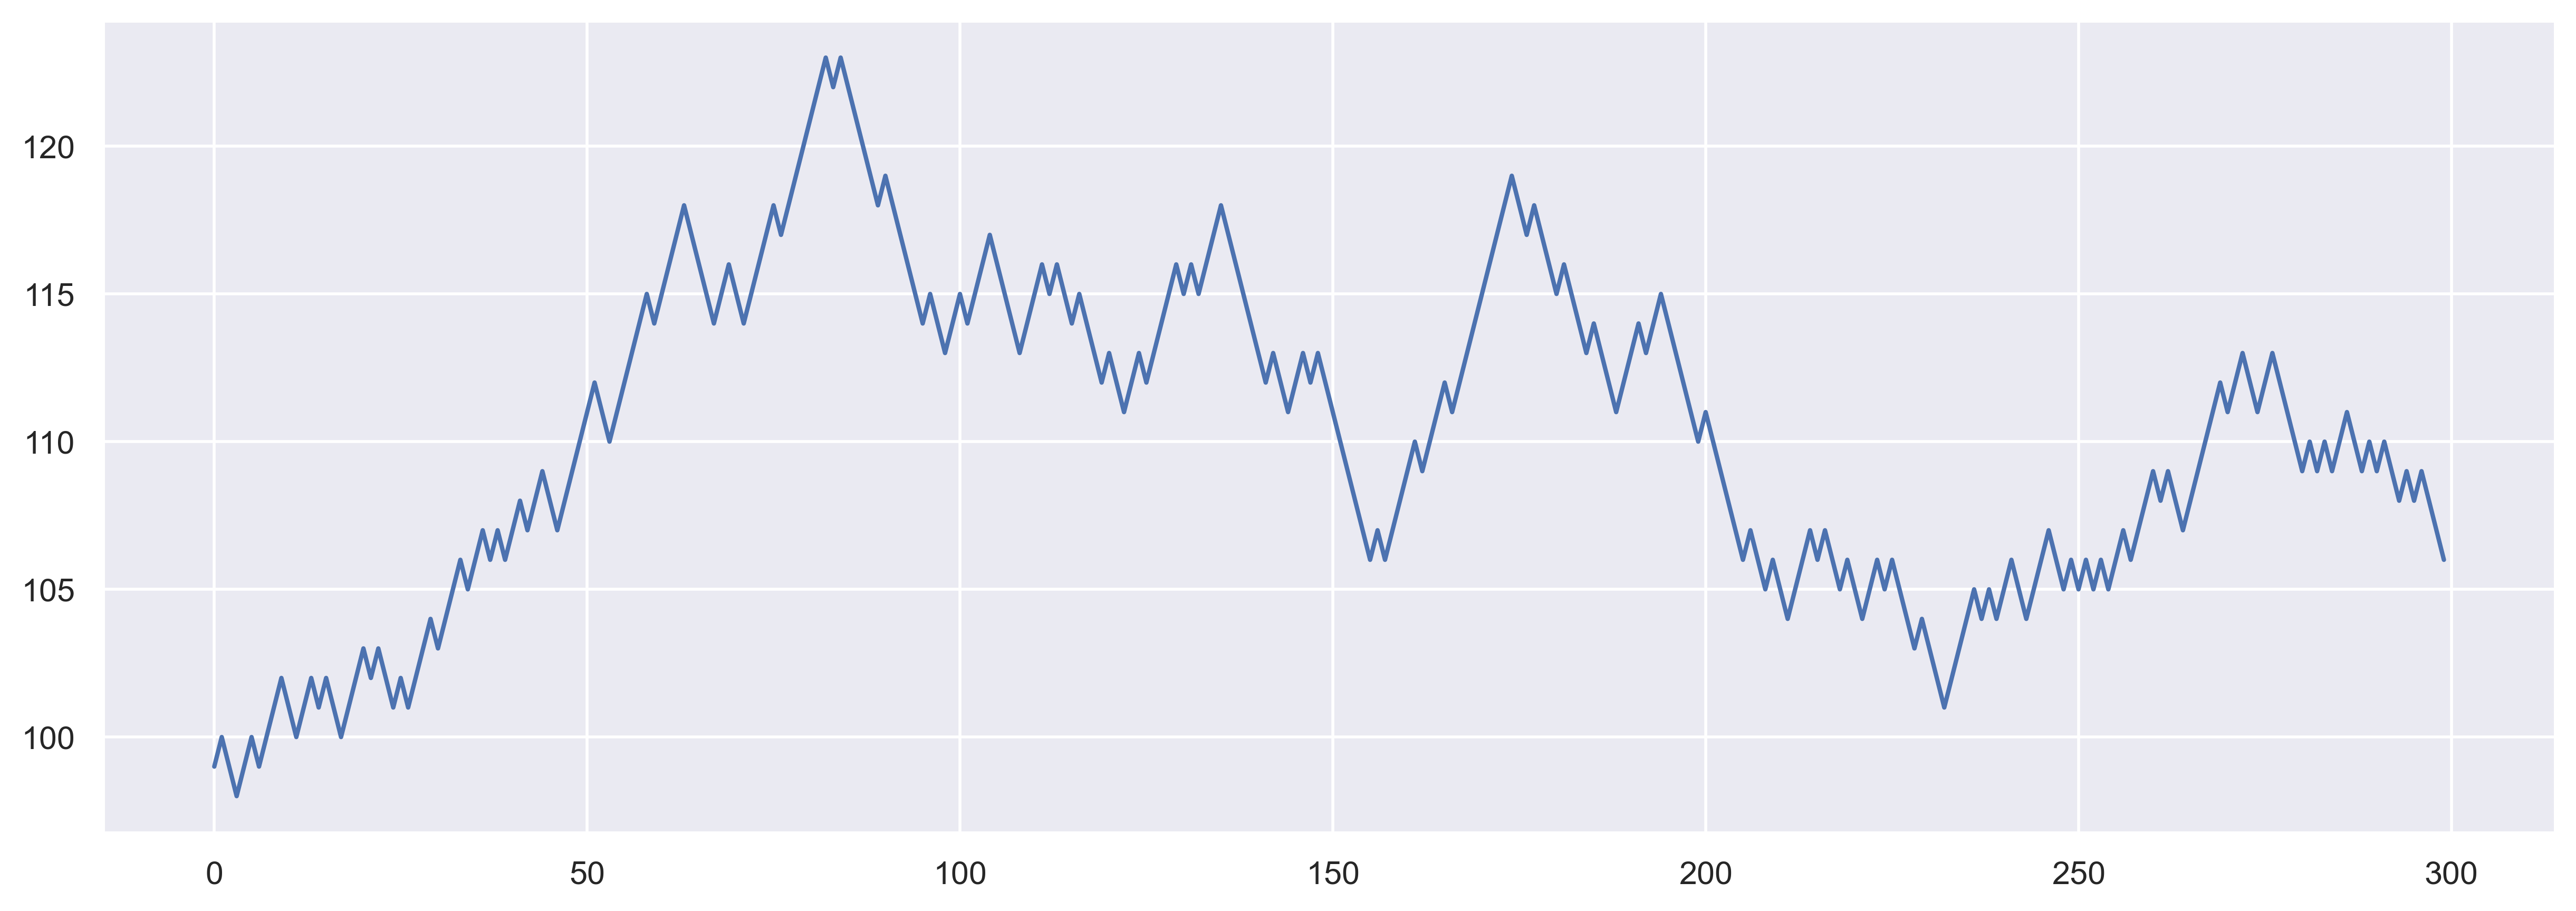

In [74]:
walk = [99]
noise1 = []

for i in range(2000):
    noise = -1 if np.random.random() < 0.5 else 1
    noise1.append(noise)
    walk.append(walk[i] + noise)

plt.figure(figsize=(15,5))
plt.plot(walk[:300])

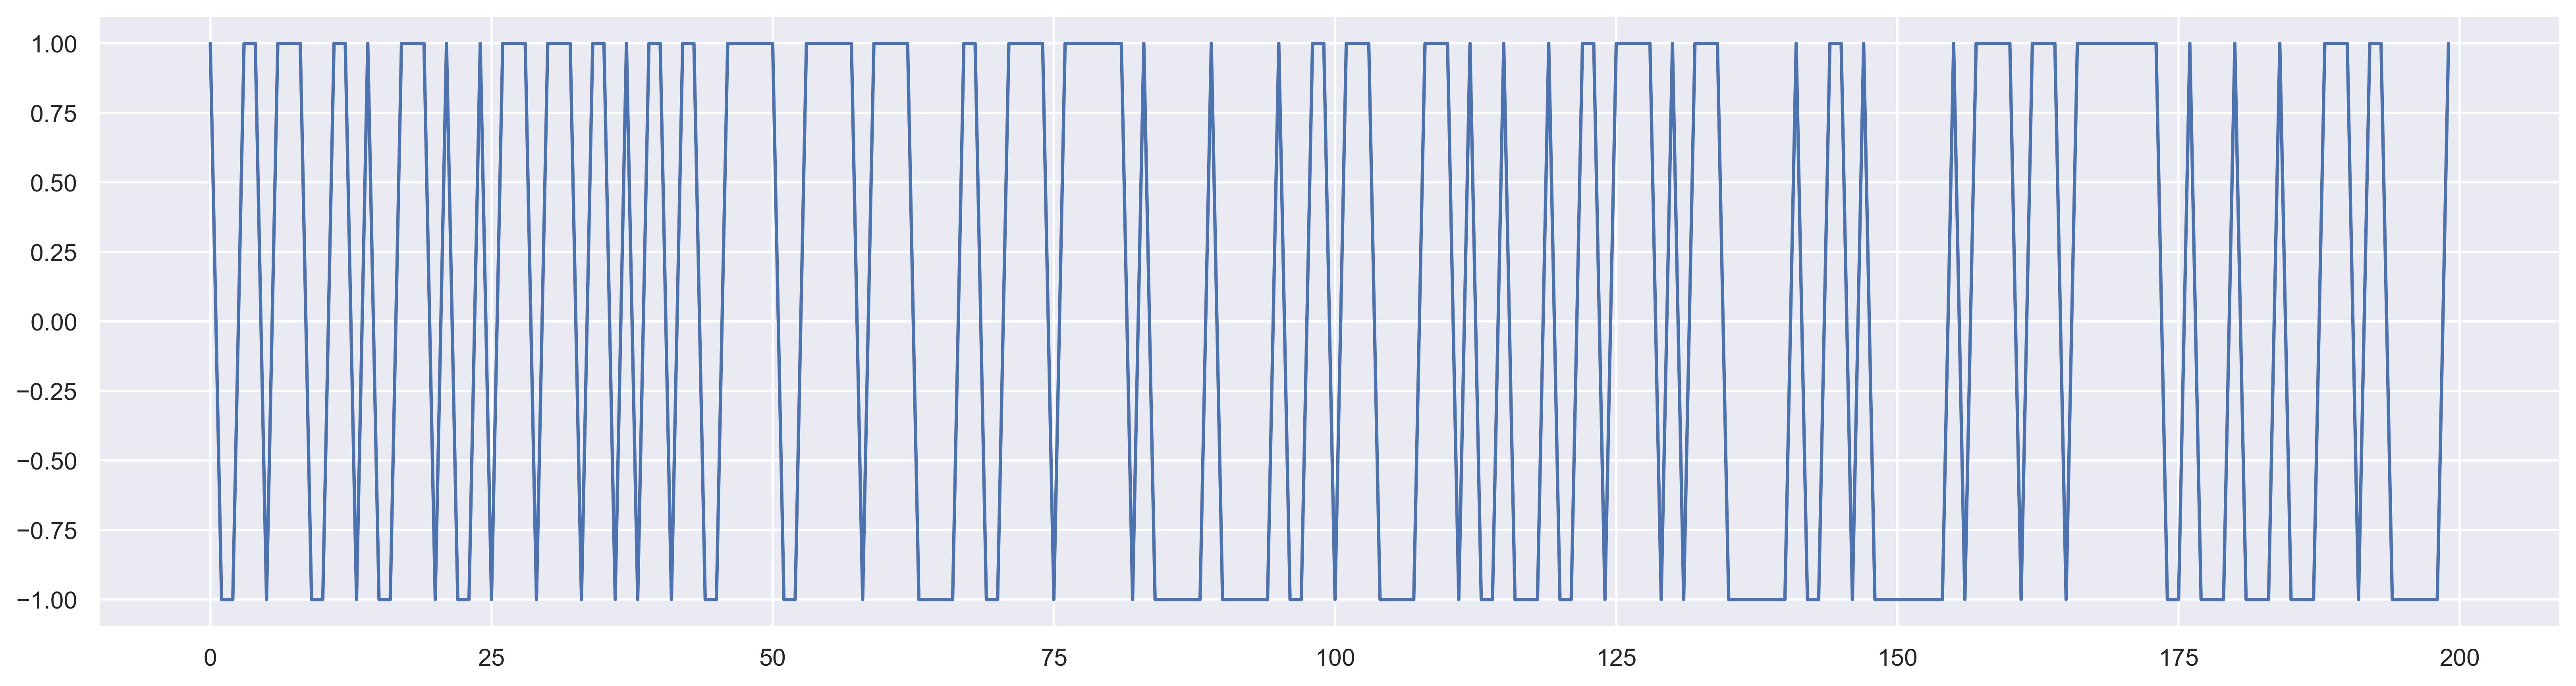

In [75]:
plt.figure(figsize=(20,5))
plt.plot(noise1[:200])

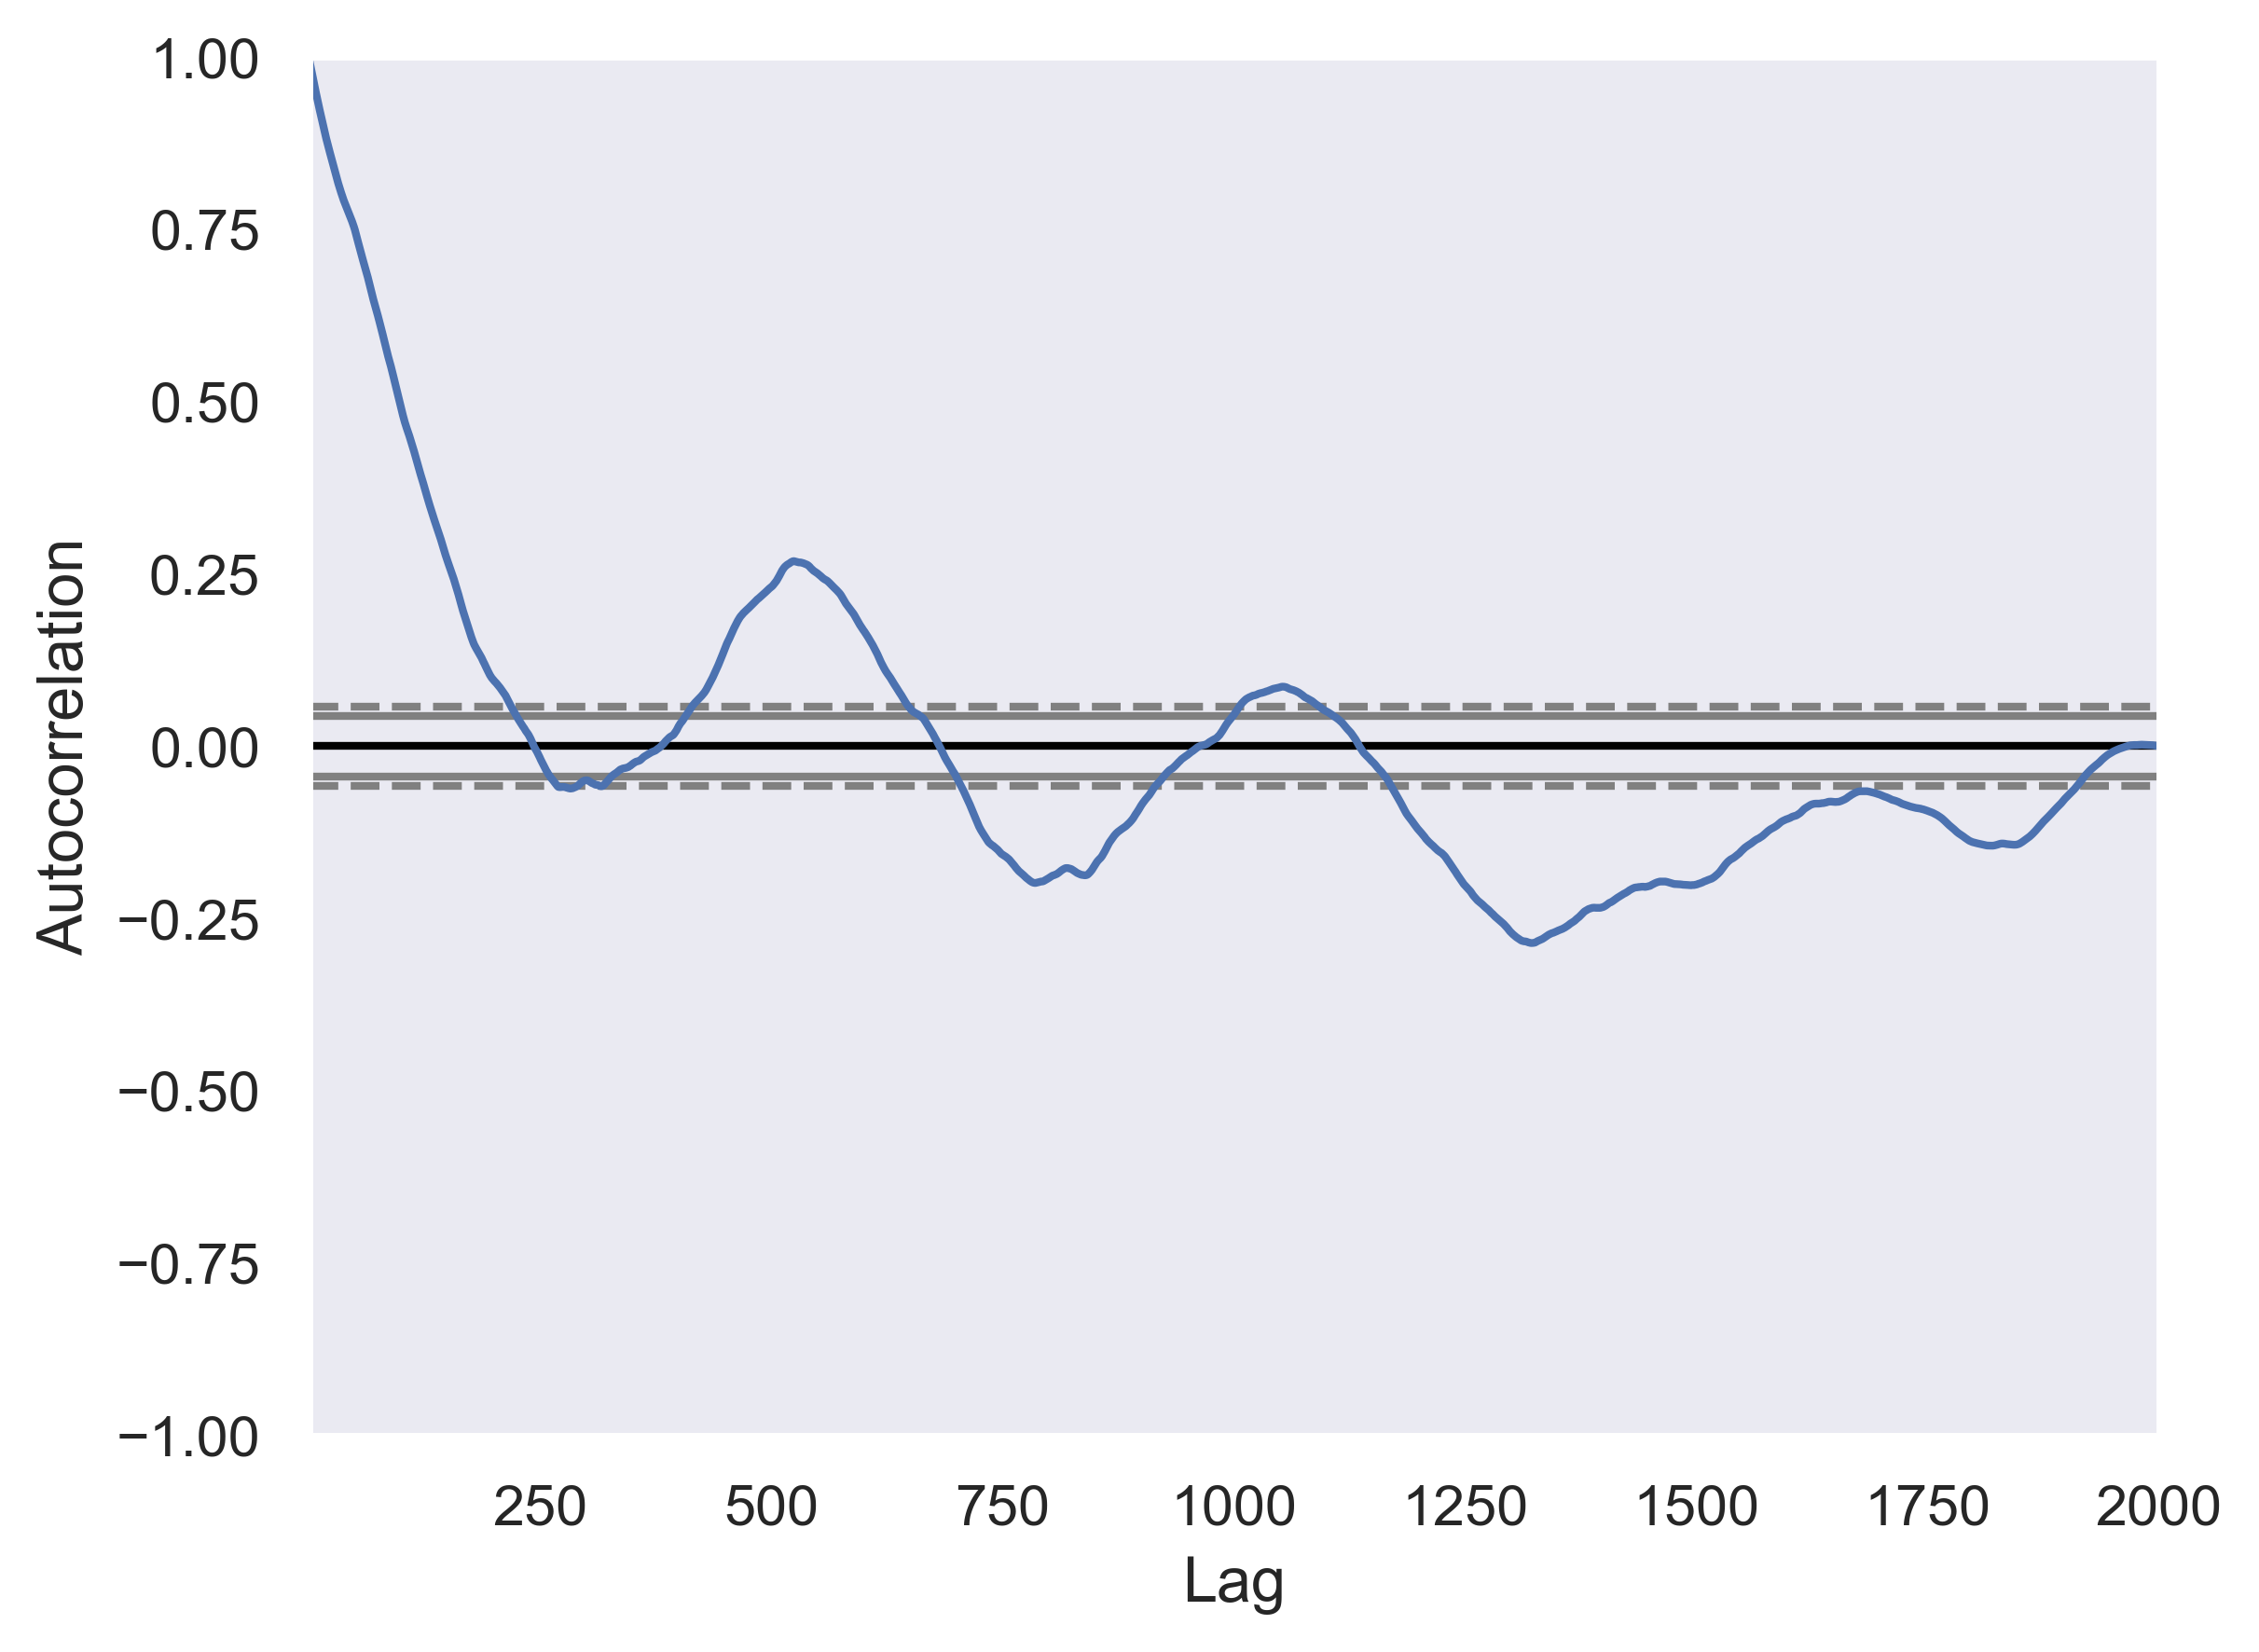

In [76]:
autocorrelation_plot(walk)
plt.show()

### Stationarity Check

In [77]:
sts.adfuller(df['Close'])

(-1.7744445014721169,
 0.3932210499703771,
 0,
 589,
 {'1%': -3.4415011513018263,
  '5%': -2.8664595311890215,
  '10%': -2.569389981494346},
 4715.629377789716)

In [78]:
# CAN WE PROVE THAT THE DATA IS NOT STATIONARY
test_statistic, p_value, used_lag, n_obs, critical_values, maximized_information_criterion = sts.adfuller(df['Close'])

for k,v in critical_values.items():
    if test_statistic < v:
        print("Data is stationary with a %.2f%% of confidence" % (1-(float(k.rstrip('%')))/100))
    else:
        print("There isn't enough proof to reject that data isn't stationary with a %.2f%% of confidence"% (1-(float(k.rstrip('%')))/100))


There isn't enough proof to reject that data isn't stationary with a 0.99% of confidence
There isn't enough proof to reject that data isn't stationary with a 0.95% of confidence
There isn't enough proof to reject that data isn't stationary with a 0.90% of confidence


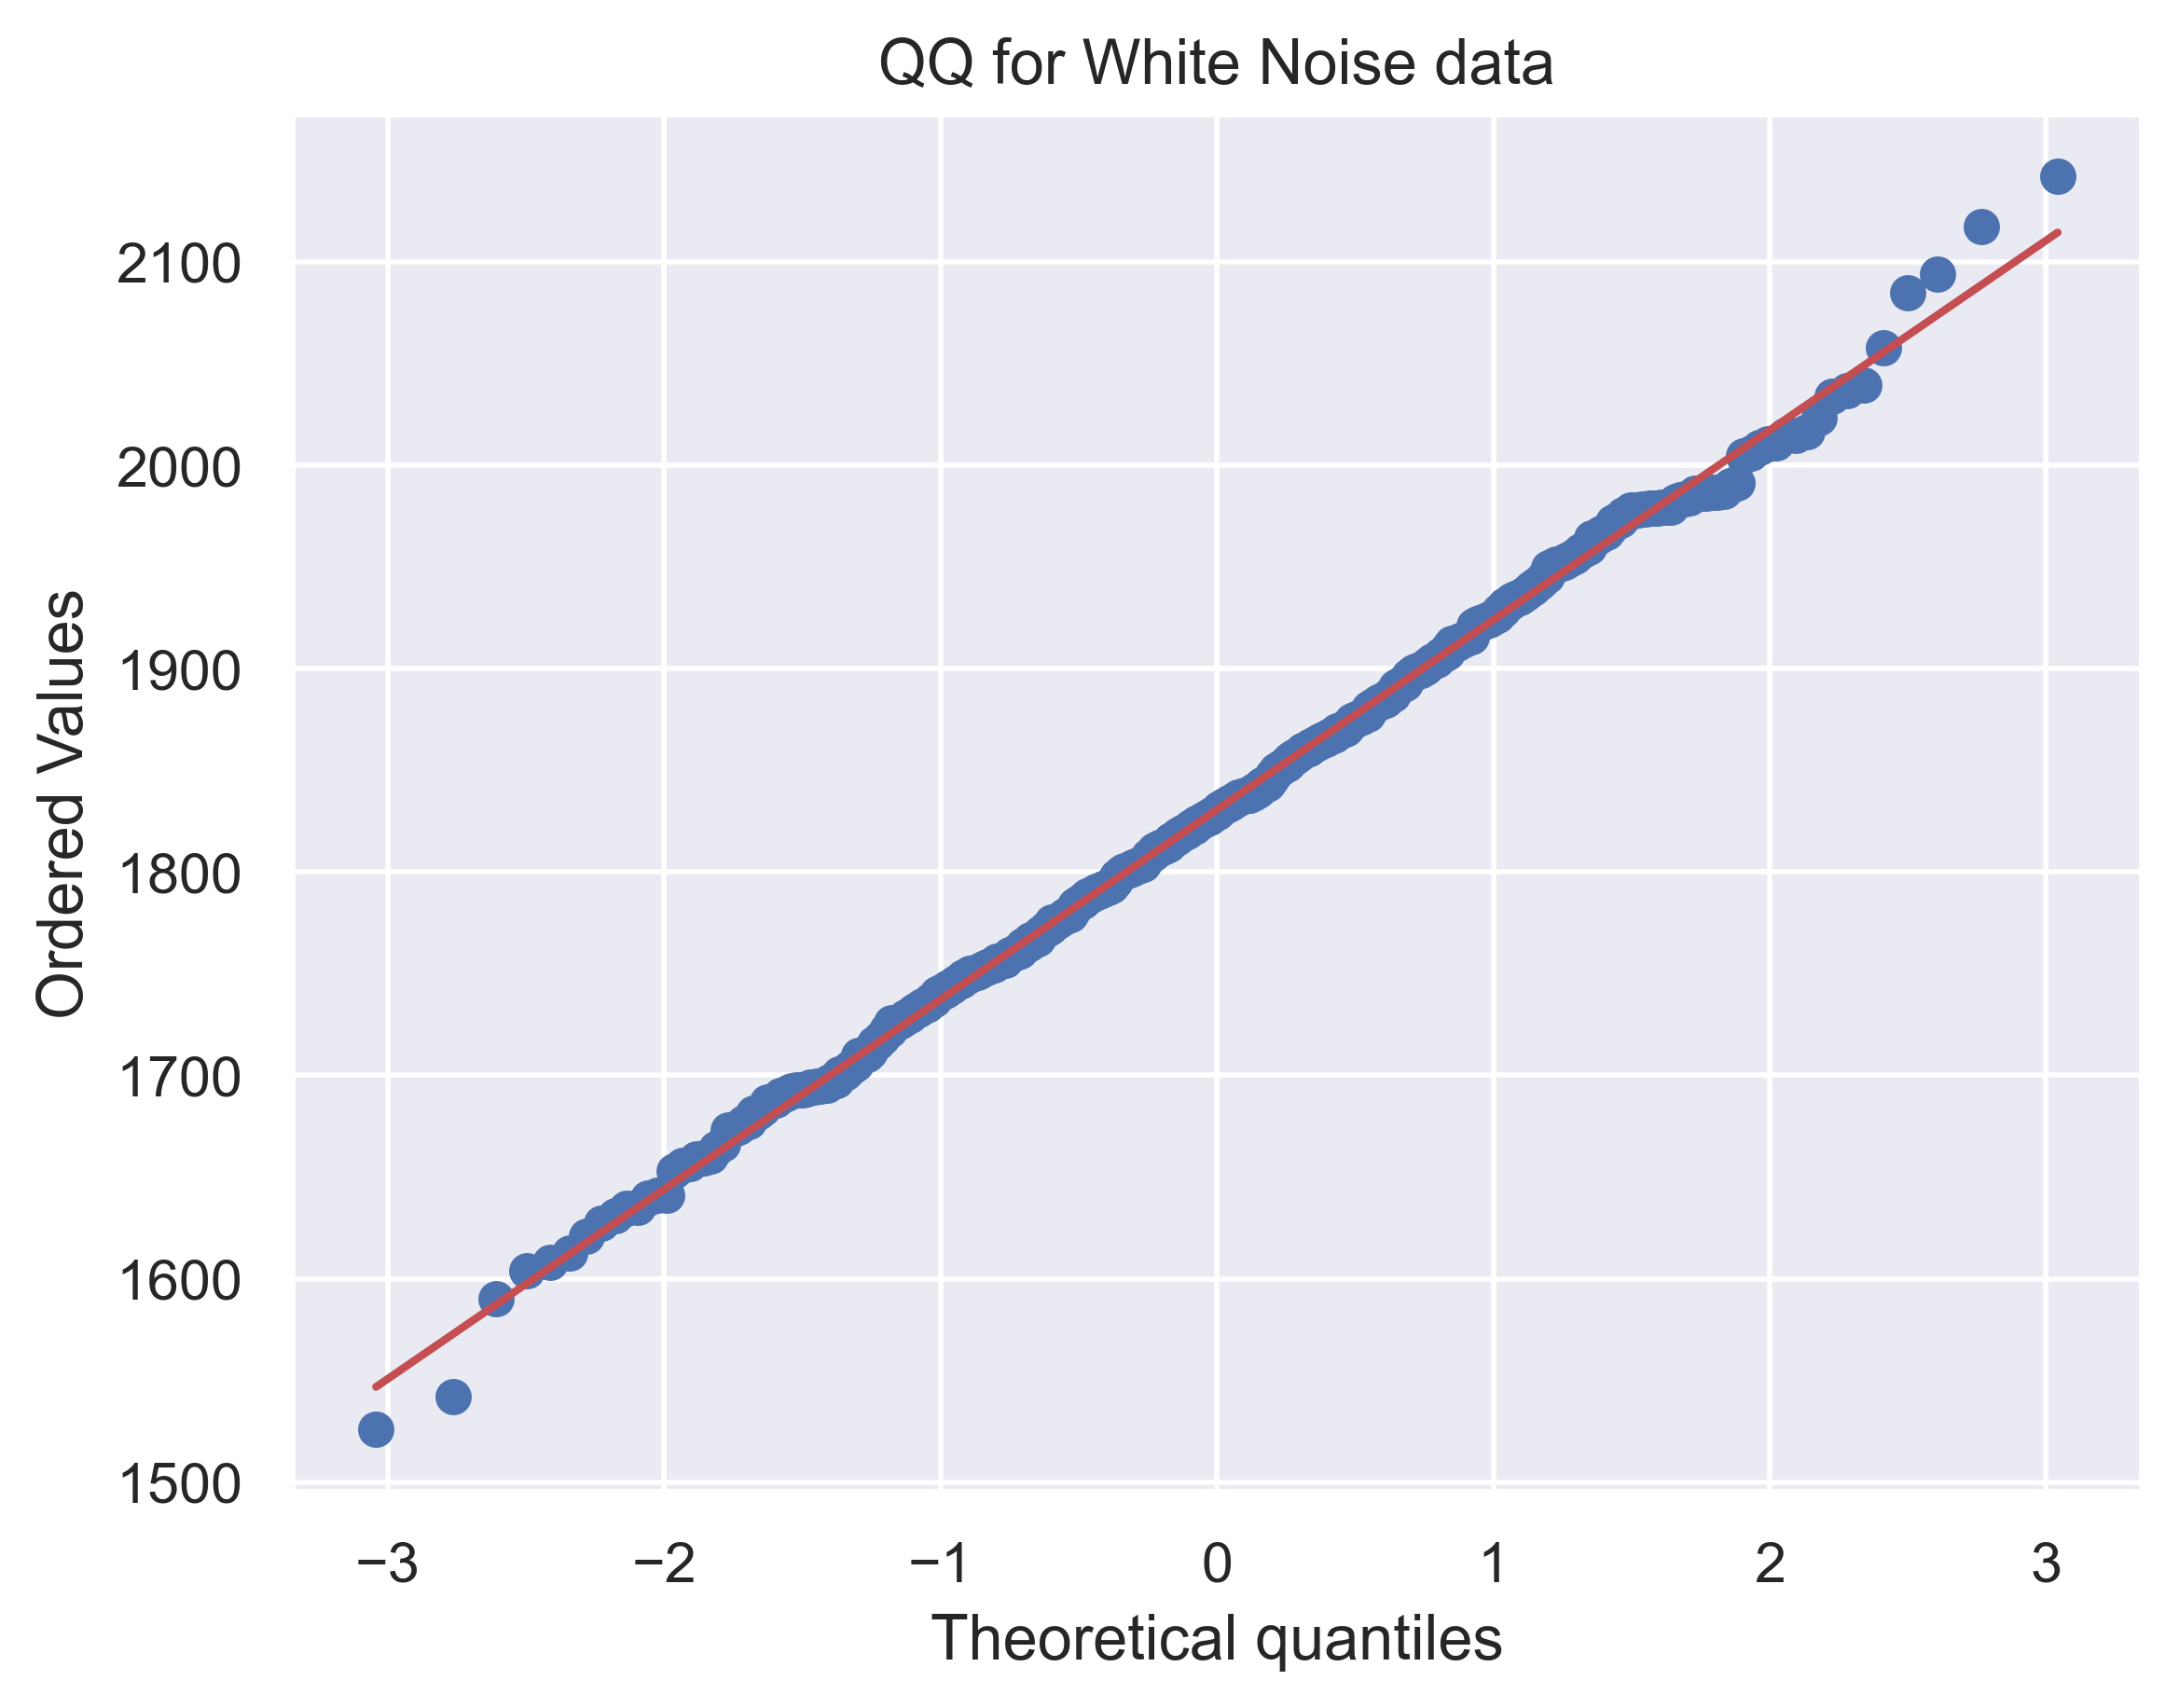

In [81]:
#QQ plot for gausian test

scipy.stats.probplot(df['w_n'], plot=pylab)
plt.title("QQ for White Noise data")
pylab.show()

### Seasonality

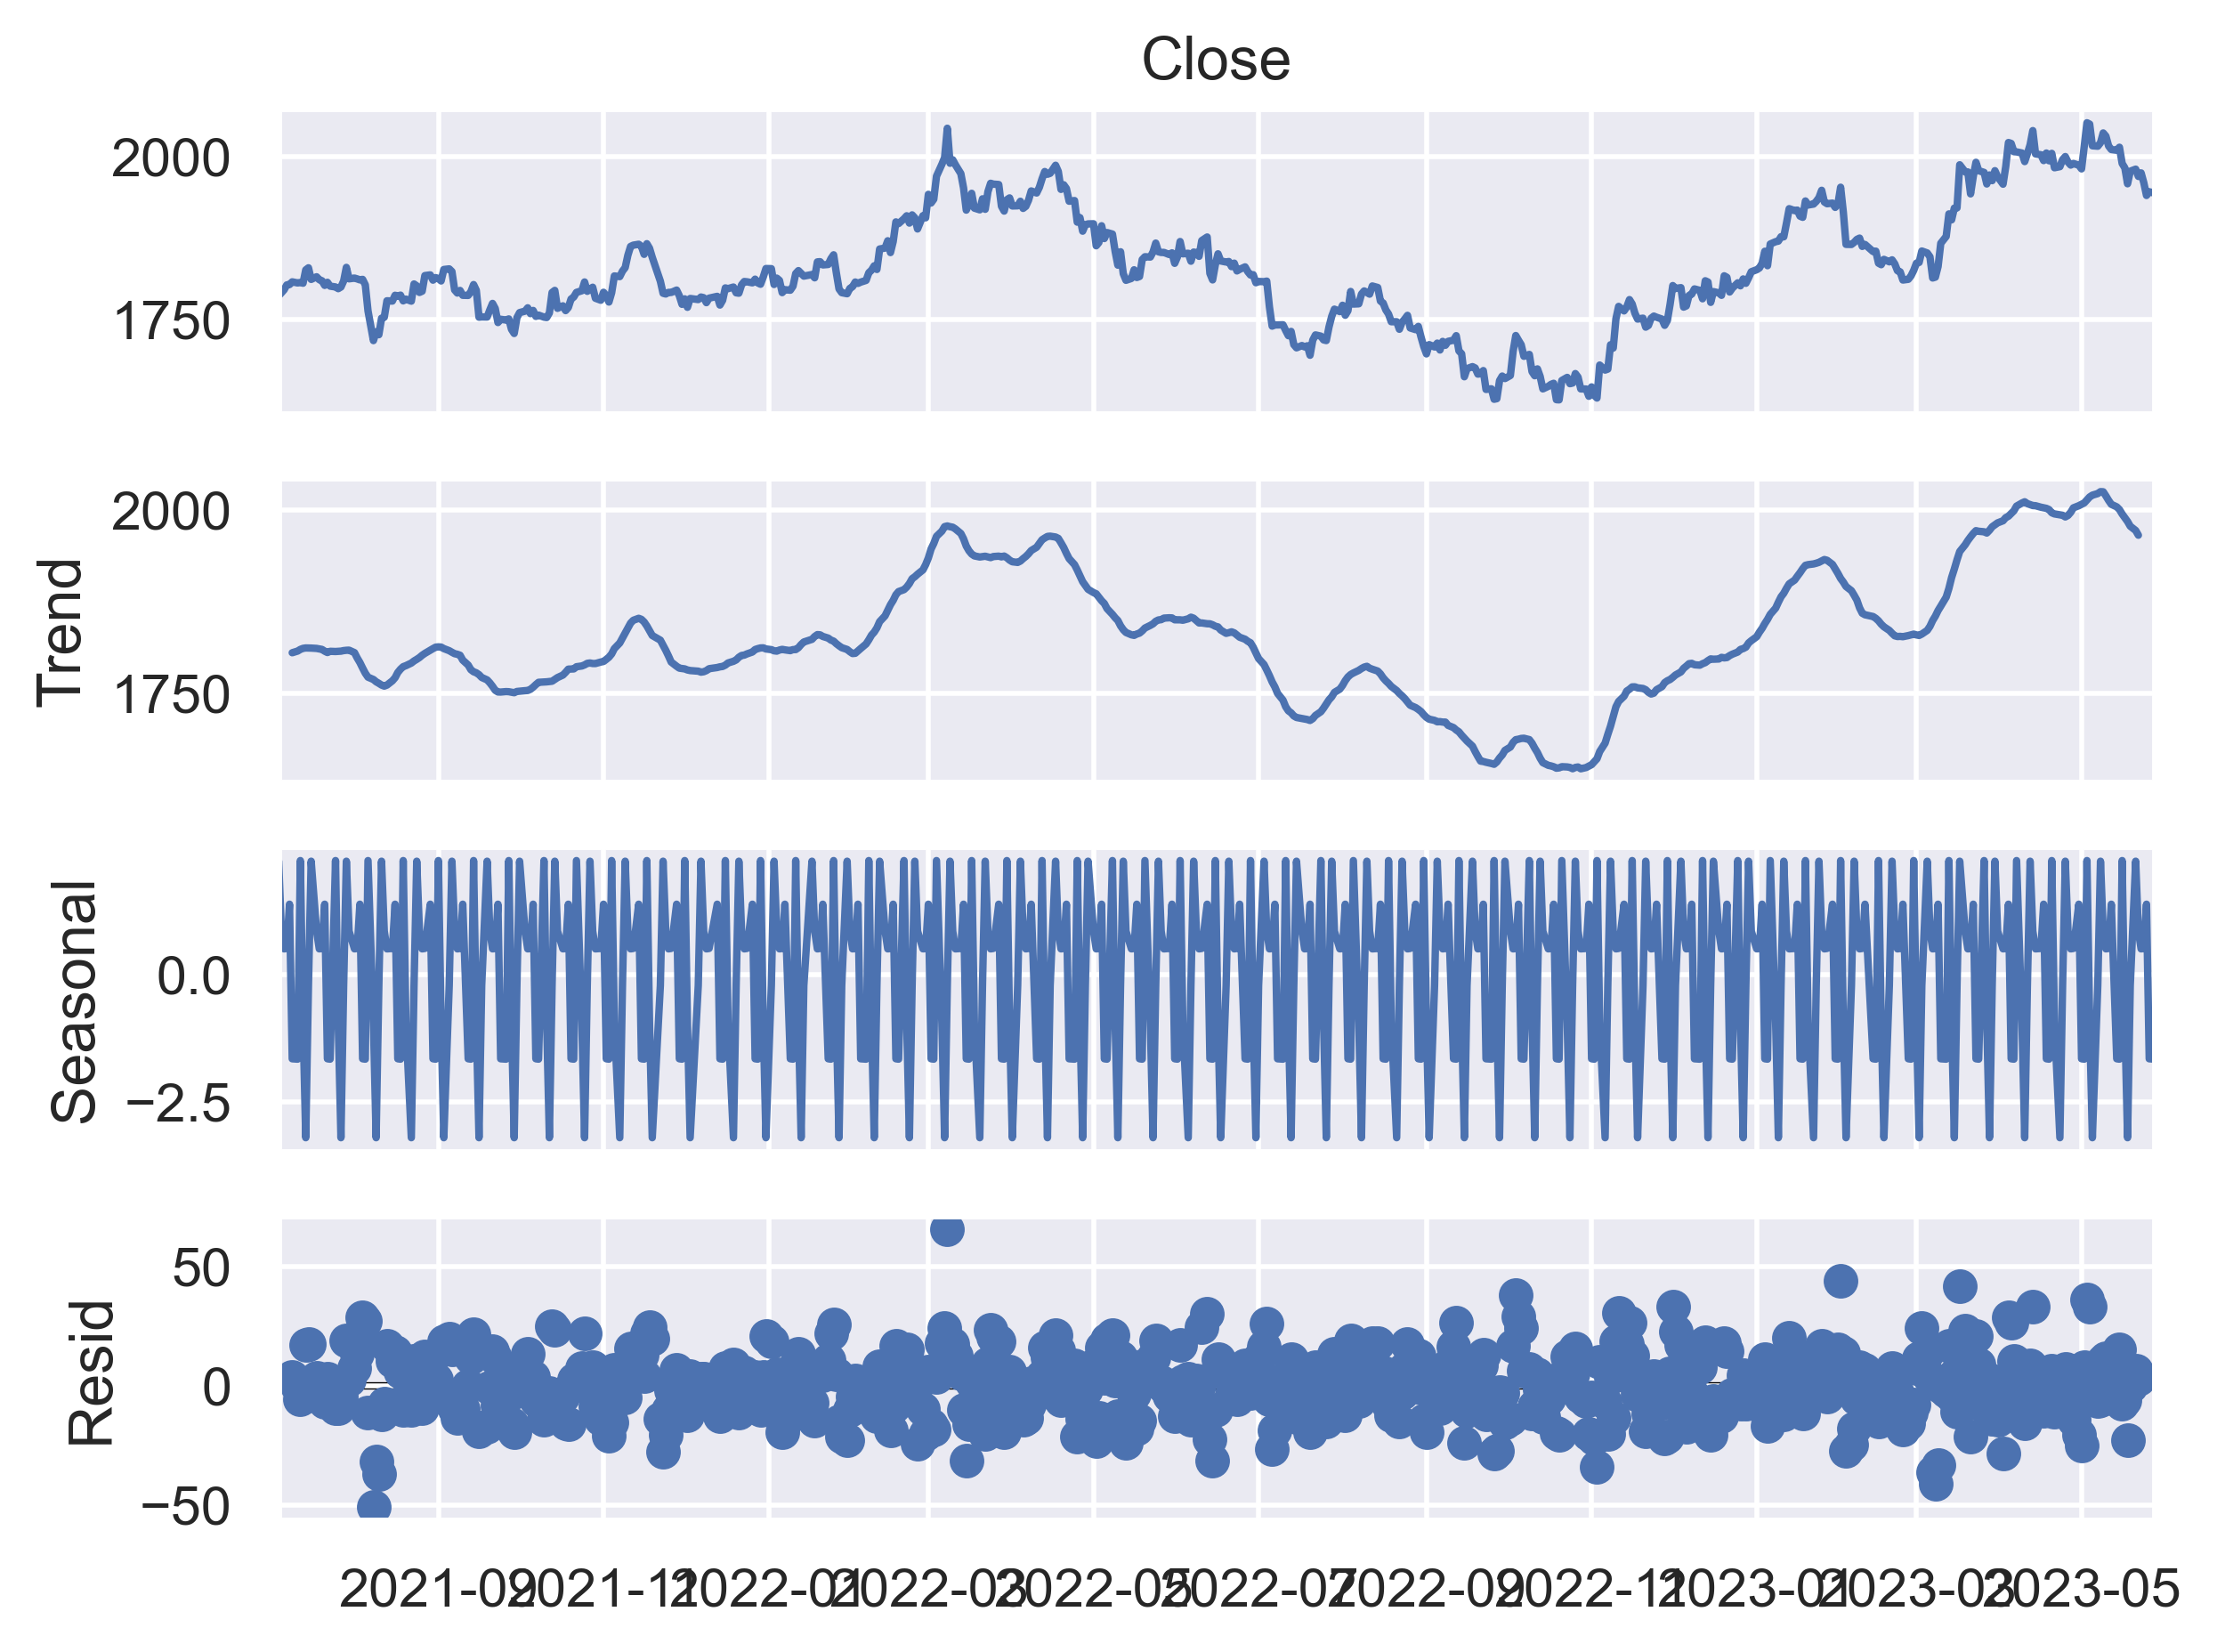

In [82]:
#Naive decomposition Additive / Multiplicative

additive = seasonal_decompose(df['Close'], model="additive", period=11)
additive.plot()
plt.show()

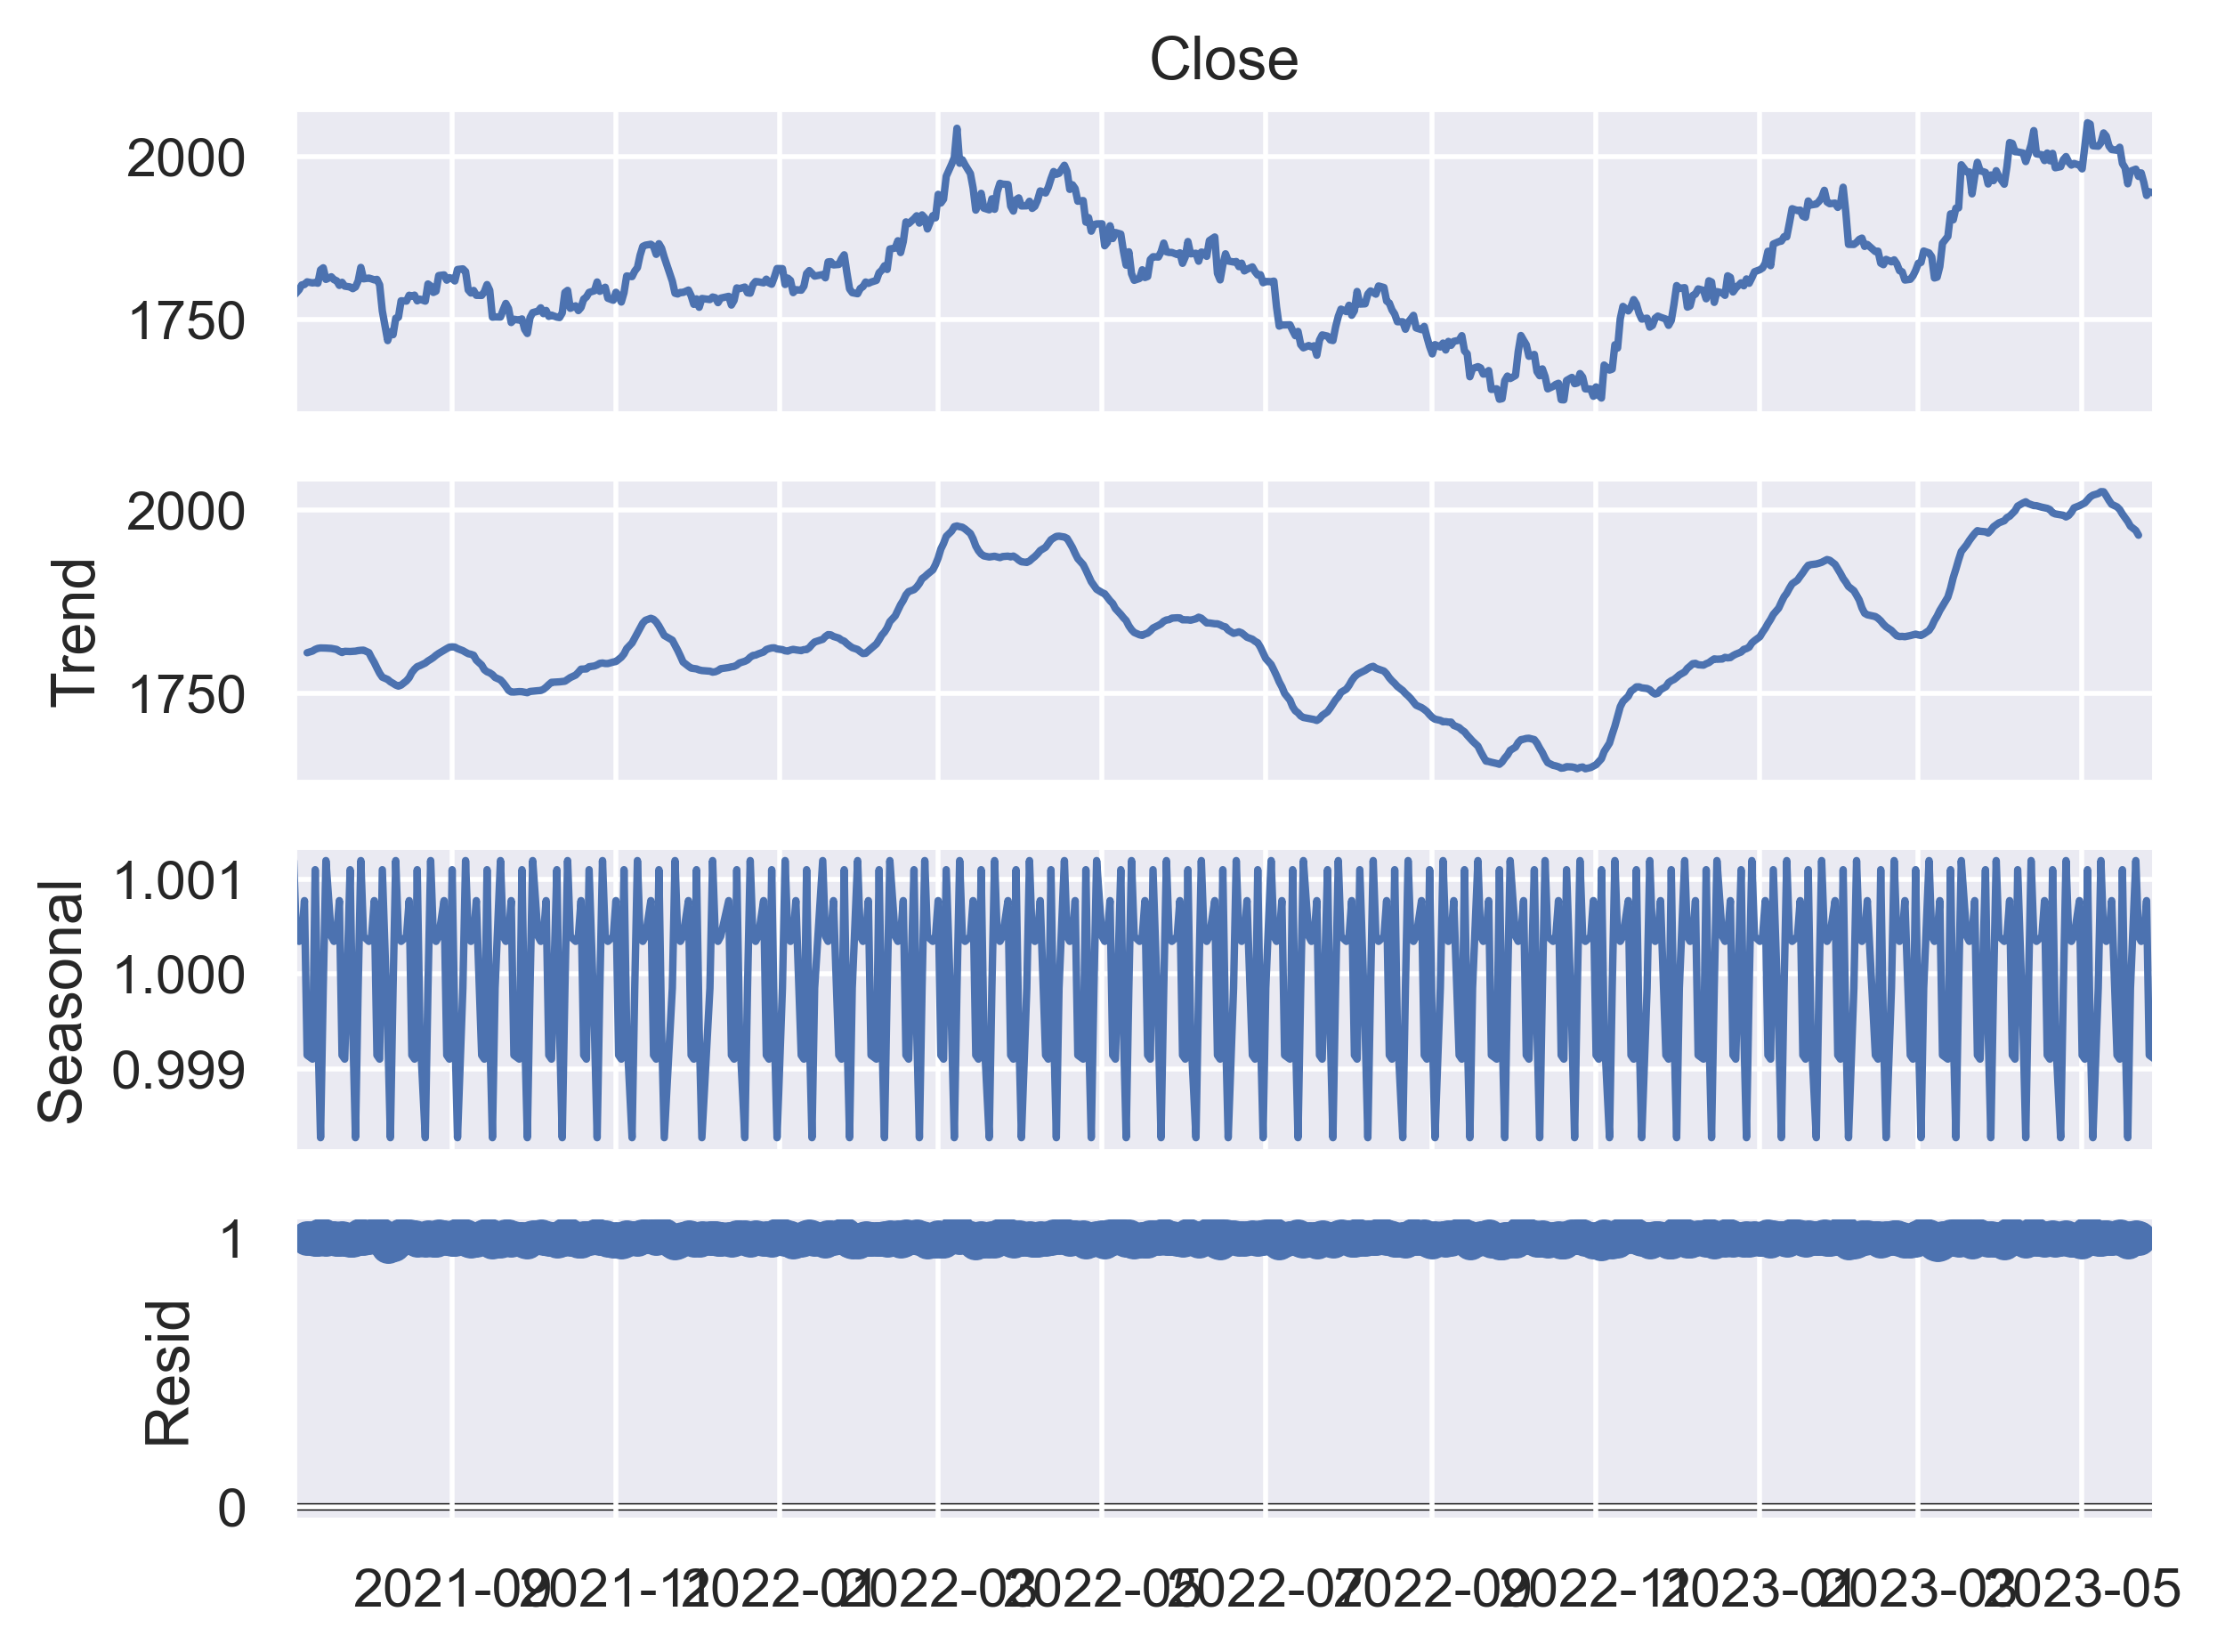

In [83]:
multiplicative = seasonal_decompose(df['Close'], model="multiplicative", period=11)
multiplicative.plot()
plt.show()

### Holt Winter Exponential Smoothing

In [84]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [85]:
h_model = ExponentialSmoothing(df['Close'].tolist())
model_fit = h_model.fit()

In [86]:
yhat = model_fit.predict(1, len(df))
#to predict all datapoints that are same as the dataset

# df.head()

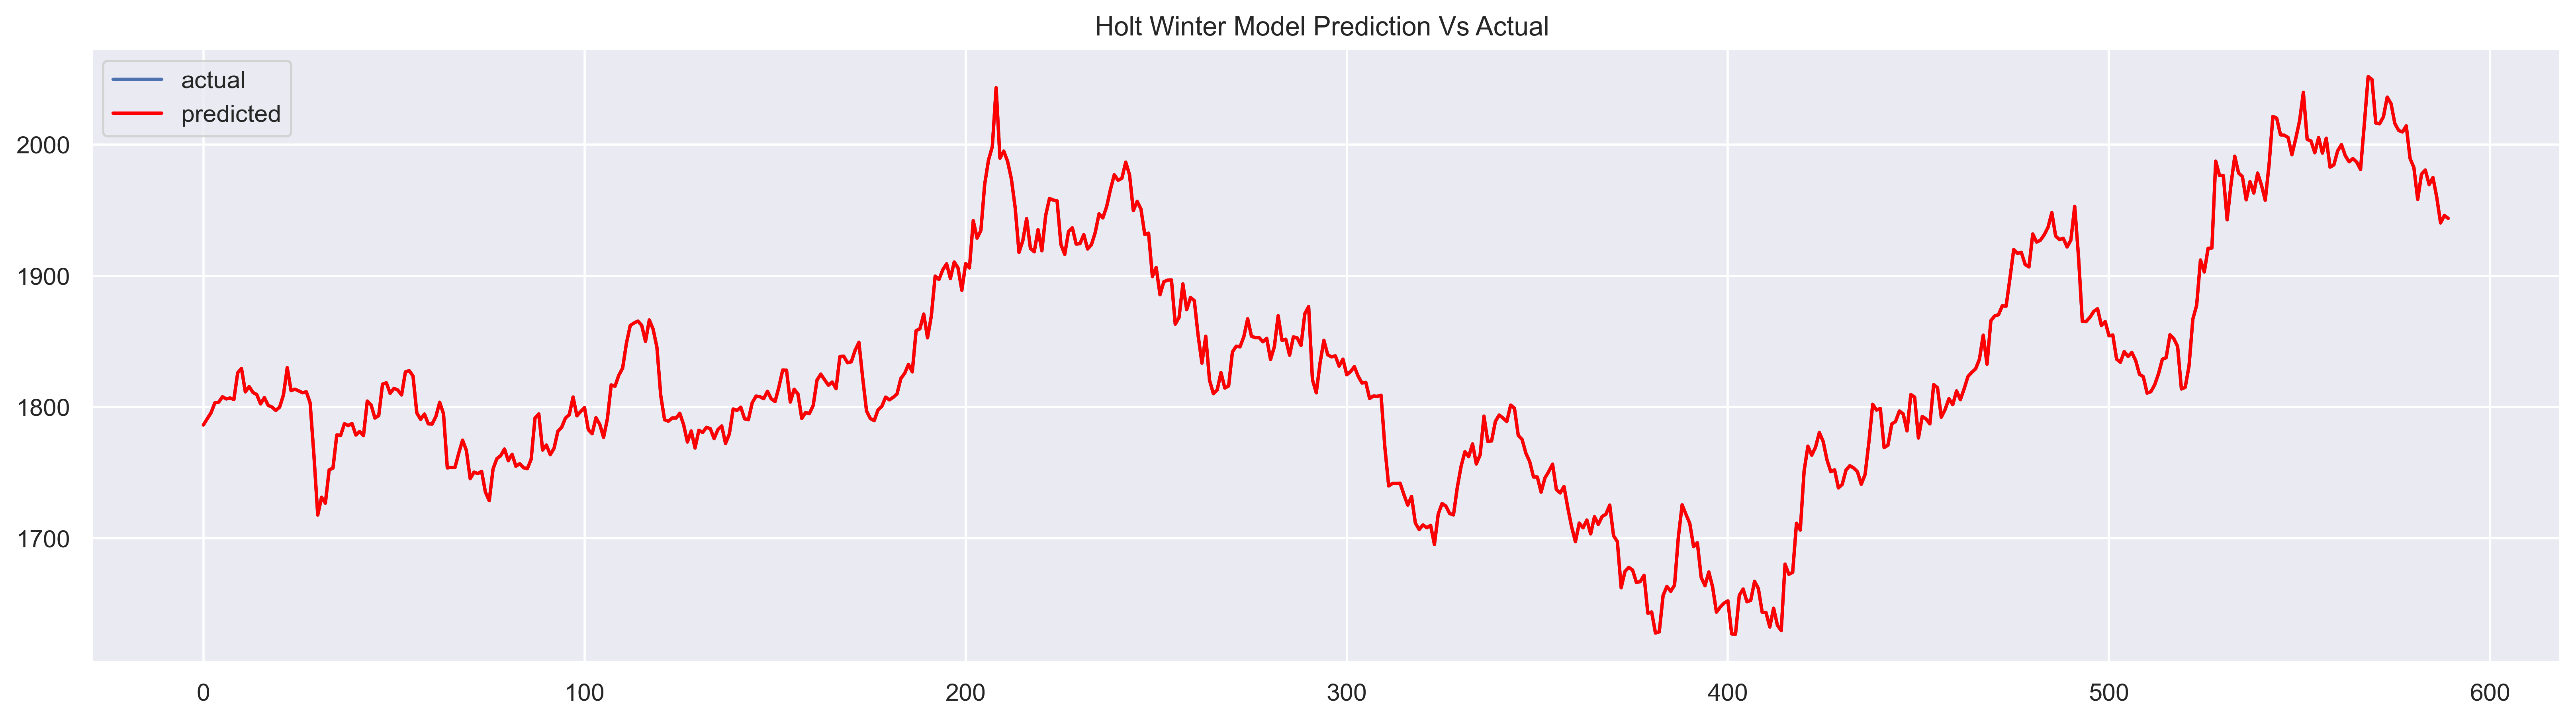

In [87]:
plt.figure(figsize=(20,5))
plt.plot(df['Close'].tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("Holt Winter Model Prediction Vs Actual ")
plt.legend(["actual", "predicted"])

plt.show()

### ARIMA TESTS

In [88]:
# define a function for LLR test
def LLR_test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)

    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    history = list(history)

    n = len(yhat) 
    if len(yhat) ==1:
        value = yhat[i] + history[-interval]
        history.append(value)
    else:
        value = yhat[0] + history[-interval]
        history.append(value)

        for i in range(1, n):
            value = yhat[i] + history[-interval]
            history.append(value)
    return np.array(history[-n:])

In [91]:
df

Open     High      Low    Close  Change(Pips)  Change(%)  \
Dates                                                                     
2021-07-04  1787.22  1787.73  1785.00  1786.39         -83.0      -0.05   
2021-07-05  1786.68  1794.00  1783.80  1791.15         447.0       0.25   
2021-07-06  1790.85  1814.89  1789.89  1795.68         483.0       0.27   
2021-07-07  1795.28  1809.50  1793.41  1803.22         794.0       0.44   
2021-07-08  1803.29  1818.00  1793.90  1803.75          46.0       0.03   
...             ...      ...      ...      ...           ...        ...   
2023-05-23  1969.94  1977.35  1954.40  1975.00         506.0       0.26   
2023-05-24  1975.19  1984.92  1956.40  1959.90       -1529.0      -0.78   
2023-05-25  1960.03  1964.62  1938.60  1940.37       -1966.0      -1.01   
2023-05-26  1948.96  1951.22  1938.85  1946.07        -289.0      -0.15   
2023-05-28  1946.60  1946.60  1941.10  1943.85        -275.0      -0.14   

                    w_n  delta_close  
Dates                                 
2021-07-04  1775.133619          NaN  
2021-07-05  1800.404400         4.76  
2021-07-06  1945.137348         4.53  
2021-07-07  1928.666944         7.54  
2021-07-08  1639.466685         0.53  
...                 ...          ...  
2023-05-23  1885.204677         5.42  
2023-05-24  1776.847945       -15.10  
2023-05-25  1986.257007       -19.53  
2023-05-26  1850.271305         5.70  
2023-05-28  1694.965743        -2.22  

[590 rows x 8 columns]

### Making the data Stationary

### another way to do the differencing without using the difference function above 

In [96]:
df["delta_close"] = df['Close'].diff(1)
# df.index = pd.DatetimeIndex(df.index).to_period('D')
# # df.drop(columns='Dates')

In [97]:
# df['delta_Adj_Close'].describe()
# df['delta_humidity']
df.head()


Open     High      Low    Close  Change(Pips)  Change(%)  \
Dates                                                                     
2021-07-04  1787.22  1787.73  1785.00  1786.39         -83.0      -0.05   
2021-07-05  1786.68  1794.00  1783.80  1791.15         447.0       0.25   
2021-07-06  1790.85  1814.89  1789.89  1795.68         483.0       0.27   
2021-07-07  1795.28  1809.50  1793.41  1803.22         794.0       0.44   
2021-07-08  1803.29  1818.00  1793.90  1803.75          46.0       0.03   

                    w_n  delta_close  
Dates                                 
2021-07-04  1775.133619          NaN  
2021-07-05  1800.404400         4.76  
2021-07-06  1945.137348         4.53  
2021-07-07  1928.666944         7.54  
2021-07-08  1639.466685         0.53

In [100]:
x = df['Close'].values

differenced = difference(x, 1)
# print(differenced)
# print(x)

### Checking for Stationarity now omitting the first row which is nan

In [101]:
test_statistic, p_value, used_lags, n_obs, critical_values, maximized_info_criterion = sts.adfuller(differenced)

for k,v in critical_values.items():
    print(k, v, test_statistic)
    if test_statistic < v:
        print("Data is stationary with %.2f%% of confidence" % (1-(float(k.rstrip('%')))/100))
    else:
        print("Data is not stationary with %.2f%% of confidence" % (1-(float(k.rstrip('%')))/100))

1% -3.4415393130846725 -18.542951889841493
Data is stationary with 0.99% of confidence
5% -2.866476335860869 -18.542951889841493
Data is stationary with 0.95% of confidence
10% -2.5693989358590006 -18.542951889841493
Data is stationary with 0.90% of confidence


### ARIMA(1,1,1)

In [106]:
model_ar_1_i_1_ma_1 = ARIMA(df['Close'], order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  590
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2428.385
Date:                Thu, 21 Mar 2024   AIC                           4862.769
Time:                        14:52:30   BIC                           4875.905
Sample:                    07-04-2021   HQIC                          4867.887
                         - 05-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4935      1.026      0.481      0.630      -1.517       2.504
ma.L1         -0.5177      1.006     -0.515      0.607      -2.490       1.454
sigma2       223.1672      9.576     23.306      0.000     204.399     241.935
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                74.89
Prob(Q):                              0.56   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Key facts to note in the results of ARIMA 
    1. Our goal is to maximize the Log Likelihood
    2. The middle parameter in the ARIMA(p,d,q) that is d-parameter helps to convert out data 
        stationary form by differencing technique
    3. The log likelihood test LLR TEST checks to see if a more complex model doesnt give a better prediction or not.

SUMMARY:
    Here what we’re looking for, is to maximize LL (Log Likelihood) and to Minimize AIC .

The fewer the coefficients a model has, the less data it requires to make the predictions and the more accurate they are, however, the more complex the model, the more data it will need and the less accurate it will be.

AIC: what it does is to evaluate the collection of models we are analyzing and estimate the quality of each model in relation to the remaining models. The most important, is that the criteria will penalize the models based on the number of parameters they have, that is, based on their complexity.

BIC: It is very similar to AIC except that the mathematics behind this criterion is based on Bayesian methods.

And you remeber the LLR_test?

Log likelihood test: To see if a more complex model doesn’t give better predictions or not. As a general rule we will prefer models with a higher probability of the logarithm of the likelihood.

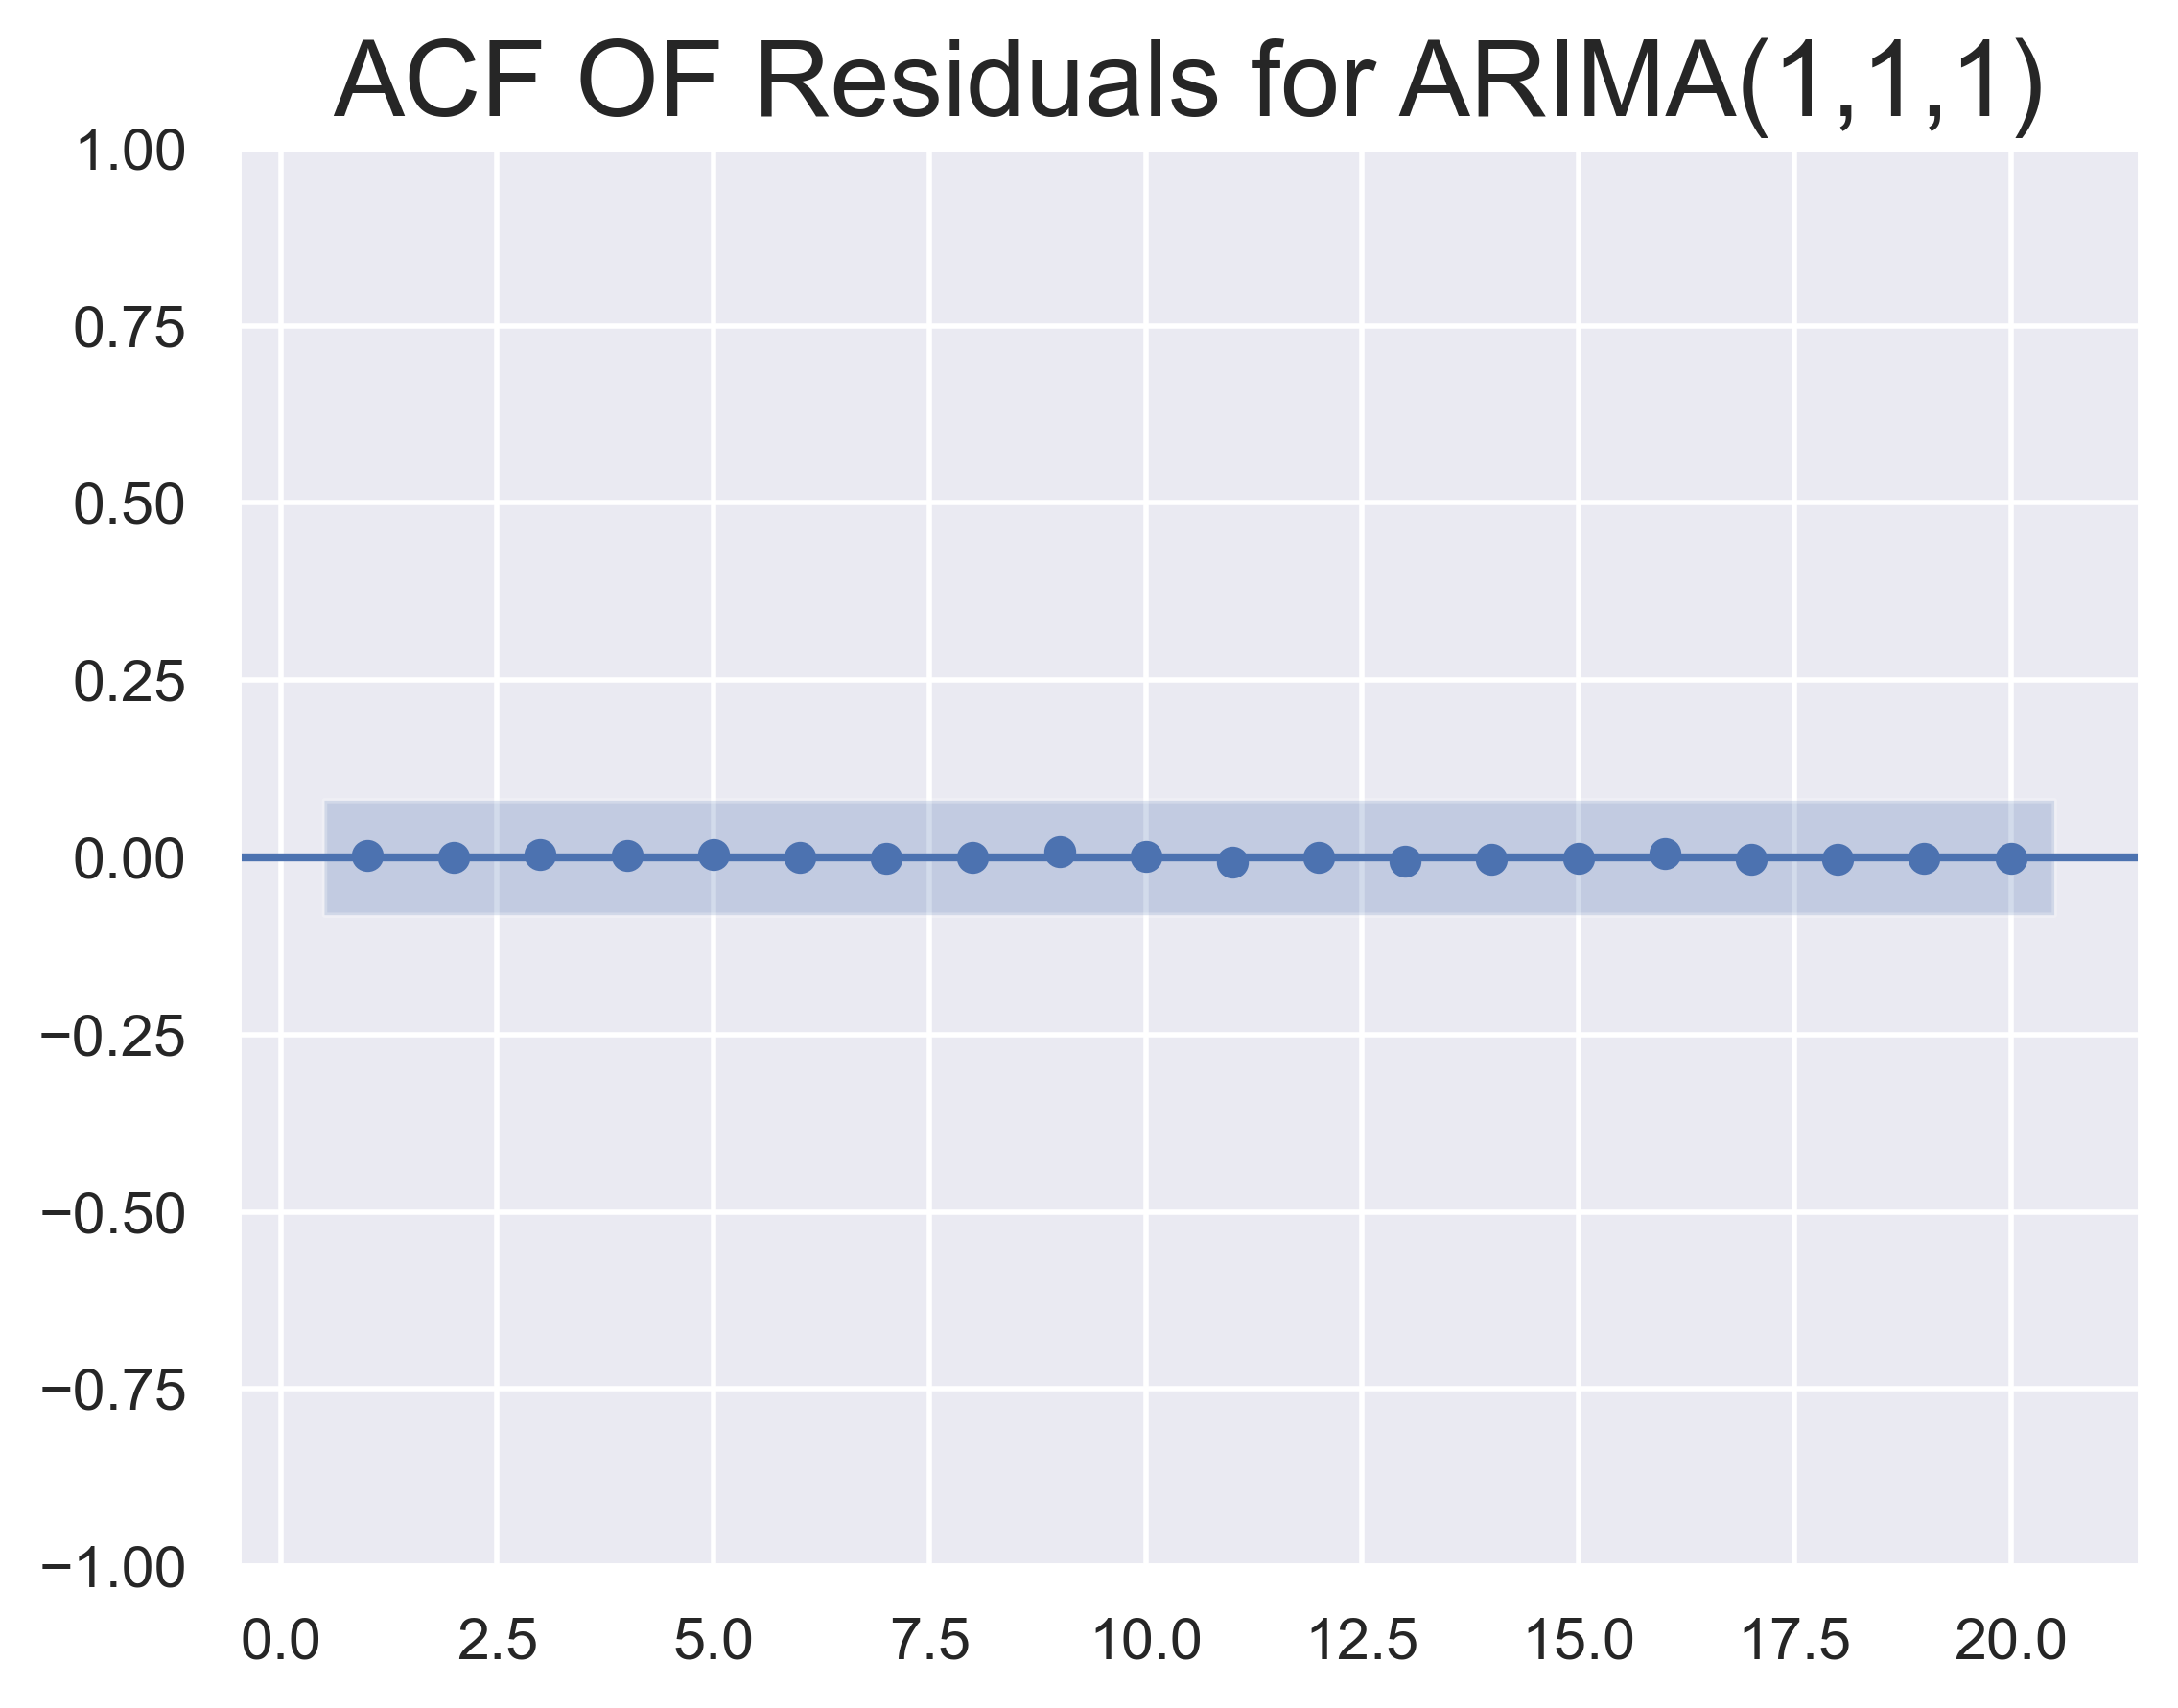

In [107]:
#PLOTTING ARIMA(1,1,1)
df['res_ar_1_1_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_1_1_ma_1, zero=False, lags=20)
plt.title("ACF OF Residuals for ARIMA(1,1,1)", size=20)
plt.show()

### USING HIGHER

In [108]:
model_ar_1_0_1 = ARIMA(df.Close, order=(1,0,1))
results_ar_1_0_1 = model_ar_1_0_1.fit()

model_ar_1_1_0 = ARIMA(df.Close, order=(1,1,0))
results_ar_1_1_0 = model_ar_1_1_0.fit()

model_ar_1_1_1 = ARIMA(df.Close, order=(2,1,2))
results_ar_1_1_1 = model_ar_1_1_1.fit()
# results_ar_1_1_1.summary()



### Model ARIMA(1,1,1) on Differenced values

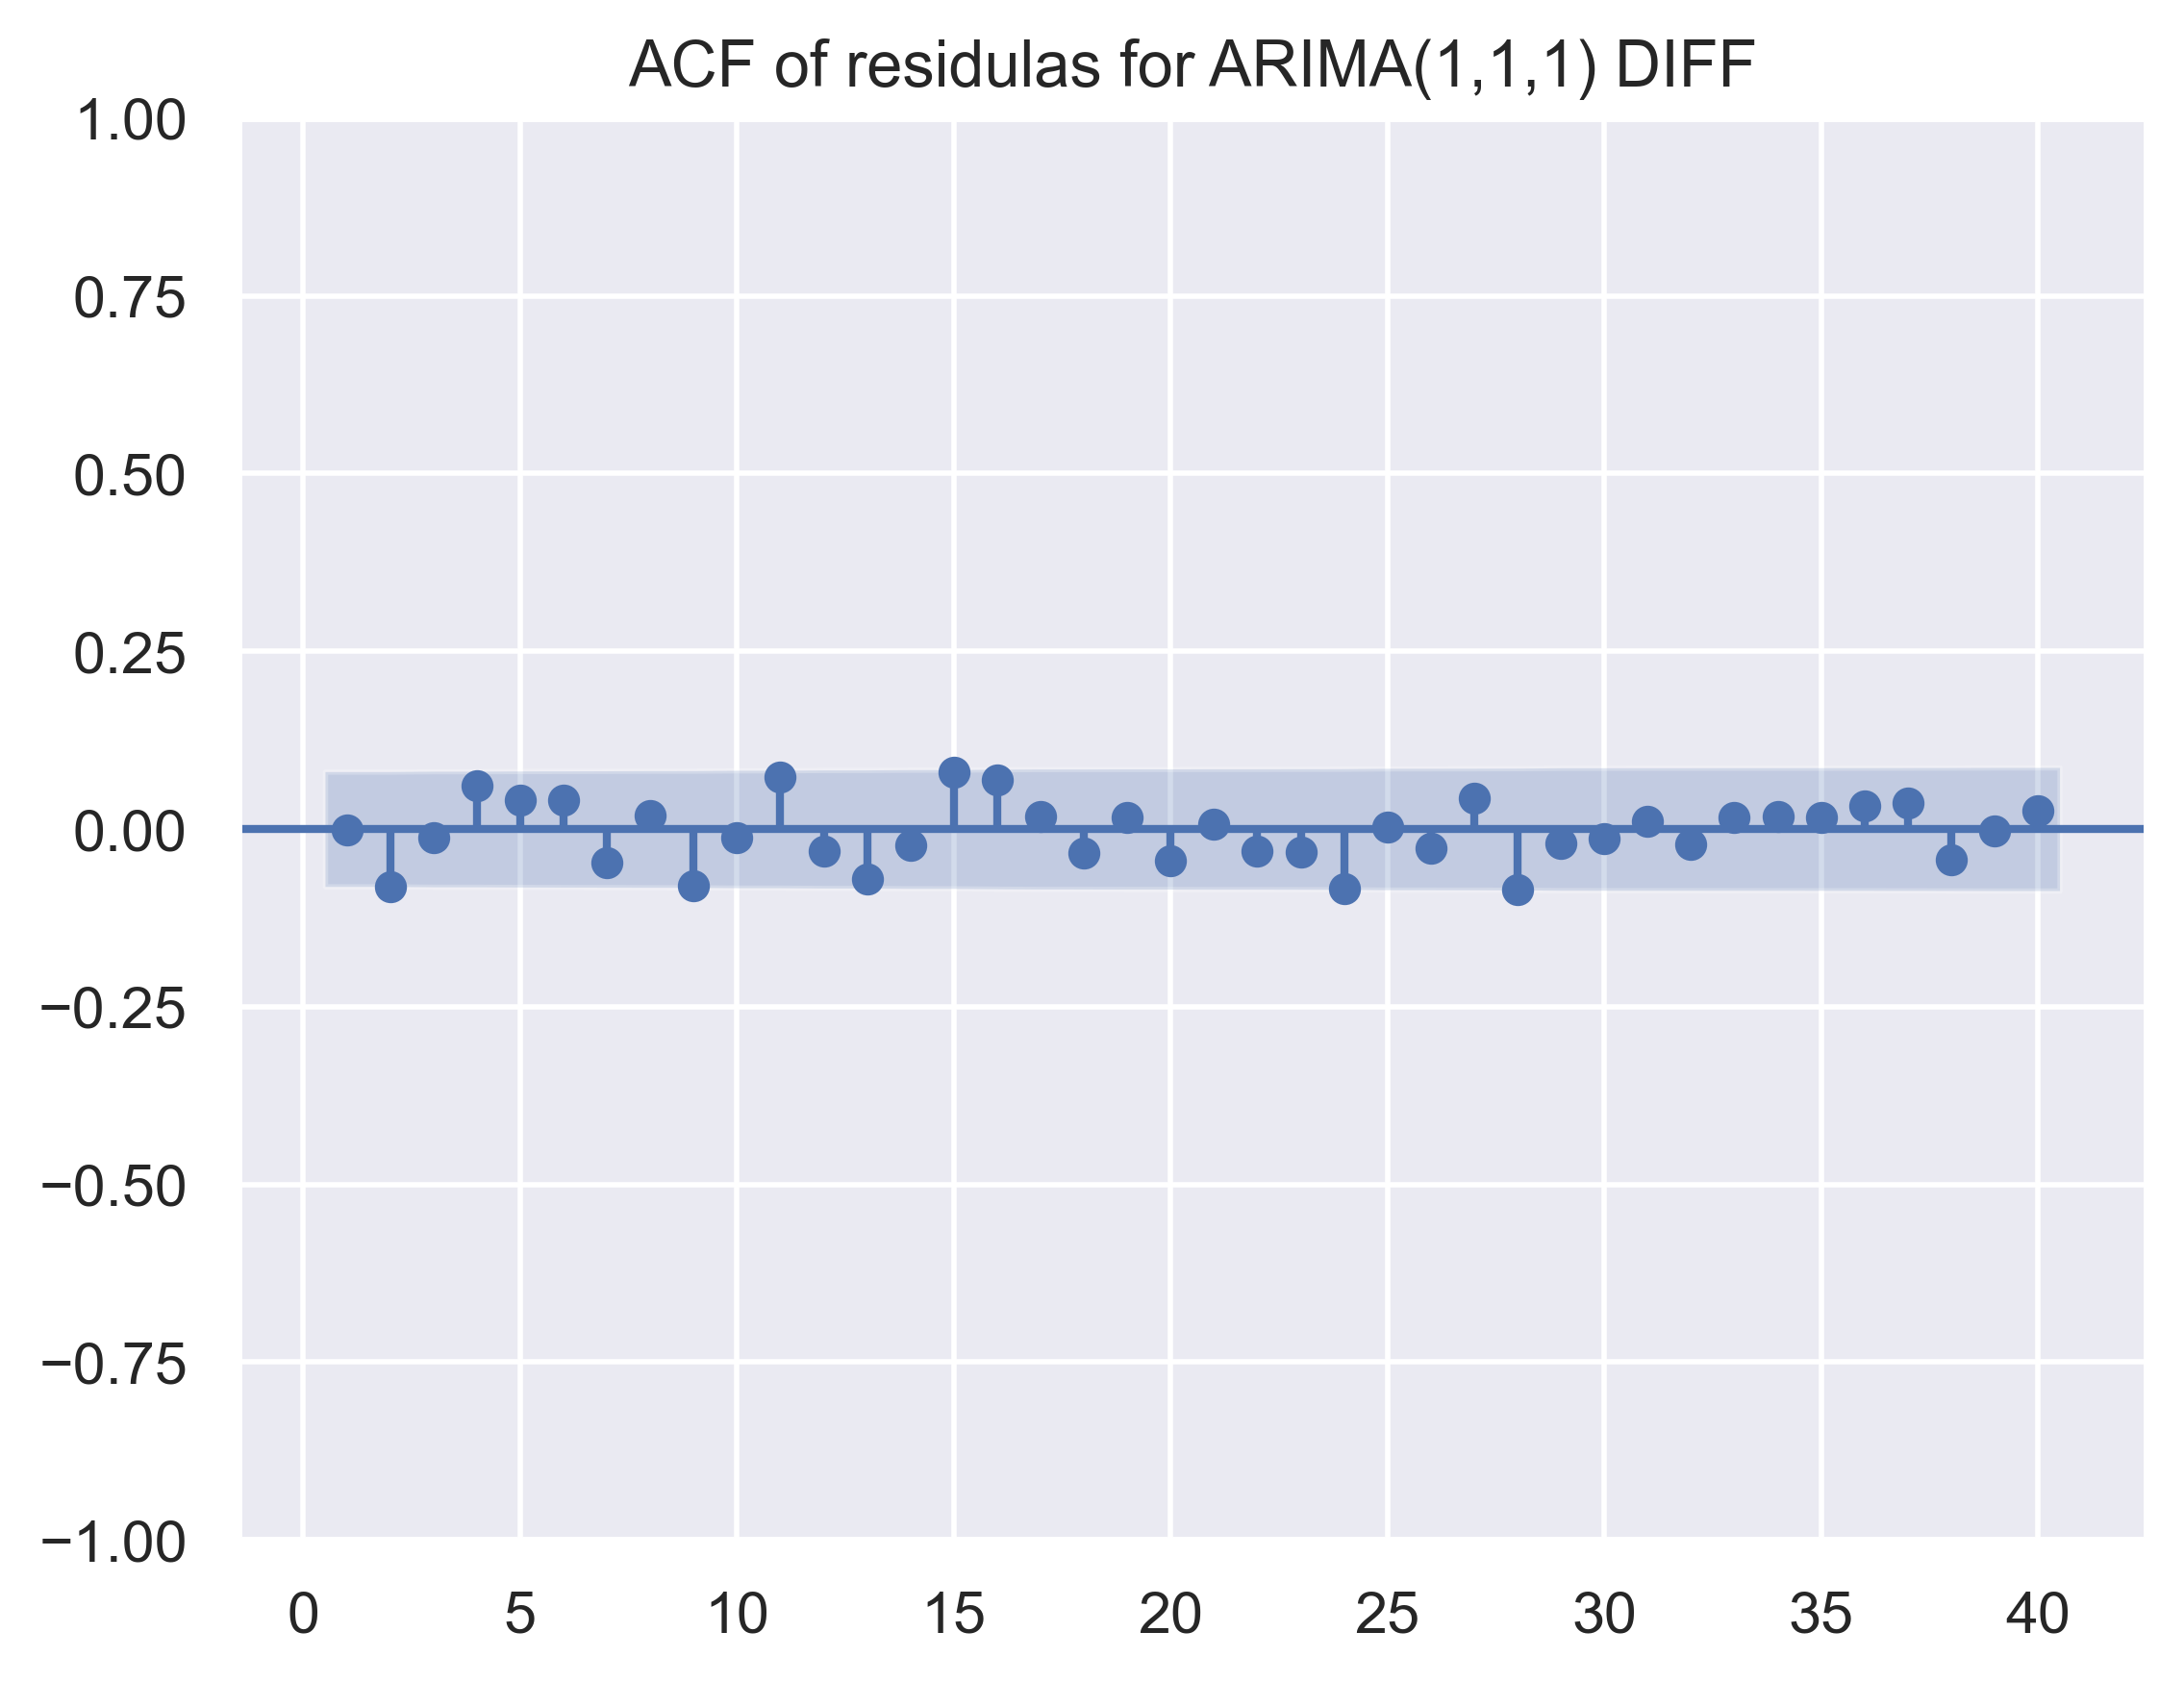


 LLR for Arima(1,1,,1) diff =  -2428.083177916045 	 AIC = 4862.16635583209

 LLR for Arima(2,1,2)-diff =  -2427.51469023386 	 AIC = 4865.02938046772


In [109]:
#difference arima
model_ar_1_1_1_diff = ARIMA(differenced, order=(1,1,1))
results_ar_1_1_1_diff = model_ar_1_1_1_diff.fit()

model_ar_2_1_2_diff = ARIMA(differenced, order=(2,1,2))
results_ar_2_1_2_diff = model_ar_2_1_2_diff.fit()


df['results_arima_1_1_1_diff'] = np.concatenate(([0], results_ar_1_1_1_diff.resid))
df.head()

sgt.plot_acf(df.results_arima_1_1_1_diff[1:], zero = False, lags=40)
plt.title("ACF of residulas for ARIMA(1,1,1) DIFF")
plt.show()

print("\n LLR for Arima(1,1,,1) diff = ", results_ar_1_1_1_diff.llf, "\t AIC =", results_ar_1_1_1_diff.aic)
print("\n LLR for Arima(2,1,2)-diff = ", results_ar_2_1_2_diff.llf, "\t AIC =", results_ar_2_1_2_diff.aic)

### From the above we see that Arima(2,1,2)-diff has lower AIC thatn Arima(1,1,1)-diff and also higher LLR

### 

In [249]:
# results_ar_1_1_1_diff.summary()
# results_ar_2_1_2_diff.summary()

### 

### STATIONARITY FACTS

When it comes to time series forecasting, the stationarity of a time series is one of the most important conditions that the majority of algorithms require. Briefly, time-series S_{t} is stationary (weak stationarity) if these conditions are met:

S_{t} has a constant mean.
S_{t} has a constant standard deviation.
There is no seasonality in S_{t}. If S_{t} has a repeating pattern within a year, then it has seasonality.

In [114]:
print("ARIMA(1,0,1): \t LL =", results_ar_1_0_1.llf, "\t AIC = ", results_ar_1_0_1.aic)
print("ARIMA(1,1,0): \t LL =", results_ar_1_1_0.llf, "\t AIC = ", results_ar_1_1_0.aic)
print("ARIMA(1,1,1): \t LL =", results_ar_1_1_1.llf, "\t AIC = ", results_ar_1_1_1.aic)

ARIMA(1,0,1): 	 LL = -2432.5823929724966 	 AIC =  4873.164785944993
ARIMA(1,1,0): 	 LL = -2428.6135078112893 	 AIC =  4861.227015622579
ARIMA(1,1,1): 	 LL = -2423.856382653335 	 AIC =  4857.71276530667


### It appears ARIMA(1,1,1)  performs better than ARIMA(1,0,1)DIFF WITH LOWER AIC AND HIGHER LL

In [111]:
#Checking with LRR Test
print("\nLLR Test p-value = " + str(LLR_test(model_ar_1_0_1, model_ar_1_1_0, DF=2)))


LLR Test p-value = 0.019


In [225]:
# diff_model = ARIMA(differenced, order=(1,1,1))
# result_1 = diff_model.fit()
# result_1

In [112]:
print("\nLLR Test p-value = " + str(LLR_test(model_ar_1_0_1, model_ar_1_1_0, DF=1)))


LLR Test p-value = 0.005


In [113]:
print("\nLLR Test p-value = " + str(LLR_test(model_ar_1_0_1, model_ar_1_1_1, DF=2)))


LLR Test p-value = 0.0


In [115]:

model1 = model_ar_1_0_1
model2 = model_ar_1_1_1
DF = 1
if LLR_test(model1, model2, DF =DF) < .05:
    print("LLR test p-value = " + str(LLR_test(model1, model2, DF =DF)))
    print("There is enough evidence that {model2} is statiscally significant than {model1}".format(model2="ARIMA(1,1,1)", model1="ARIMA(1,0,1)"))
else:
    print("LLR test p-value = " + str(LLR_test(model1, model2, DF =DF)))
    print("There isn't enough evidence that {model2} is statiscally significant than {model1}".format(model2="ARIMA(1,1,1)", model1="ARIMA(1,0,1)"))


LLR test p-value = 0.0
There is enough evidence that ARIMA(1,1,1) is statiscally significant than ARIMA(1,0,1)


### 

ALSO ARIMA(1,1,1) IS  STATISTICALLY SIGNIFICANT THAN ARIMA(1,1,0)

ARIMA 111 HAS THE LEAST AIC AND HIGHEST LOG LIKELIHOOD 

BUT THIS CHANGES USING THE DIFFERENCED VALUES

ARIMA 212 ALSO HAS THE LEAST AIC AND HIGHEST LLR OF THE THREE

### 

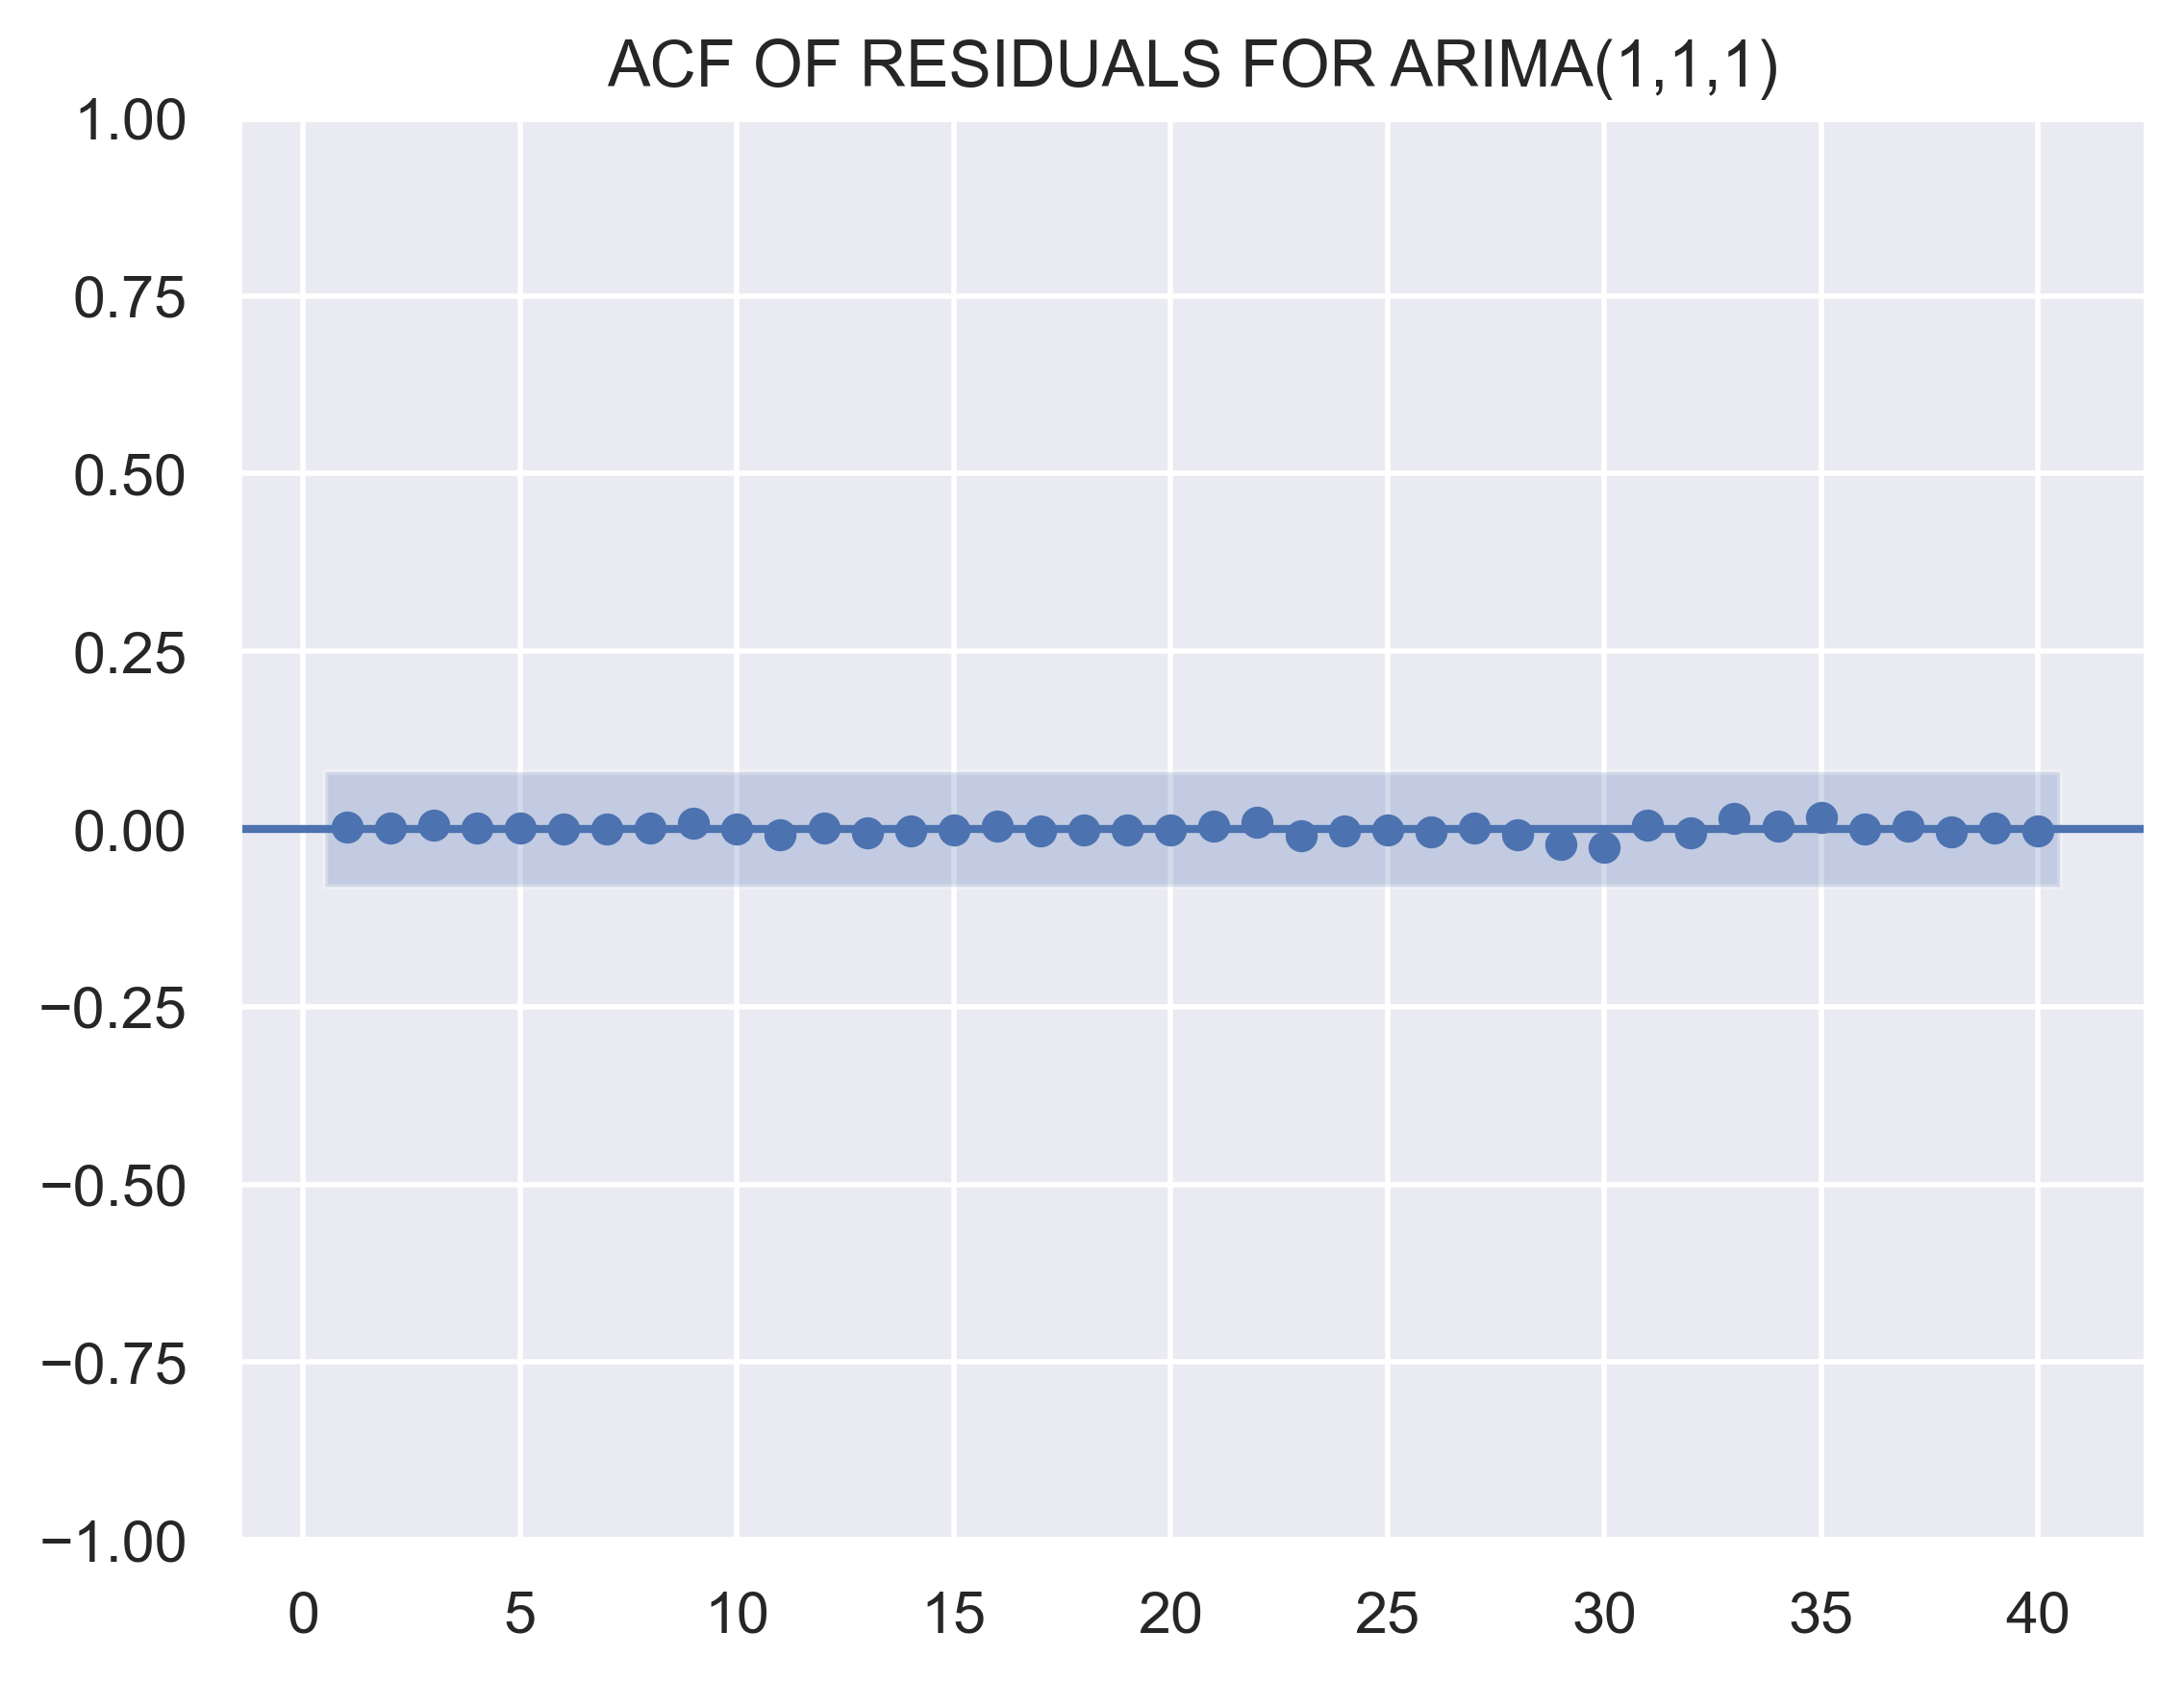

In [116]:
#PLOTTING THE RESIDUAL FOR ARIMA(1,1,1)

df['res_ar_1_1_1'] = results_ar_1_1_1.resid
sgt.plot_acf(df.res_ar_1_1_1, zero = False, lags = 40)
plt.title("ACF OF RESIDUALS FOR ARIMA(1,1,1)")
plt.show()

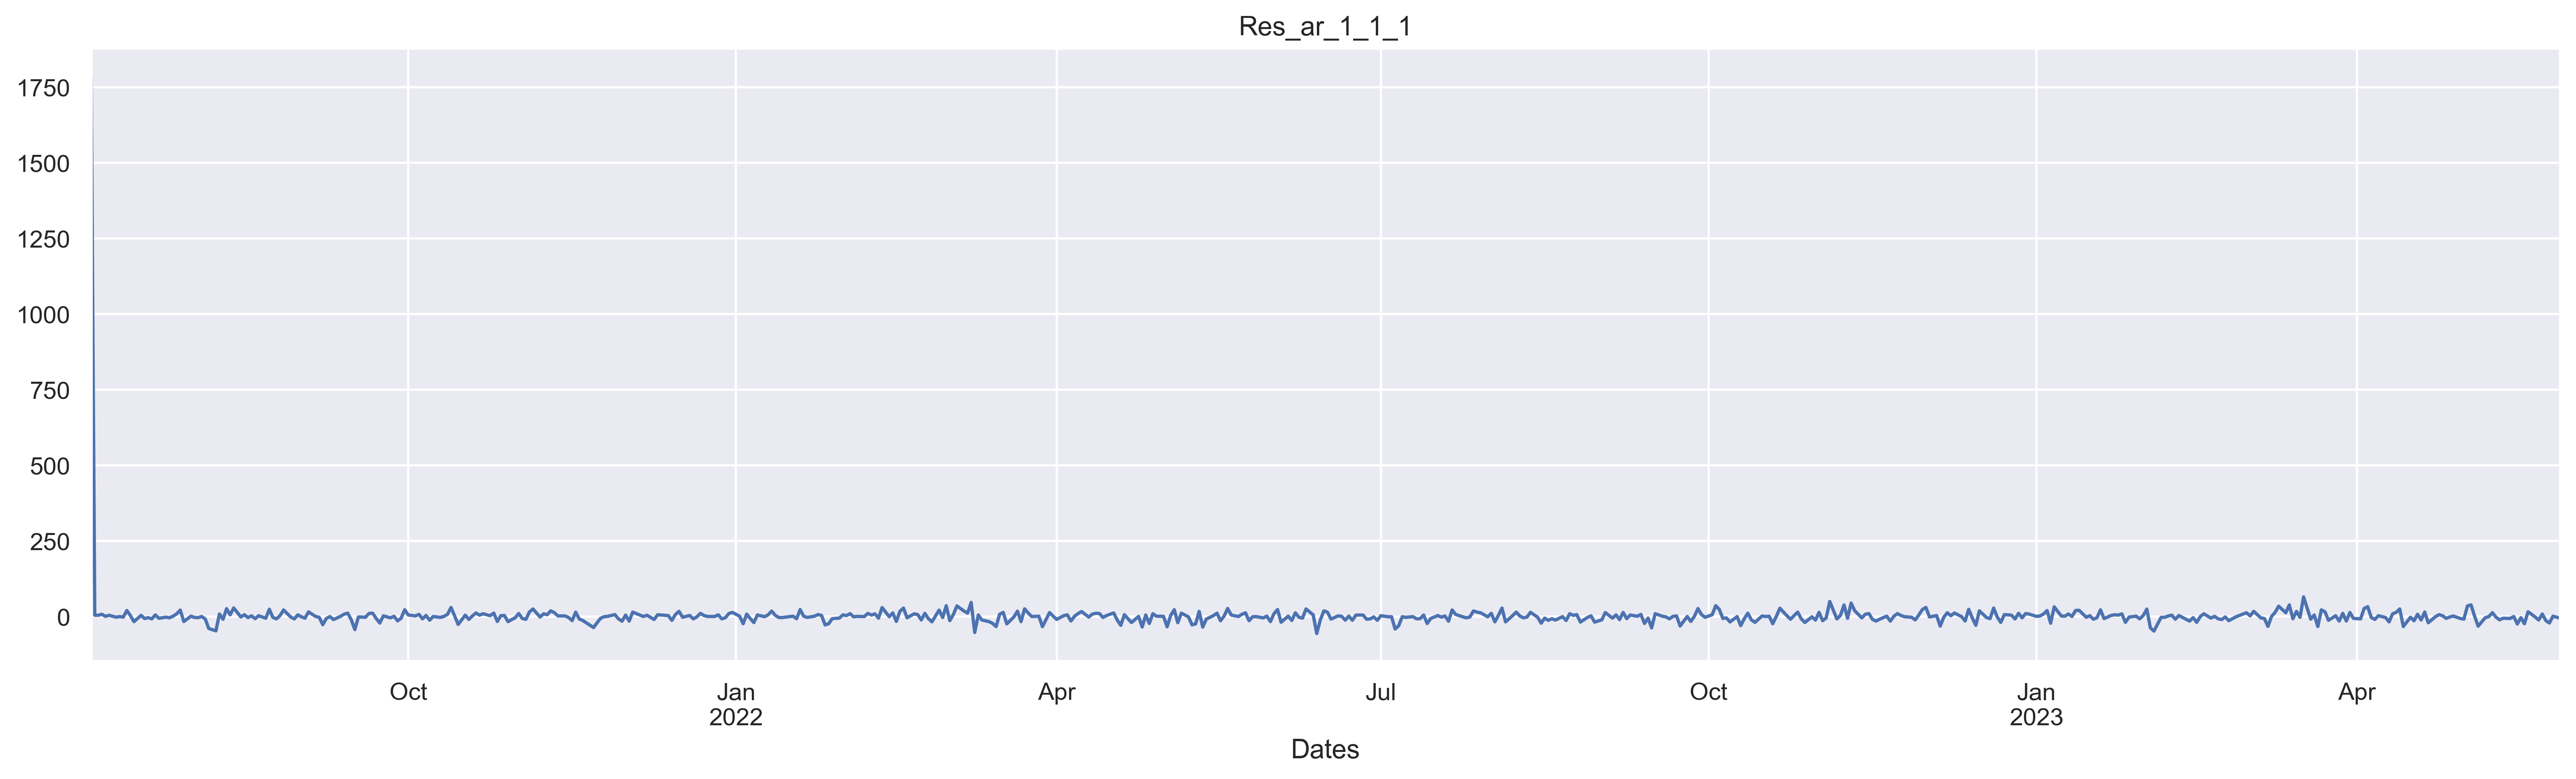

In [117]:
df.res_ar_1_1_1.plot(figsize=(20,5), title="Res_ar_1_1_1")
plt.show()
# df.res_ar_1_1_1

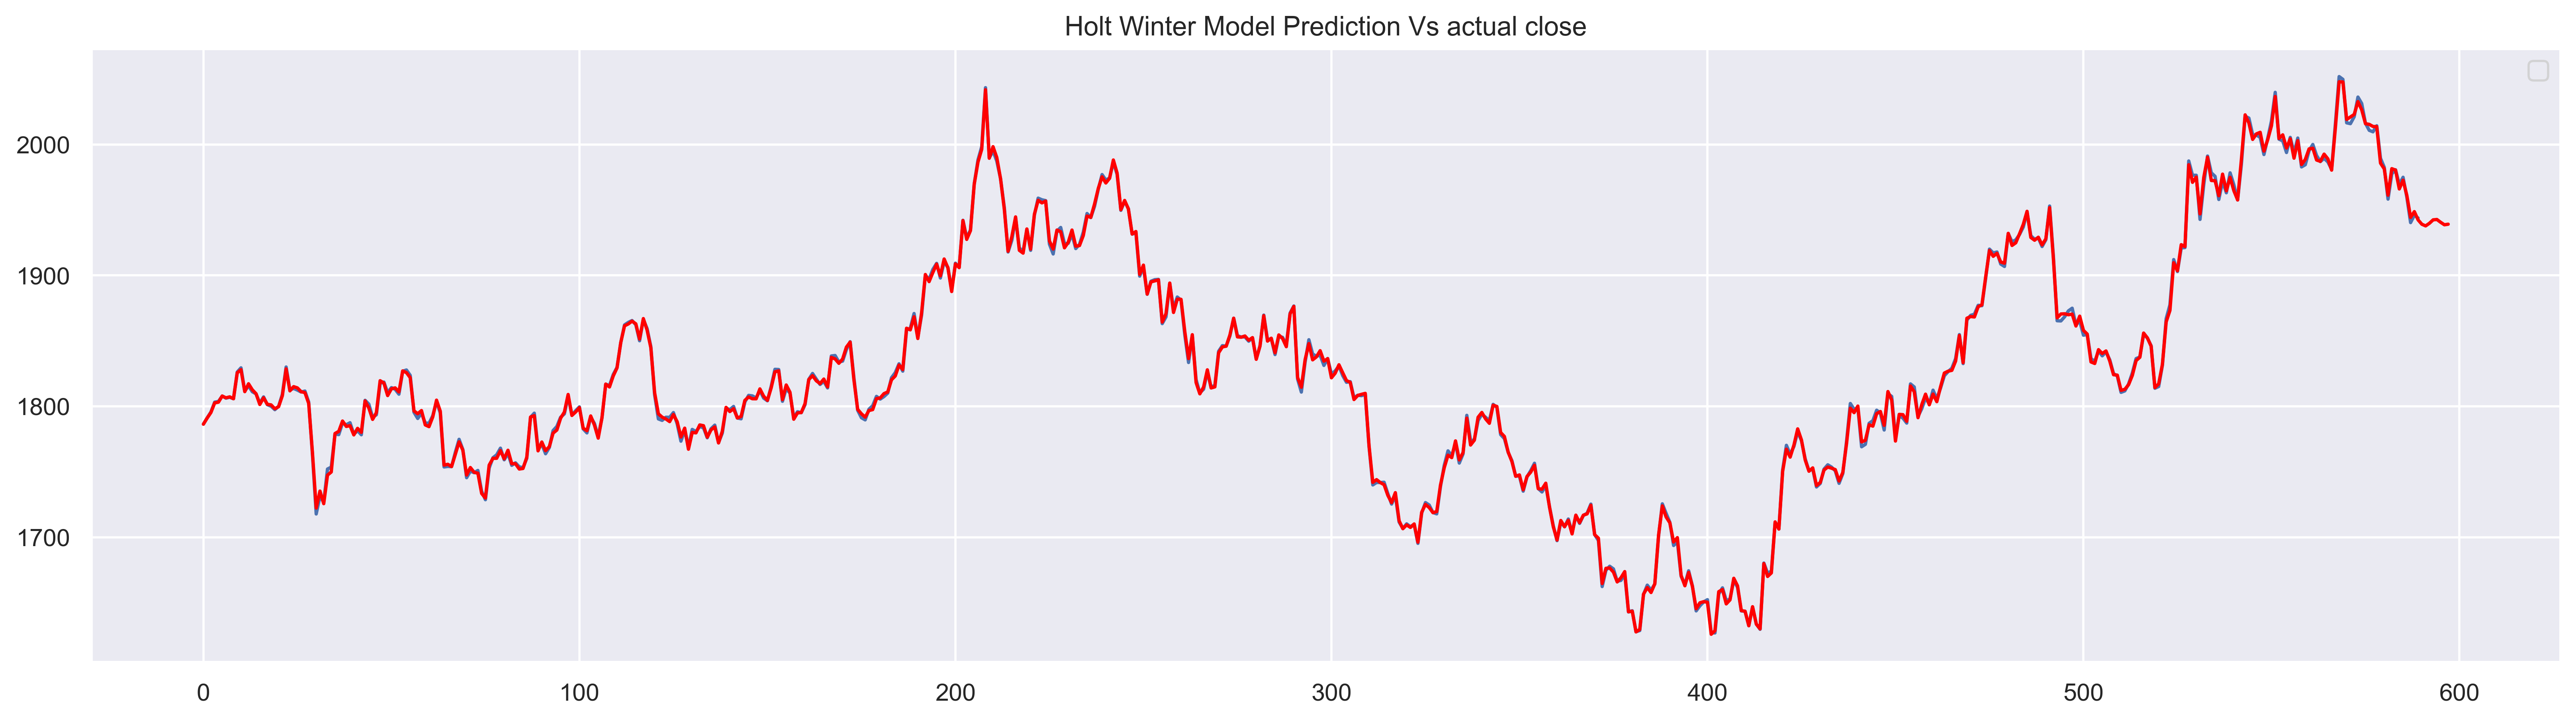

In [119]:
yhat = results_ar_1_1_1.predict(1, len(df)+8)

plt.figure(figsize=(20,5))
plt.plot(df.Close.tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("Holt Winter Model Prediction Vs actual close")
plt.legend("actual", "predicted")

plt.show()

### Using higher levels of integration

In [121]:
df['delta_close_2'] = df.Close.diff(2)

In [122]:
df['delta_close_2'].head()

Dates
2021-07-04      NaN
2021-07-05      NaN
2021-07-06     9.29
2021-07-07    12.07
2021-07-08     8.07
Freq: D, Name: delta_close_2, dtype: float64

In [123]:
#check for stationarity
test_statistic, p_value, used_lags, n_obs, critical_values, maximized_info_criterion = sts.adfuller(df.delta_close_2[2:])

for k,v in critical_values.items():
    print(k, v, test_statistic)
    if test_statistic < v:
        print("Data is stationary with %.2f%% of confidence" % (1-(float(k.rstrip('%')))/100))
    else:
        print("Data is not stationary with %.2f%% of confidence" % (1-(float(k.rstrip('%')))/100))

1% -3.4418139386911513 -5.363764385134432
Data is stationary with 0.99% of confidence
5% -2.866597262008035 -5.363764385134432
Data is stationary with 0.95% of confidence
10% -2.5694633721967906 -5.363764385134432
Data is stationary with 0.90% of confidence


In [127]:
#fitting the model again

model_ar_1_2_1 = ARIMA(df.Close, order=(1,2,1))
results_ar_1_2_1 = model_ar_1_2_1.fit()
results_ar_1_2_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  590
Model:                 ARIMA(1, 2, 1)   Log Likelihood               -2428.093
Date:                Thu, 21 Mar 2024   AIC                           4862.185
Time:                        14:57:53   BIC                           4875.316
Sample:                    07-04-2021   HQIC                          4867.301
                         - 05-28-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0027      0.038      0.072      0.943      -0.072       0.077
ma.L1         -0.9997      0.077    -12.982      0.000      -1.151      -0.849
sigma2       223.7021     19.322     11.577      0.000     185.831     261.573
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                71.62
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.77   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

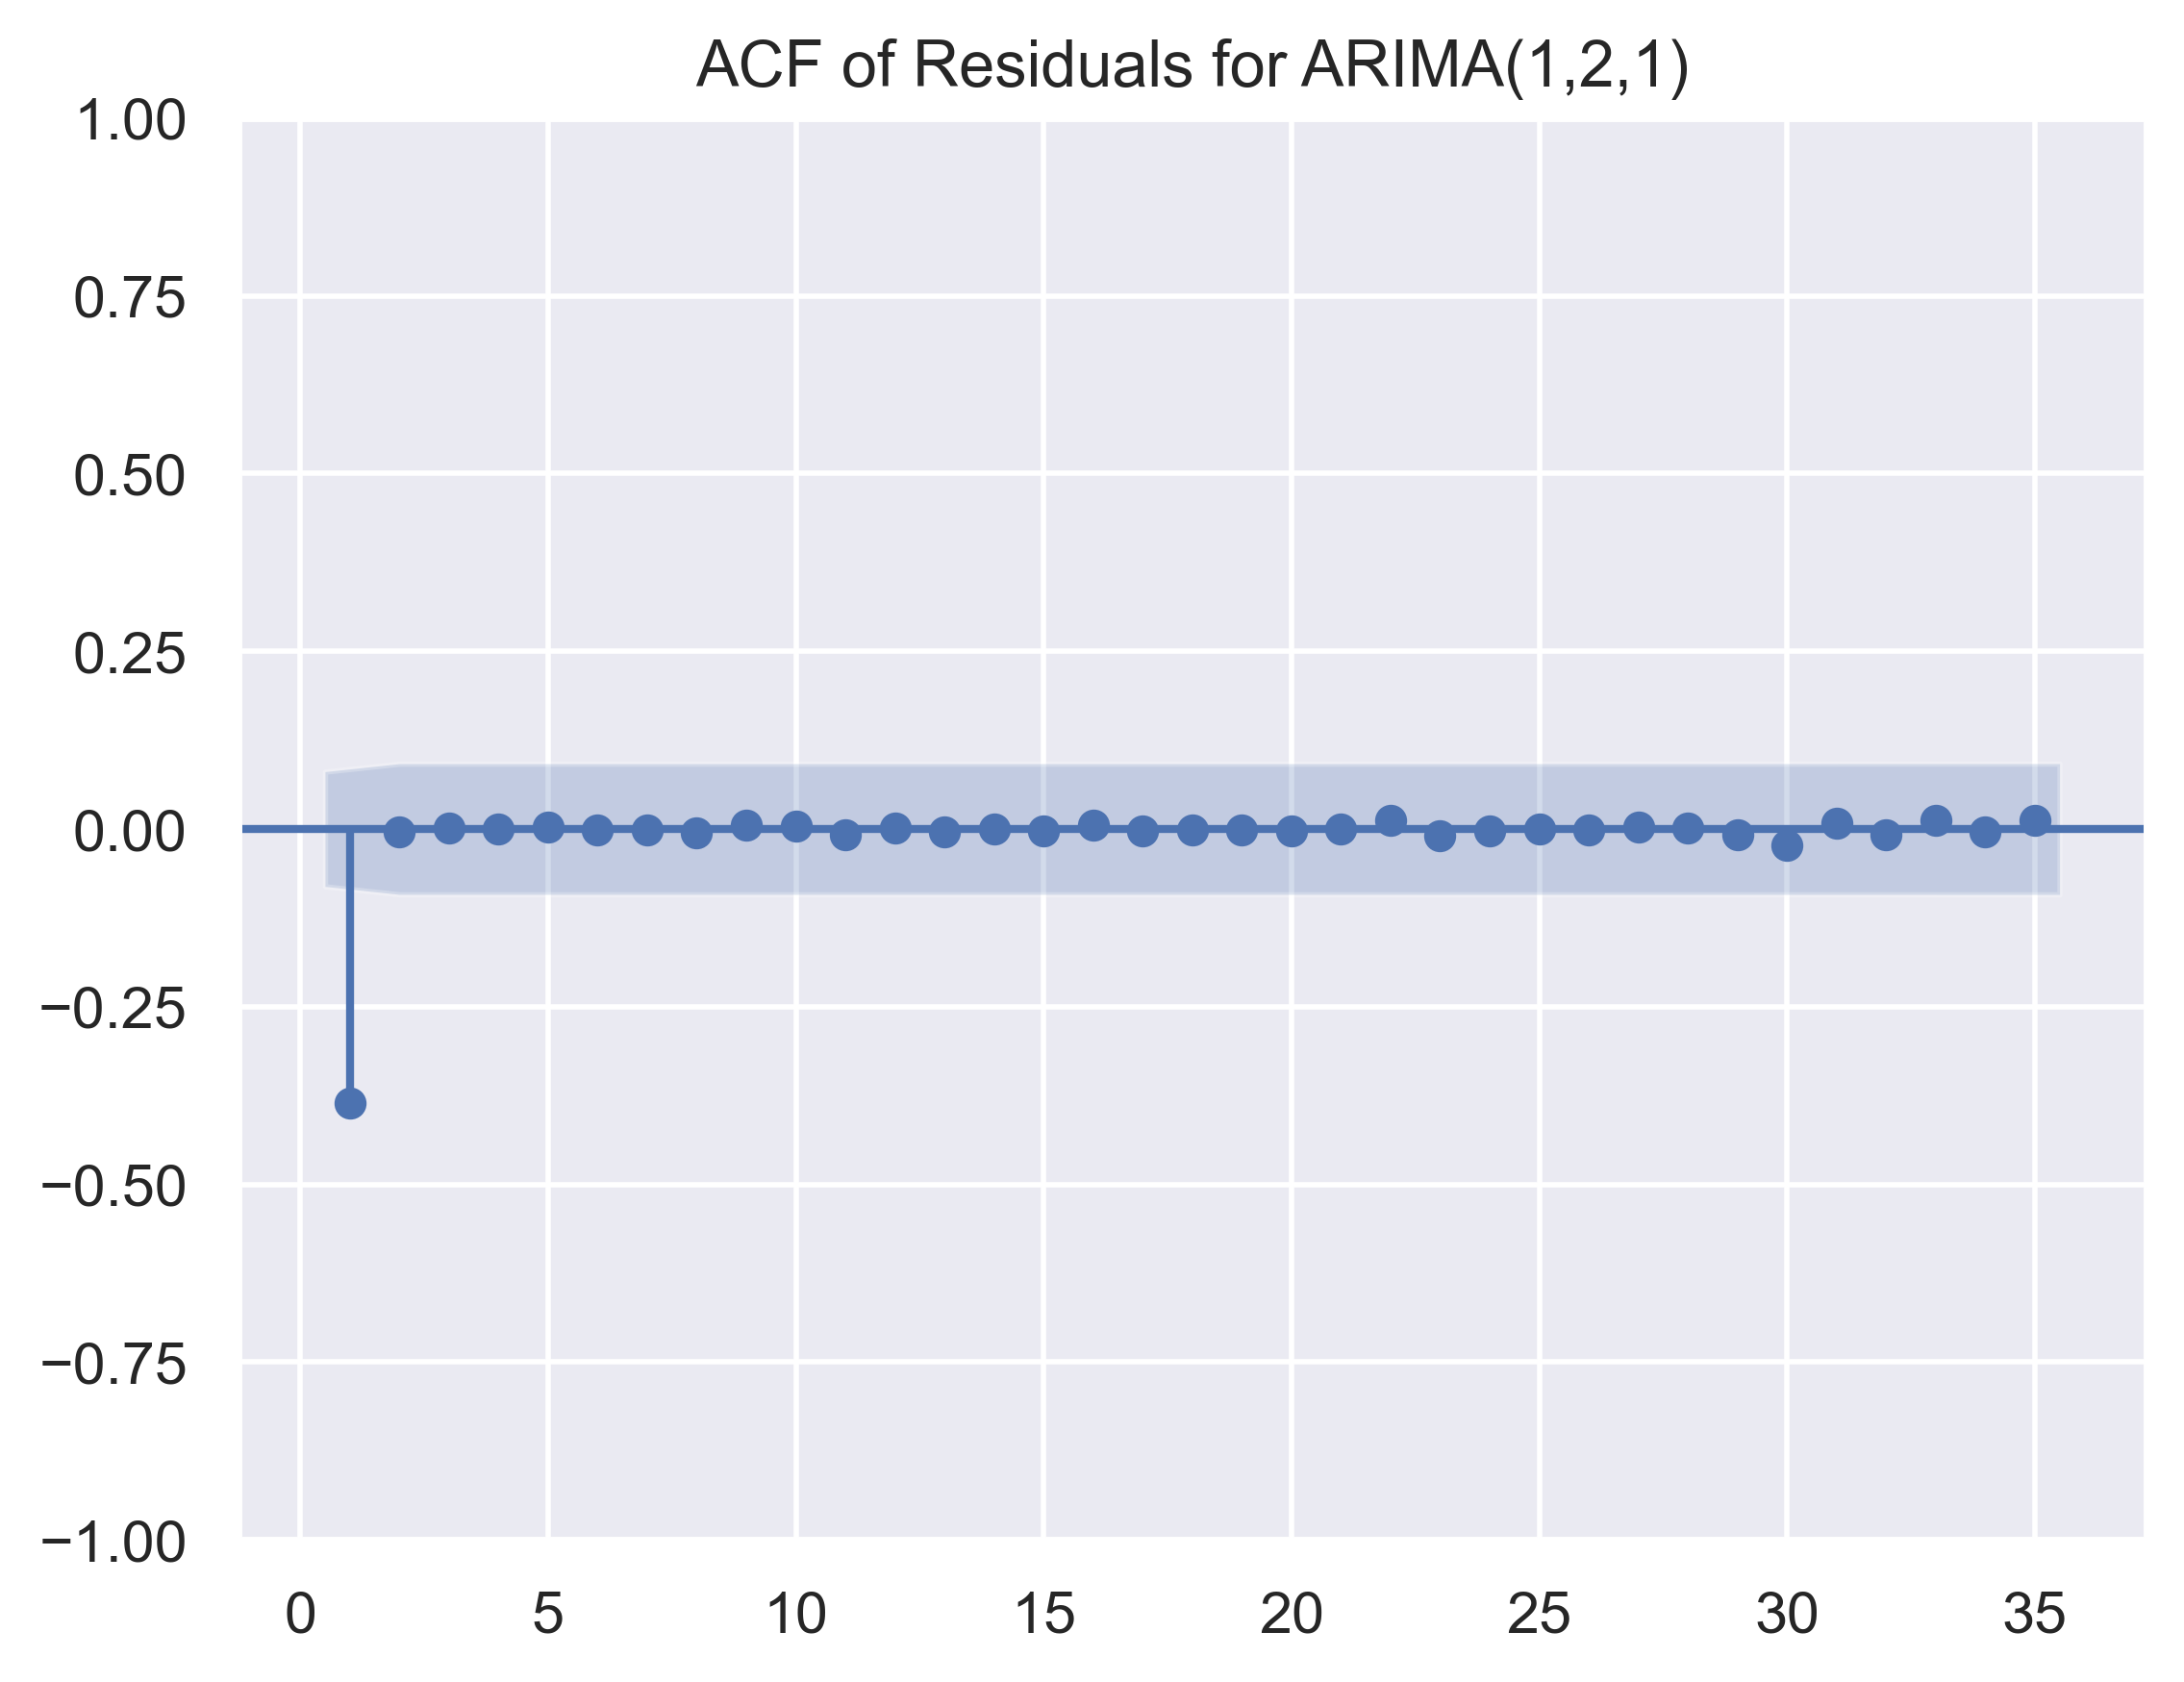

In [128]:
df['res_1_2_1'] = results_ar_1_2_1.resid.iloc[:]
sgt.plot_acf(df.res_1_2_1, zero = False, lags=35)
plt.title("ACF of Residuals for ARIMA(1,2,1)")
plt.show()

### PREDICTING ON WEEKLY BASIS

In [130]:
forecast_diff_arima_1_1_1 = results_ar_1_1_1_diff.forecast(7)[0:7]
forecast_diff_arima_2_1_2 = results_ar_2_1_2_diff.forecast(7)[0:7]


#return predictions to original scale
predictions_1_1_1_diff = inverse_difference(df.Close, forecast_diff_arima_1_1_1, interval=1)
predictions_2_1_2_diff = inverse_difference(df.Close, forecast_diff_arima_2_1_2, interval=1)

#using an evaluation metric RMSE from sklearn
from sklearn.metrics import mean_squared_error
from math import sqrt



print("\n RSME for Arima_1_1_1_diff = ", sqrt(mean_squared_error(df_test['Close'][0:7].values, predictions_1_1_1_diff)))

print("\n RSME for ARIMA_2_1_2_diff = ", sqrt(mean_squared_error(df_test['Close'][0:7].values, predictions_2_1_2_diff)))


print("\n Predicted values for Arima_1_1_1_diff: ")
np.vstack(predictions_1_1_1_diff)


 RSME for Arima_1_1_1_diff =  16.747222140993948

 RSME for ARIMA_2_1_2_diff =  16.738294826783562

 Predicted values for Arima_1_1_1_diff: 


array([[1944.11059646],
       [1944.37793326],
       [1944.64528838],
       [1944.91264355],
       [1945.17999872],
       [1945.44735388],
       [1945.71470905]])

### Our root mean squared error returned 5.55 for ARIMA(1,1,1) DIFF. 

TESTING OUT ON ARIMA 111

In [131]:
forecast_arima_1_1_1 = results_ar_1_1_1.forecast(7)[0:7]

sqrt(mean_squared_error(df_test['Close'][0:7].values, forecast_arima_1_1_1))
# forecast_arima_1_1_1


20.91301566032571

### Comparing the two RMSE values, we can agree that ARIMA(1,1,1) performs Worse than ARIMA(1,1,1)_DIFF

GENERALLY ARIMA_111-DIFF PERFORMS BEST ON TEST

### 

### SARIMAX

    SARIMA is an alternative version of arima that extends the funcitonalities obtainable by adding a seasonal componenent. Its addss three parameteres: 
        1. P - Seasoanl autoregressive order
        2. D - Seasonal difference order
        3. Q - Seasonal moving average order
        4. m - number of time steps for a single seasonal period

In [132]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [133]:
#fitting the model

model_sarimax_1_1_1 = SARIMAX(df.Close, order=(1,1,1), seasonal_order=(1,0,1,7))
results_sarimax_1_1_1 = model_sarimax_1_1_1.fit()


model_sarimax_1_1_1_diff = SARIMAX(differenced, order=(1,1,1), seasonal_order=(1,0,1,7))
results_sarimax_1_1_1_diff = model_sarimax_1_1_1_diff.fit()

print("\n LLR for Sarimax_model_1_1_1 = ", results_sarimax_1_1_1.llf, "\t AIC = ", results_sarimax_1_1_1.aic)
print("\n LLR for Sarimax_model_1_1_1_diff = ", results_sarimax_1_1_1_diff.llf, "\t AIC = ", results_sarimax_1_1_1_diff.aic)
# results_sarimax.summary()


 LLR for Sarimax_model_1_1_1 =  -2427.195949779418 	 AIC =  4864.391899558836

 LLR for Sarimax_model_1_1_1_diff =  -2426.9578501874976 	 AIC =  4863.915700374995


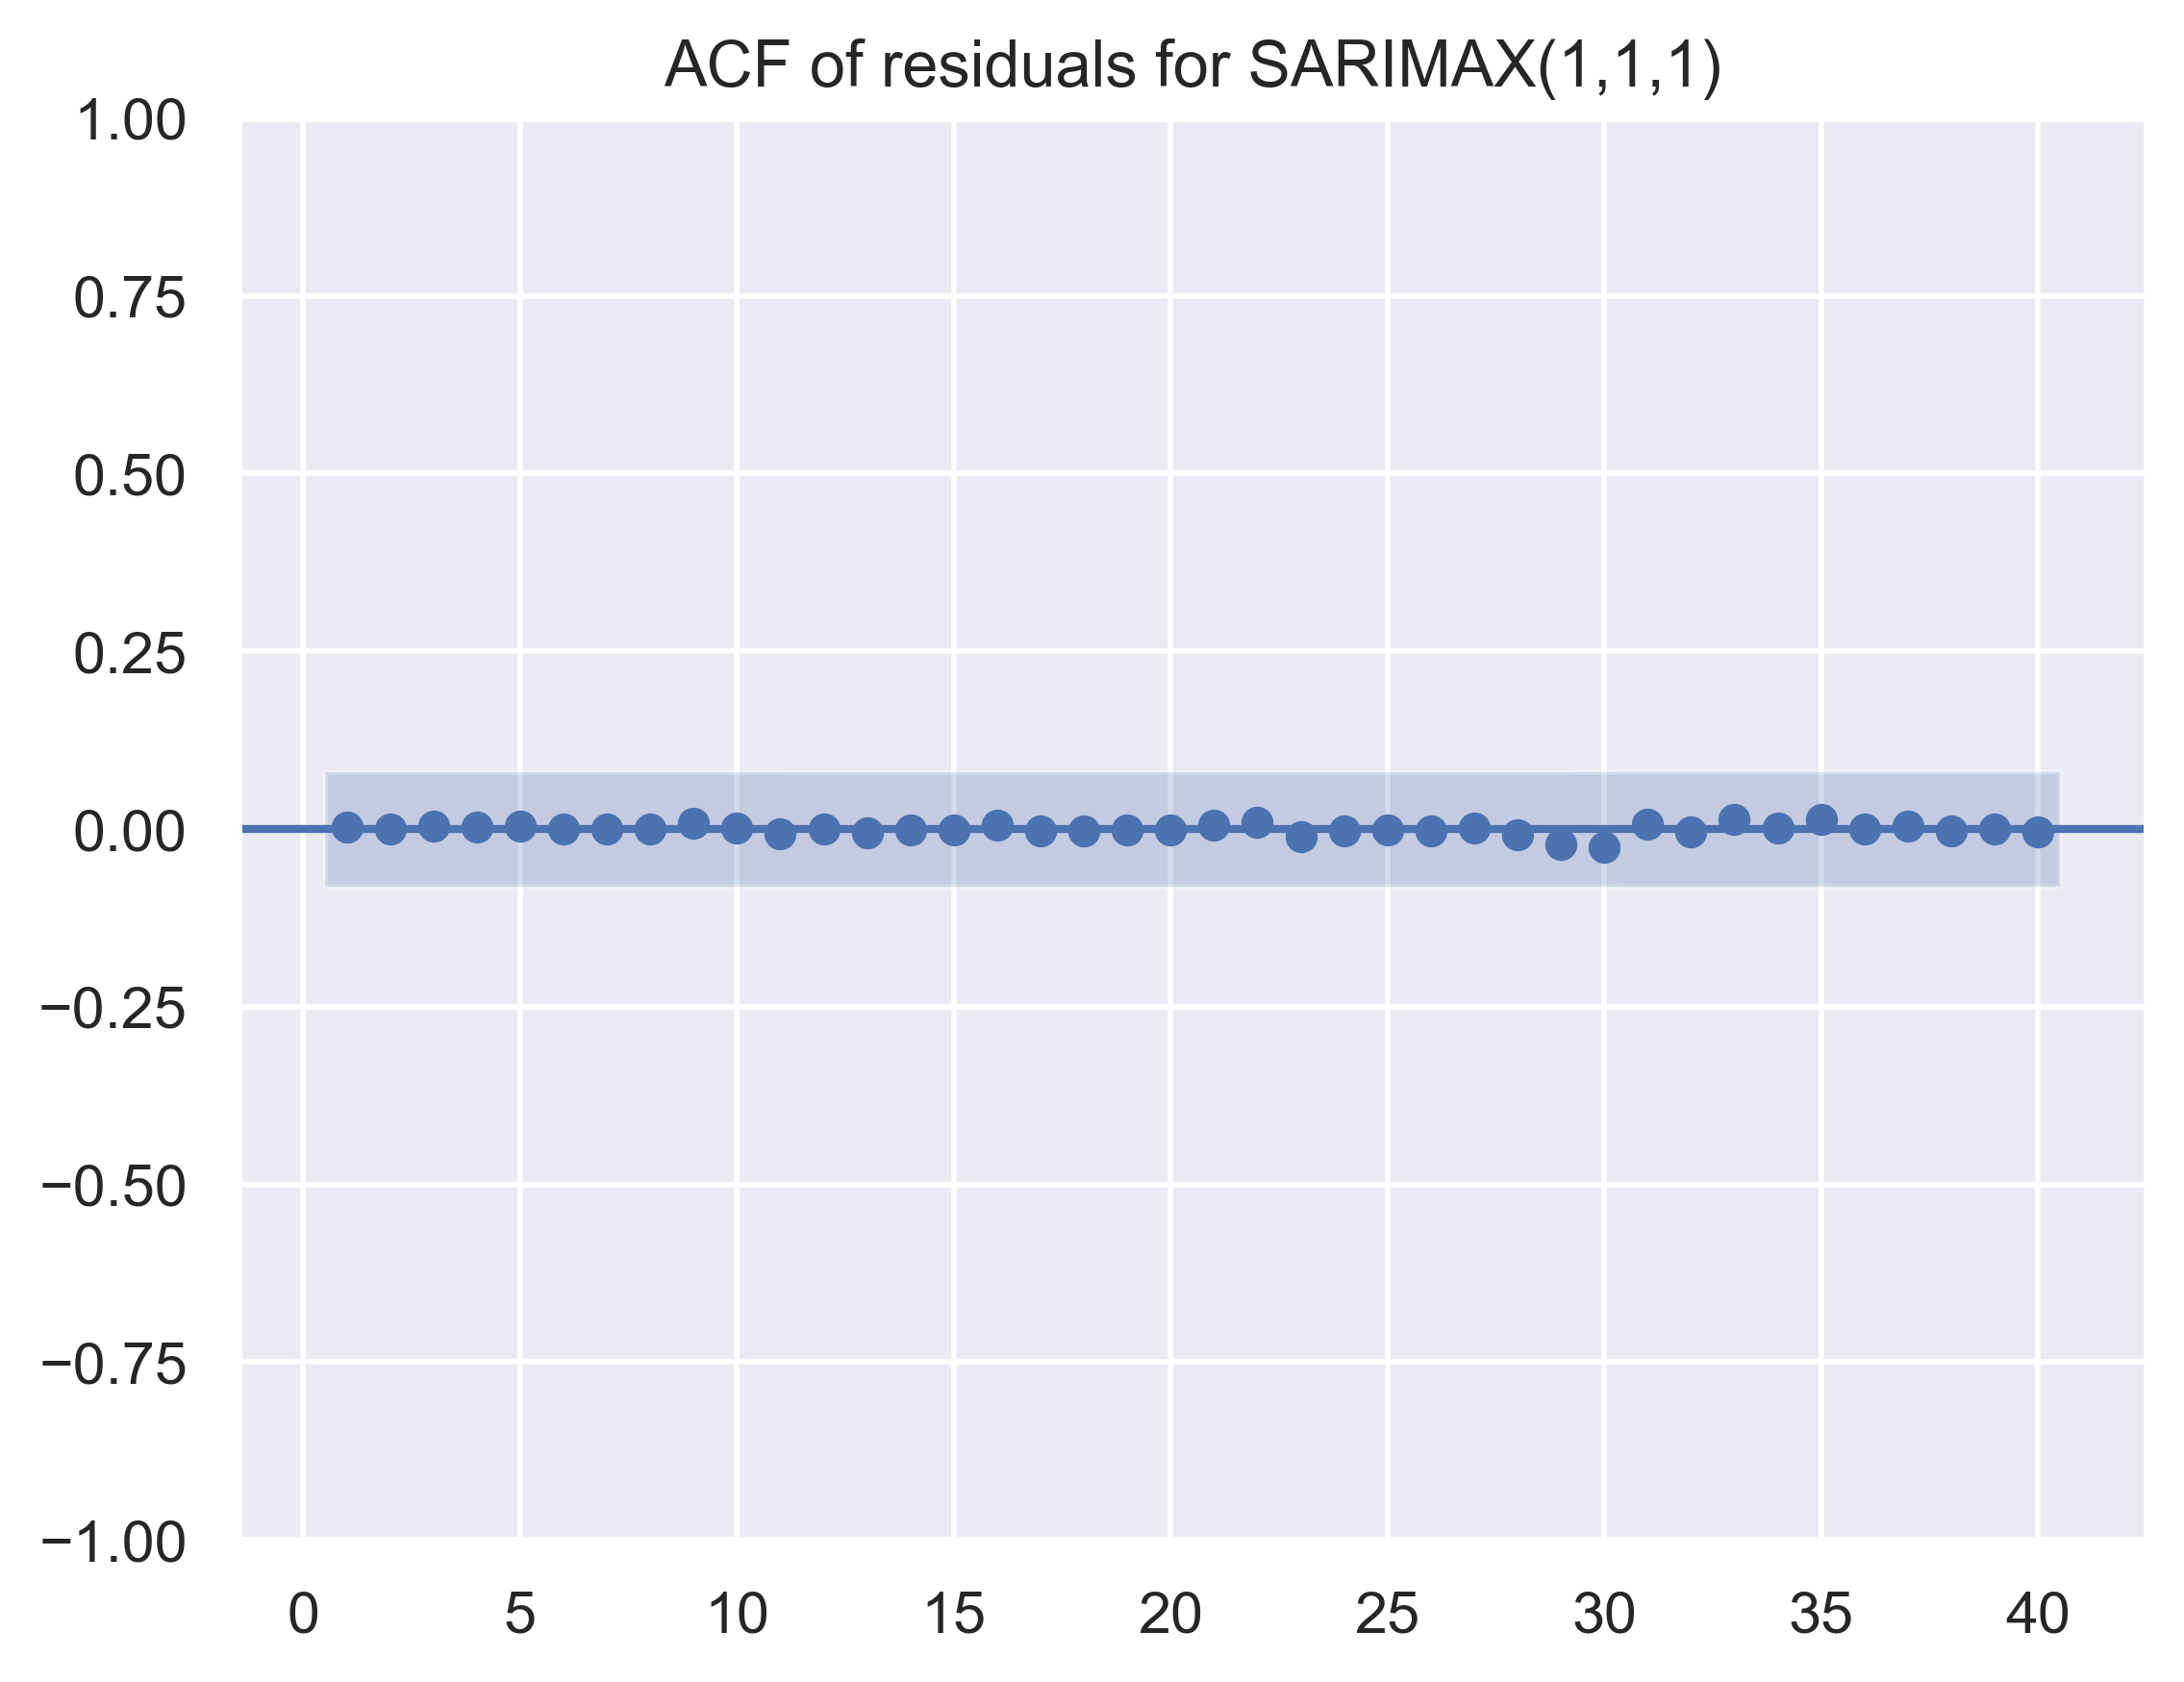

In [138]:
df['results_sarimax'] = results_sarimax_1_1_1.resid.iloc[:]
sgt.plot_acf(df.results_sarimax, zero = False, lags =40)
plt.title("ACF of residuals for SARIMAX(1,1,1)")
plt.show()

### TRYING P,Q VALUES OF 2

In [140]:
model_sarimax_2_1_2 = SARIMAX(df.Close, order=(2,1,2), seasonal_order=(1,0,1,7))
results_sarimax_2_1_2 = model_sarimax_2_1_2.fit()


model_sarimax_2_1_2_diff = SARIMAX(df.Close, order=(2,1,2), seasonal_order=(1,0,1,7))
results_sarimax_2_1_2_diff = model_sarimax_2_1_2_diff.fit()

model_sarimax_4_1_4 = SARIMAX(df.Close, order=(4,1,4), seasonal_order=(1,0,1,7))
results_sarimax_4_1_4 = model_sarimax_4_1_4.fit()


model_sarimax_4_0_4_diff = SARIMAX(differenced, order=(4,0,4), seasonal_order=(1,0,1,7))
results_sarimax_4_0_4_diff = model_sarimax_4_0_4_diff.fit()



print("\n LLR for Sarimax_model_2_1_2 = ", results_sarimax_2_1_2.llf, "\t AIC = ", results_sarimax_2_1_2.aic)
print("\n LLR for Sarimax_model_2_1_2_diff = ", results_sarimax_2_1_2_diff.llf, "\t AIC = ", results_sarimax_2_1_2_diff.aic)
print("\n LLR for Sarimax_model_4_1_4 = ", results_sarimax_4_1_4.llf, "\t AIC = ", results_sarimax_4_1_4.aic)
print("\n LLR for Sarimax_model_4_0_4_diff = ", results_sarimax_4_0_4_diff.llf, "\t AIC = ", results_sarimax_4_0_4_diff.aic)


 LLR for Sarimax_model_2_1_2 =  -2424.8531174070254 	 AIC =  4863.706234814051

 LLR for Sarimax_model_2_1_2_diff =  -2424.8531174070254 	 AIC =  4863.706234814051

 LLR for Sarimax_model_4_1_4 =  -2420.7843507497473 	 AIC =  4863.568701499495

 LLR for Sarimax_model_4_0_4_diff =  -2420.7830697510153 	 AIC =  4863.566139502031


### 

### Using SARIMAX MODELS SARIMAX(4,1,4) AND SARIMAX(4,0,4)-DIFF BECAUSE THEY APPEAR TO BE BEST PERFORMERS
CHECKING WITH ADFULLER TEST

In [141]:
model1 = model_sarimax_4_1_4
model2 =  model_sarimax_4_0_4_diff

DF = 1 

if LLR_test(model1, model2, DF=DF) < .05:
    print("LLR test p-value = " + str(LLR_test(model1, model2)))
    print("There is enough evidence that {model2} is statisticall significant that {model1}".format(model2="SARMIAX(4,0,4)X(1,0,1,7)_DIFF", model1="SARIMAX(4,1,4)x(1,0,1,7)"))

else:
    print("LLR test p-value = " + str(LLR_test(model1, model2)))
    print("There is not enough evidence that {model2} is statisticall significant that {model1}".format(model2="SARMIAX(4,0,4)X(1,0,1,7)_DIFF", model1="SARIMAX(4,1,4)x(1,0,1,7)"))

LLR test p-value = 0.96
There is not enough evidence that SARMIAX(4,0,4)X(1,0,1,7)_DIFF is statisticall significant that SARIMAX(4,1,4)x(1,0,1,7)


### It appears sarimax_diff havent outperfomred sarimax

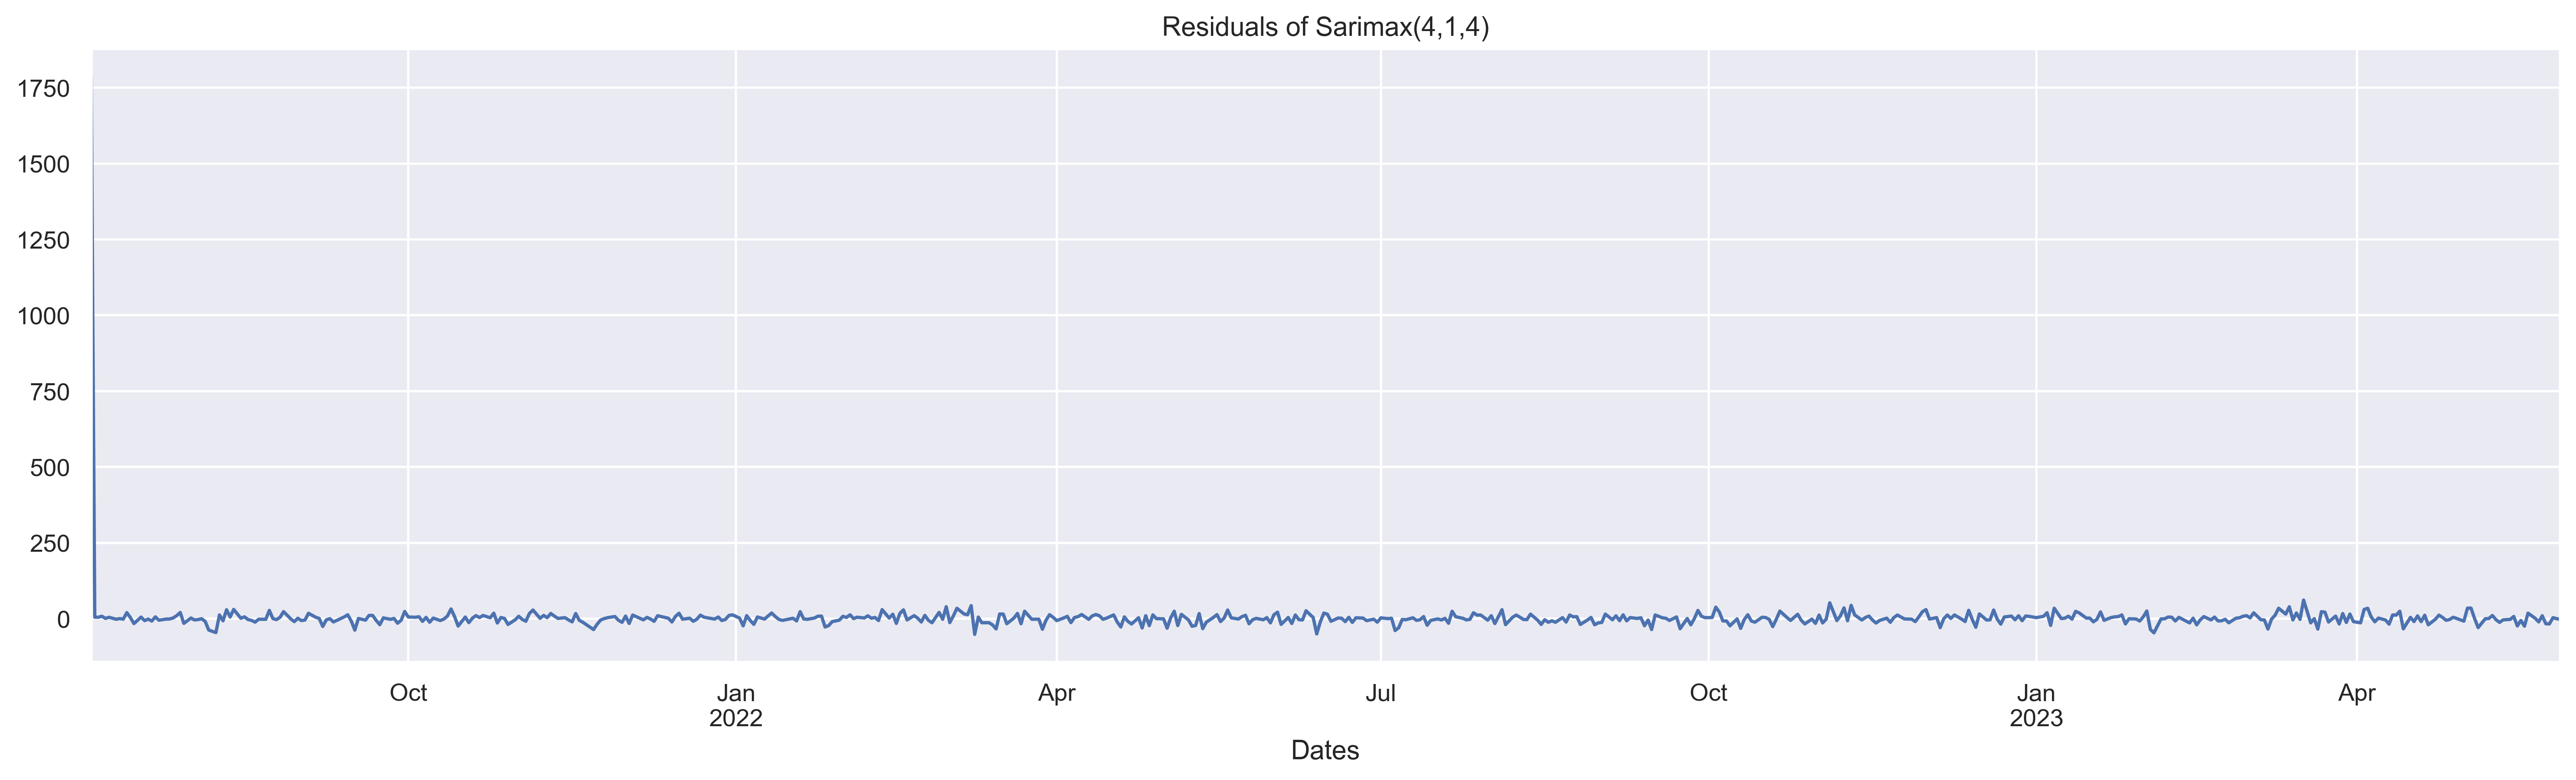

In [142]:
#Plotting residuals

df['res_sar_4_1_1'] = results_sarimax_4_1_4.resid.iloc[:]
df.res_sar_4_1_1.plot(figsize=(20,5))
plt.title("Residuals of Sarimax(4,1,4)")
plt.show()

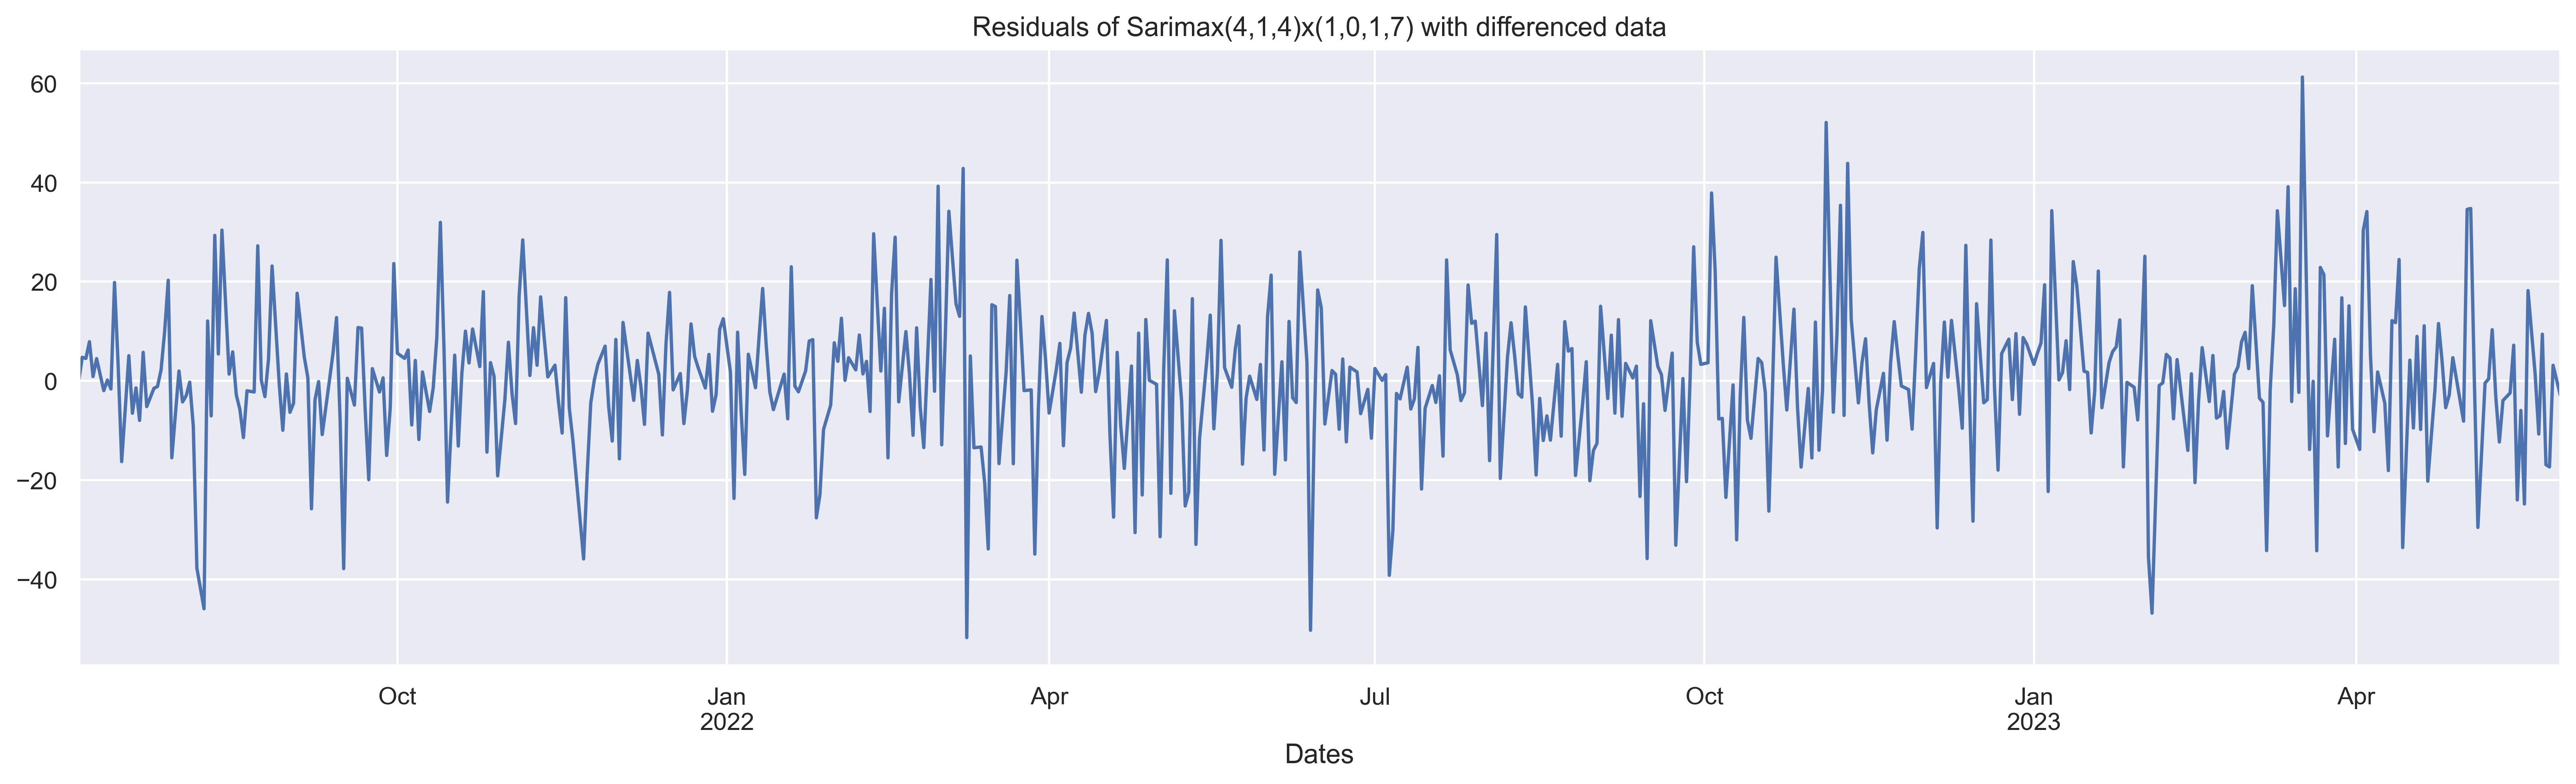

In [143]:
#with diff
df['res_sar_4_0_4_diff'] = np.concatenate(([0], results_sarimax_4_0_4_diff.resid))
df.res_sar_4_0_4_diff.plot(figsize=(20,5))
plt.title("Residuals of Sarimax(4,1,4)x(1,0,1,7) with differenced data")
plt.show()

### residuals of sarimax_diff has whitenoise

In [145]:

# Testing stationarity of residuals
# test_statistic, p_value, used_lag, n_obs, critical_values, maximized_information_criterion = sts.adfuller(df.res_sar_4_1_4)
test_statistic, p_value, used_lag, n_obs, critical_values, maximized_information_criterion = sts.adfuller(df.res_sar_4_0_4_diff)
print("Test-statistic \t\t", test_statistic)
print("P-value \t\t", p_value)
print("\n")
for k,v in critical_values.items():
    if test_statistic < v:
        print("Data is stationary with a %.2f%% of confidence" % (1-(float(k.rstrip('%')))/100))
    else:
        print("There isn't enough proves to reject that data isn't stationary with a %.2f%% of confidence"% (1-(float(k.rstrip('%')))/100))

Test-statistic 		 -24.26850267287682
P-value 		 0.0


Data is stationary with a 0.99% of confidence
Data is stationary with a 0.95% of confidence
Data is stationary with a 0.90% of confidence


### Analyzing

In [146]:
forecast_sarimax_4_1_4 = results_sarimax_4_1_4.forecast(7)

sqrt(mean_squared_error(df_test['Close'][0:7].values, forecast_sarimax_4_1_4))

17.60050428390595

In [147]:
forecast_sarimax_4_0_4_diff = results_sarimax_4_0_4_diff.forecast(7)

predictions_diff = inverse_difference(df.Close, forecast_sarimax_4_0_4_diff, interval=1)
sqrt(mean_squared_error(df_test['Close'][0:7].values, predictions_diff))

17.607531472269052

In [148]:
forecast_sarimax_2_1_2 = results_sarimax_2_1_2.forecast(7)

sqrt(mean_squared_error(df_test['Close'][0:7].values, forecast_sarimax_2_1_2))

16.796224352909253

In [149]:
forecast_sarimax_1_1_1 =  results_sarimax_1_1_1.forecast(7)

sqrt(mean_squared_error(df_test['Close'][0:7].values, forecast_sarimax_1_1_1))
# np.vstack(forecast_sarimax_1_1_1)

16.07279041174362

###
It appears SARIMAX_1_1_1_diff still beats all in predictions  check below

In [150]:
forecast_sarimax_1_1_1_diff = results_sarimax_1_1_1_diff.forecast(7)

predictions_diff = inverse_difference(df.Close, forecast_sarimax_1_1_1_diff, interval=1)
np.vstack(predictions_diff)
# sqrt(mean_squared_error(df_test['humidity'][0:7].values, predictions_diff))

array([[1944.42832193],
       [1945.9067474 ],
       [1945.43336825],
       [1947.24044144],
       [1948.83829191],
       [1949.07097332],
       [1948.66109417]])

### Directly using exogenous values on SARIMAX_1_1_1_diff

In [152]:
len(differenced)
len(df.High)

diff_1 = np.concatenate(([0], differenced))

In [157]:
model_sarimax_1_1_1_diff_exg = SARIMAX(diff_1, exog=df['Change(%)'], order=(1,1,1), seasonal_order=(1,0,1,7))
results_sarimax_1_1_1_diff_exg = model_sarimax_1_1_1_diff_exg.fit()

In [158]:
print("\n LLR for Sarimax_model_1_1_1 = ", results_sarimax_1_1_1_diff_exg.llf, "\t AIC = ", results_sarimax_1_1_1_diff_exg.aic)


 LLR for Sarimax_model_1_1_1 =  -1130.3918629135665 	 AIC =  2272.783725827133


In [159]:
model_sarimax_1_1_1_exg = SARIMAX(df.Close, exog=df['Change(%)'], order=(1,1,1), seasonal_order=(1,0,1,7))
results_sarimax_1_1_1_exg = model_sarimax_1_1_1_exg.fit()

In [160]:
print("\n LLR for Sarimax_model_1_1_1_exg = ", results_sarimax_1_1_1_exg.llf, "\t AIC = ", results_sarimax_1_1_1_exg.aic)


 LLR for Sarimax_model_1_1_1_exg =  -2084.5291908699305 	 AIC =  4181.058381739861


### SARIMAX(1,1,1)_diff_exg appears with least AIC AND HIGHTES LLR

In [197]:
#forecasting

forecast_sar_1_1_1_diff_exg = results_sarimax_1_1_1_diff_exg.forecast(32, exog=df_test['Change(%)'][0:33])

predictions_diff = inverse_difference(df.Close, forecast_sar_1_1_1_diff_exg, interval=1)
np.vstack(predictions_diff)

array([[1941.83849302],
       [1958.30246506],
       [1966.10372998],
       [1976.58079361],
       [1949.96738071],
       [1948.51976738],
       [1960.18217503],
       [1962.38601423],
       [1945.26112212],
       [1965.2696429 ],
       [1961.42408984],
       [1958.84820566],
       [1959.31188588],
       [1944.74492849],
       [1946.18868064],
       [1959.28329049],
       [1959.09344135],
       [1959.27040205],
       [1955.26323976],
       [1941.41172728],
       [1940.13112885],
       [1922.11172004],
       [1928.65381153],
       [1927.37268326],
       [1925.18139356],
       [1918.98724157],
       [1914.06961764],
       [1913.88001659],
       [1924.42511563],
       [1922.4162098 ],
       [1926.22946137],
       [1934.77332893]])

### Amazing how rsme reduces drastically and better predictions are made
Best performance so far

In [198]:
print("RSME: ", sqrt(mean_squared_error(df_test['Close'][0:33].values, predictions_diff)))

RSME:  3.4520522766924335


In [199]:
# df_test = df_test.rename(columns={'Change_Percent':'Change(%)'})
# df_test

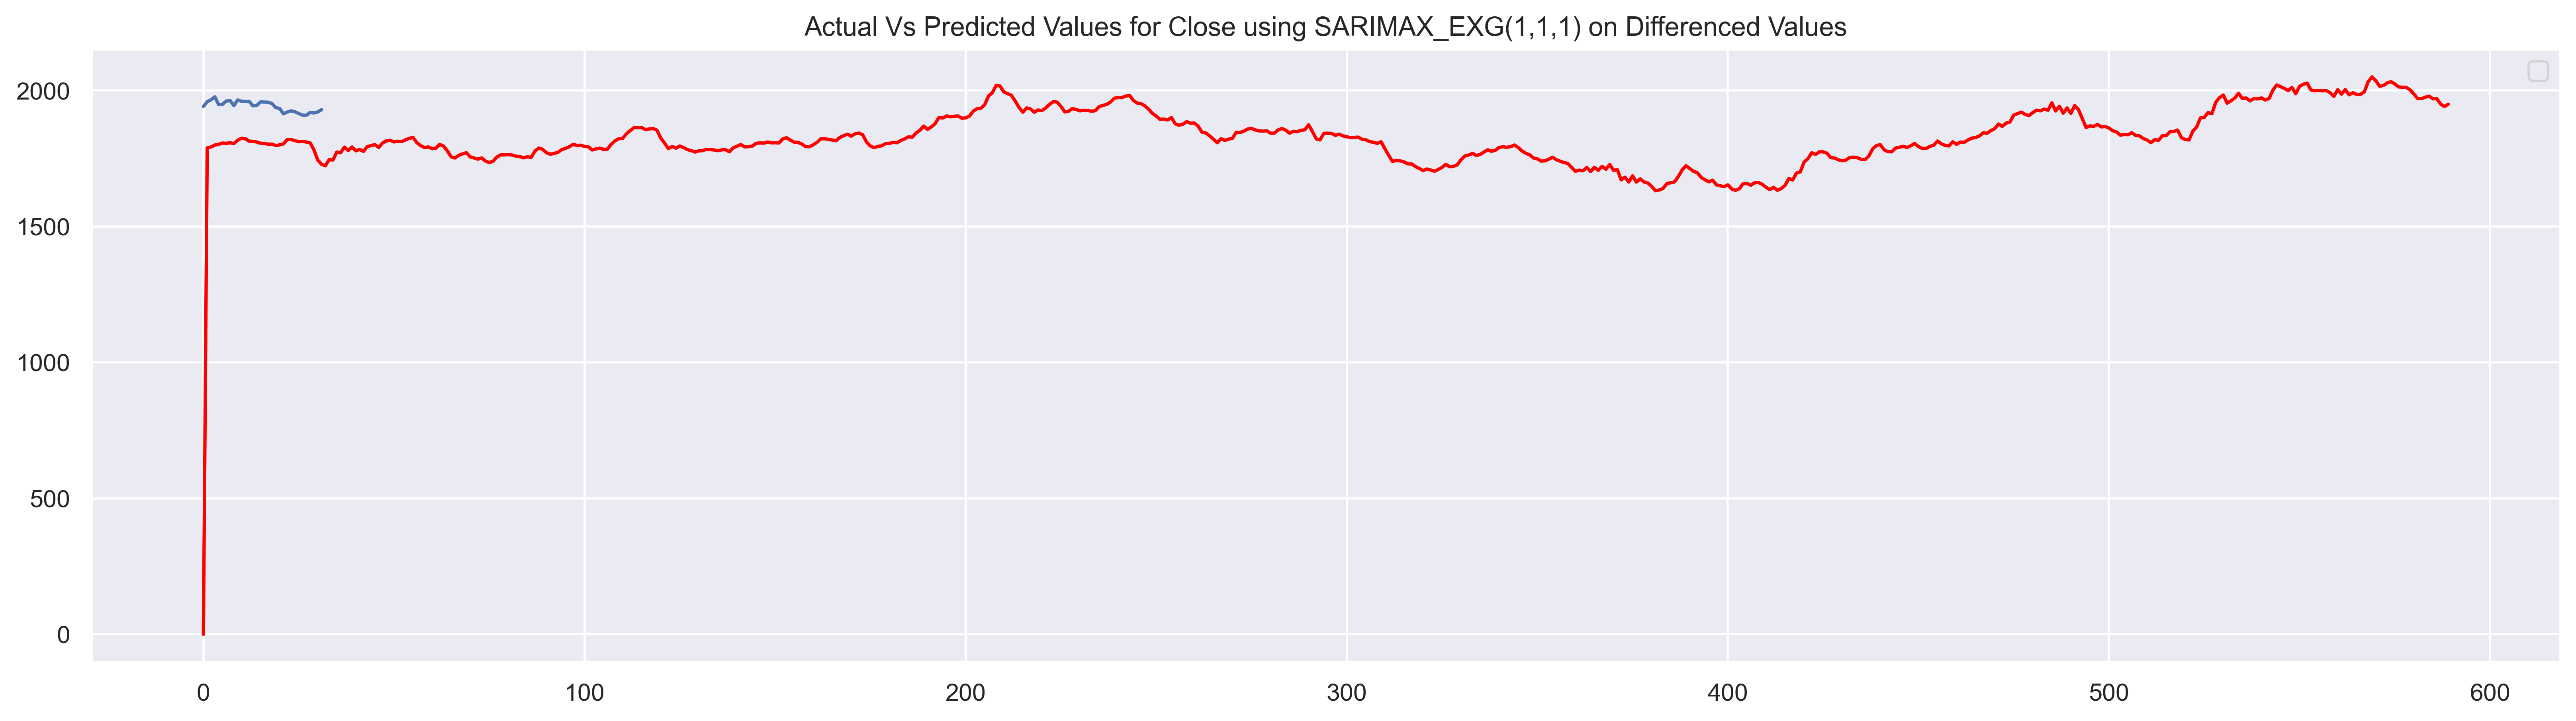

In [213]:
#plotting predictions on test data
# pred_start_date = "2023-06-13"
# pred_end_date = "2023-07-04"

yhat = results_sarimax_1_1_1_exg.predict(exog=df_test['Change(%)'])

plt.figure(figsize=(20,5))
plt.plot(df_test.Close.tolist())
plt.plot(yhat.tolist(), color='red')
plt.title("Actual Vs Predicted Values for Close using SARIMAX_EXG(1,1,1) on Differenced Values")
plt.legend('actual', 'predicted')
plt.show()


In [192]:
yhat
data_pred = pd.DataFrame(predictions_diff,  columns=['predictions'])
data_pred

predictions
0   1941.838493
1   1958.302465
2   1966.103730
3   1976.580794
4   1949.967381
5   1948.519767
6   1960.182175
7   1962.386014
8   1945.261122
9   1965.269643
10  1961.424090
11  1958.848206
12  1959.311886
13  1944.744928
14  1946.188681
15  1959.283290
16  1959.093441
17  1959.270402
18  1955.263240
19  1941.411727
20  1940.131129
21  1922.111720
22  1928.653812
23  1927.372683
24  1925.181394
25  1918.987242
26  1914.069618
27  1913.880017
28  1924.425116
29  1922.416210
30  1926.229461
31  1934.773329

In [193]:
#create new dataframe to visualize actual vs predictions 

forecast = pd.DataFrame({"Actual_Close" : df_test['Close'].values, "Forecast_Close" : np.round(data_pred['predictions'].values, 2)}, index=df_test['Date']) 

In [382]:
forecast

Actual_Humidity  Forecast_Humidity
datetime                                      
2020-11-01             56.0              56.37
2020-11-02             62.9              65.00
2020-11-03             60.8              63.57
2020-11-04             57.6              59.40
2020-11-05             51.9              53.44
2020-11-06             47.4              47.69
2020-11-07             52.9              52.61
2020-11-08             48.0              50.72
2020-11-09             48.2              47.42
2020-11-10             48.7              44.76
2020-11-11             41.5              34.75
2020-11-12             40.9              37.45
2020-11-13             56.9              55.75
2020-11-14             61.3              62.90
2020-11-15             65.4              67.46

### We have come to then end of this project.

Takeaways:
    1. AUTOREGRESSIVE MODELS ARE IMPORTANT IN UNDERSTANDING TIME SERIES DATA
    2. ARIMAX, SARIMAX MODELS CAN BE USED TO MODEL TIME SERIES DATA